## Assignment 1
### Name: Subhash Agrawal
### Roll Number: 23CS60R67

In [83]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [84]:
df = pd.read_csv('../../dataset/linear-regression.csv')
print(df.shape)
df

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# ANALYTICAL SOLUTION

In [3]:
#Store the features & Targets in X & Y respectively
X = df.drop("quality", axis=1)
y = df["quality"]

In [4]:
# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]
print(X)
print(y)

[[ 1.     7.4    0.7   ...  3.51   0.56   9.4  ]
 [ 1.     7.8    0.88  ...  3.2    0.68   9.8  ]
 [ 1.     7.8    0.76  ...  3.26   0.65   9.8  ]
 ...
 [ 1.     6.3    0.51  ...  3.42   0.75  11.   ]
 [ 1.     5.9    0.645 ...  3.57   0.71  10.2  ]
 [ 1.     6.     0.31  ...  3.39   0.66  11.   ]]
0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [5]:
#Spliting the Data Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.6, random_state=0)
#X_train.shape      #80%train
#X_test.shape        #20% test
print(X_train)
print(y_train)

[[ 1.    9.9   0.54 ...  3.39  0.62  9.4 ]
 [ 1.   10.8   0.26 ...  3.13  0.54  9.6 ]
 [ 1.    9.9   0.35 ...  3.26  0.79 10.6 ]
 ...
 [ 1.    7.9   0.57 ...  3.29  0.69  9.5 ]
 [ 1.   13.    0.47 ...  3.3   0.68 12.7 ]
 [ 1.    9.8   0.98 ...  3.25  0.48  9.4 ]]
642     5
679     5
473     5
390     8
1096    6
       ..
763     5
835     5
1216    6
559     6
684     5
Name: quality, Length: 1279, dtype: int64


In [7]:
#Compute the Analytical Solution Parameters - COEFFICIENTS
theta_analytical=np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
# Print the optimal parameters
print(theta_analytical)

[ 3.49987106e+01  4.12835075e-02 -1.14952802e+00 -1.77927063e-01
  2.78700036e-02 -1.87340739e+00  2.68362616e-03 -2.77748370e-03
 -3.15166657e+01 -2.54486051e-01  9.24040106e-01  2.67797417e-01]


In [8]:
#y_pred using analytical solution -predicted output Y = theta * x

y_pred=X_train.dot(theta_analytical)
y_pred


array([5.30872494, 5.80764689, 6.13788415, ..., 5.25915498, 6.36081498,
       4.48966242])

In [9]:
#y_pred for test datausing analytical solution -predicted output Y = theta * x

y_pred_test=X_test.dot(theta_analytical)
y_pred_test


array([5.7829301 , 5.03619267, 6.59698929, 5.33912637, 5.93952898,
       5.0072068 , 5.39616171, 6.05211188, 4.86760343, 4.95067572,
       5.28580441, 5.41265269, 5.7057424 , 5.12921736, 5.52885206,
       6.38052411, 6.81012527, 5.73803346, 5.97618825, 5.08613415,
       6.34479863, 5.16400983, 5.64203971, 6.1462903 , 5.4817802 ,
       5.03391405, 5.18721293, 6.48783659, 5.33301372, 6.30458308,
       6.03452293, 5.82849303, 5.58503524, 5.28512701, 5.75656128,
       6.15273791, 5.14134478, 5.48228021, 6.38983359, 5.79018189,
       5.42936927, 6.04810414, 6.70159678, 6.60160183, 5.97253803,
       4.78890763, 5.49565005, 6.01881894, 5.48895041, 6.10824242,
       5.3126164 , 5.28492351, 5.76043226, 6.36081498, 5.7195388 ,
       5.26971928, 5.08498332, 5.31050692, 6.50895816, 5.44323413,
       5.16377401, 5.76427324, 6.0703837 , 6.28933679, 5.07315141,
       6.11874641, 5.35681067, 6.01343647, 6.12184268, 5.98547673,
       5.35327968, 5.4367731 , 5.06017324, 5.58939889, 5.62593

In [10]:
#meansquared error  w.r.t test data
msqer_test=(1/len(X_test))*np.sum((y_test-y_pred_test)**2)
msqer_test
print("Mean Squared Error in test data is ",msqer_test)

Mean Squared Error in test data is  0.38447119766697296


In [11]:
#X_train[:,1]
#y_train
theta_analytical
print("Parameters are", theta_analytical)

Parameters are [ 3.49987106e+01  4.12835075e-02 -1.14952802e+00 -1.77927063e-01
  2.78700036e-02 -1.87340739e+00  2.68362616e-03 -2.77748370e-03
 -3.15166657e+01 -2.54486051e-01  9.24040106e-01  2.67797417e-01]


In [12]:
mean=np.sum(y_train)/len(y_train)
mean

5.64659890539484

In [13]:
#Rsquared=1-(sum of squared errors/sum of deviation from mean square)
r_squared=1-(np.sum((y_train-y_pred)**2)/np.sum((y_train-mean)**2))
print("Rsquared Score =", r_squared)

Rsquared Score = 0.36545196162068627


In [14]:
#RMSE=sqrt(sum of suuares of error(i.e predicted-actual)/no.of cases)
rmse=np.sqrt(np.sum((y_pred-y_train)**2)/len(y_train))
print("RMSE Score =", rmse)

RMSE Score = 0.6525399439411925


# ITERATIVE SOLUTION VIA GRADIENT ASCENT

In [168]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [169]:
#divide features and output
X = df.drop("quality", axis=1)
y = df["quality"]
print(X)
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [170]:
#Feature Scaling
def min_max_scaling(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    scaled_data = (data - min_vals) / (max_vals - min_vals)
    return scaled_data


In [171]:
X = min_max_scaling(X)

In [172]:
#Spliting the Data Set
from sklearn.model_selection import train_test_split
X_train, X_testval, y_train, y_testval = train_test_split(X, y, test_size=0.5, random_state=0)

In [173]:
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.6, random_state=0)
#X_train.shape      #50%train
#X_test.shape        #20% test
#X_val.shape        #30%validation
print(X_train)
print(y_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
523        0.415929          0.191781         0.49        0.109589   0.121870   
626        0.371681          0.328767         0.29        0.089041   0.143573   
495        0.539823          0.157534         0.53        0.116438   0.096828   
1270       0.035398          0.178082         0.01        0.047945   0.060100   
155        0.221239          0.212329         0.42        0.315068   0.098497   
...             ...               ...          ...             ...        ...   
763        0.415929          0.366438         0.26        0.075342   0.140234   
835        0.265487          0.373288         0.10        0.041096   0.090150   
1216       0.292035          0.308219         0.31        0.075342   0.111853   
559        0.743363          0.239726         0.49        0.232877   0.121870   
684        0.460177          0.589041         0.32        0.095890   0.110184   

      free sulfur dioxide  

In [174]:
# Add a column of ones to X for the intercept term
X_train = np.c_[np.ones(len(X_train)), X_train]
X_val = np.c_[np.ones(len(X_val)), X_val]
X_test = np.c_[np.ones(len(X_test)), X_test]
X_train.shape

(799, 12)

In [175]:
# Initialize the coefficients of the logistic regression model
# coefficients = np.ones(X.shape[1])
# coefficients.reshape(12,1)
coefficients=np.random.rand(X_train.shape[1])
coefficients.shape

(12,)

In [176]:
y_pred=X_train.dot(coefficients)
y_pred


array([1.56335198, 1.20690383, 1.38371807, 1.3305968 , 1.59322498,
       1.55163877, 1.20199649, 1.40596728, 1.39806649, 1.27245312,
       1.15891332, 1.7203049 , 1.19054303, 1.14445839, 1.36510451,
       1.36033014, 1.64481082, 1.092541  , 1.66770946, 1.4082464 ,
       1.6664689 , 1.1758422 , 1.73514828, 1.06948778, 1.67315109,
       1.16378753, 1.18208716, 1.34876139, 1.45464694, 1.2669176 ,
       1.44881865, 1.34069571, 1.2128062 , 1.59376883, 1.12454211,
       1.23808597, 1.23584888, 1.41330164, 1.78389597, 1.19518494,
       1.46666169, 1.25068136, 1.43624593, 1.90738811, 1.28930523,
       1.60619663, 1.11215986, 1.28495491, 1.35805427, 1.21538651,
       1.42886881, 1.55439925, 1.23855714, 1.29633648, 1.53246525,
       1.20613005, 1.55550289, 1.61632134, 1.36001353, 1.35309546,
       1.24552863, 1.53037619, 1.21172086, 1.42027813, 1.55194461,
       1.2750928 , 1.18875936, 1.39646958, 1.42120032, 1.28280473,
       1.25908937, 1.30349972, 0.93196504, 1.33667406, 1.09060

In [177]:
#gradient=2/len(X_train)
gradient= (2/len(X_train))*(X_train.T.dot(y_train - y_pred))
gradient

array([8.54604748, 2.81668147, 2.32594714, 2.33637676, 0.95883378,
       1.06163865, 1.82021624, 1.20121999, 4.09346204, 3.82526636,
       1.71548533, 2.76287378])

# For Aplha 0.01

In [42]:
# Define the learning rate and the number of iterations
alpha = 0.01 # Learning rate
num_iter = 1000 # Number of iterations

In [43]:
error_val = []
error_train = []
# Perform gradient descent to update the coefficients
# length = X_train
for i in range(num_iter):
    #update predicted output
    y_pred=X_train.dot(coefficients)
    #Update gradient
    diff= y_pred - y_train
    gradient= (2/len(X_train))*((X_train.T).dot(diff))
    #update coefficients
    coefficients = coefficients-(alpha*gradient)
    #calculate prediction for Validate set 
    y_val_pred=X_val.dot(coefficients)
    #meansquared error on test data
    #tlen=len(y_test)
    msqer=np.sum((y_val-y_val_pred)**2)
    error_val.append(msqer)
    
    #calculate prediction for Train set 
    y_train_pred=X_train.dot(coefficients)
    #meansquared error on test data
    #tlen=len(y_test)
    msqer=np.sum((y_train-y_train_pred)**2)
    error_train.append(msqer)
    print(msqer)
    

13654.631480953543
12667.83301885685
11756.130451326844
10913.806765799683
10135.58018627279
9416.571038710059
8752.271138986462
8138.515511330918
7571.45625984643
7047.538429193512
6563.477703001765
6116.239800103202
5703.021439331994
5321.23275347559
4968.481042053141
4642.555760996265
4341.414655066601
4063.1709460135826
3806.0814960987755
3568.5358727320895
3349.046245618126
3146.2380530335927
2958.8413786817828
2785.6829850278286
2625.678953136788
2477.8278828414595
2341.204610581978
2214.95440550679
2098.287607424938
1990.4746729714789
1890.841598908721
1798.7656938519235
1713.6716718938583
1635.028043622051
1562.3437818881748
1495.1652414126957
1433.07331290026
1375.680793812516
1322.6299593042131
1273.5903180841312
1228.2565391225035
1186.3465361983715
1147.5996982705046
1111.7752545703288
1078.6507641604587
1048.0207204832673
1019.6952621452838
993.4989818496794
969.2698260048232
946.8580781057246
926.1254195107322
906.9440617213778
889.1959447218251
872.7719963488046
857.5714

516.1923321126794
516.0633735081071
515.9345842227644
515.8059639900185
515.6775125436728
515.5492296179671
515.4211149475758
515.2931682676082
515.1653893136071
515.0377778215484
514.9103335278401
514.7830561693218
514.6559454832641
514.5290012073674
514.4022230797618
514.2756108390063
514.1491642240873
514.0228829744187
513.8967668298416
513.7708155306218
513.6450288174515
513.5194064314466
513.3939481141467
513.2686536075148
513.1435226539363
513.018554996218
512.8937503775878
512.7691085416936
512.6446292326034
512.5203121948036
512.396157173199
512.2721639131117
512.148332160281
512.0246616608616
511.9011521614244
511.77780340895447
511.65461515085104
511.53158713492707
511.40871910940757
511.28601082292994
511.16346202454287
511.04107246370535
510.9188418902869
510.79677005456574
510.6748567072291
510.5531015993716
510.4315044824956
510.31006510850995
510.1887832297291
510.0676585988731
509.946690969066
509.8258800938364
509.7052257271157
509.58472762323765
509.4643855369384
509.

In [44]:
#predicted output for validation set
y_test_pred=X_test.dot(coefficients)
y_test_pred

array([5.45767264, 6.30418084, 5.62707873, 5.23806803, 5.23343719,
       6.12628529, 5.83341641, 5.5144632 , 5.14168768, 4.81029755,
       5.03174492, 5.98775967, 5.60549173, 5.6408057 , 6.17158722,
       5.32198307, 4.52009692, 5.32618324, 6.24350664, 4.93466023,
       5.21833529, 4.97952634, 5.63996686, 5.7924626 , 5.59300883,
       5.53698529, 6.3324969 , 5.23806803, 4.7058704 , 5.36980641,
       5.42761958, 5.27724042, 5.78067754, 5.18843383, 6.52133971,
       5.39962152, 5.55777027, 6.26398624, 5.20148264, 5.40280688,
       5.61975153, 5.65177216, 6.19785966, 6.15720165, 5.34011389,
       5.67958339, 5.34897688, 5.37081531, 6.21422854, 5.75237427,
       6.14197297, 5.57911758, 6.14015974, 6.0409923 , 6.19817052,
       5.27809604, 4.9627835 , 5.64468915, 5.00333314, 6.15522937,
       5.4728478 , 5.35427239, 5.43157821, 5.70744493, 5.0109997 ,
       5.69165593, 5.62542074, 5.87103073, 5.73133779, 6.25278421,
       6.23752336, 5.28144881, 5.39466712, 5.81650102, 5.13986

In [45]:
#meansquared error on test data
tlen=len(y_test)
msqer=(1/tlen)*np.sum((y_test-y_test_pred)**2)
print("Mean Squared Error on Test Data is", msqer)

Mean Squared Error on Test Data is 0.5774589957442847


In [46]:
#Rsquared=1-(sum of squared errors/sum of deviation from mean square)
mean=np.sum(y_test)/tlen
r_squared=1-(np.sum((y_test-y_test_pred)**2)/np.sum((y_test-mean)**2))
print("Rsquared Score =", r_squared)

Rsquared Score = 0.031245578003985308


In [47]:
#RMSE=sqrt(sum of suuares of error(i.e predicted-actual)/no.of cases)
rmse=np.sqrt(np.sum((y_test_pred-y_test)**2)/tlen)
print("RMSE Score on Test Data for learning rate",alpha, "is", rmse)

RMSE Score on Test Data for learning rate 0.01 is 0.7599072283800732


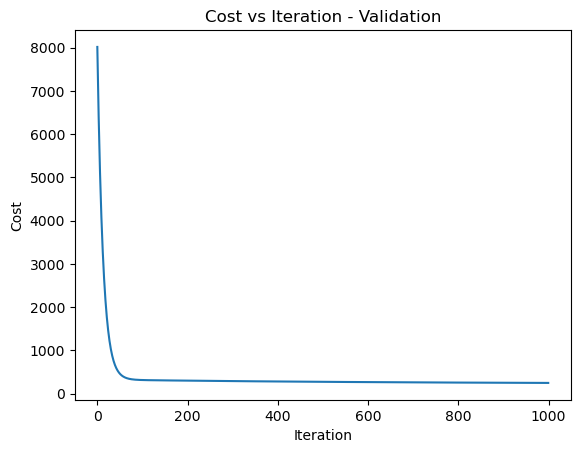

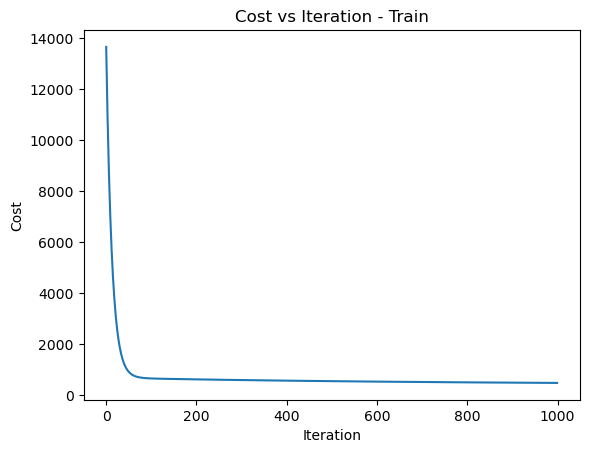

In [48]:
import matplotlib.pyplot as plt

# assuming change is a numpy array
iteration = np.arange(len(error_val)) # create an array of iteration numbers
plt.plot(iteration, error_val) # plot the change vs iteration
plt.xlabel("Iteration") # label the x-axis
plt.ylabel("Cost") # label the y-axis
plt.title("Cost vs Iteration - Validation") # give a title to the graph
plt.show() # show the graph


import matplotlib.pyplot as plt

# assuming change is a numpy array
iteration = np.arange(len(error_train)) # create an array of iteration numbers
plt.plot(iteration, error_train) # plot the change vs iteration
plt.xlabel("Iteration") # label the x-axis
plt.ylabel("Cost") # label the y-axis
plt.title("Cost vs Iteration - Train") # give a title to the graph
plt.show() # show the graph

# For Aplha 0.001

In [128]:
# Define the learning rate and the number of iterations
alpha = 0.001 # Learning rate
num_iter = 10000 # Number of iterations

In [129]:
error_val = []
error_train = []
# Perform gradient descent to update the coefficients
# length = X_train
for i in range(num_iter):
    #update predicted output
    y_pred=X_train.dot(coefficients)
    #Update gradient
    diff= y_pred - y_train
    gradient= (2/len(X_train))*((X_train.T).dot(diff))
    #update coefficients
    coefficients = coefficients-(alpha*gradient)
    #calculate prediction for Validate set 
    y_val_pred=X_val.dot(coefficients)
    #meansquared error on test data
    #tlen=len(y_test)
    msqer=np.sum((y_val-y_val_pred)**2)
    error_val.append(msqer)
    
    #calculate prediction for Train set 
    y_train_pred=X_train.dot(coefficients)
    #meansquared error on test data
    #tlen=len(y_test)
    msqer=np.sum((y_train-y_train_pred)**2)
    error_train.append(msqer)
    print(msqer)
    

13175.924448113237
13079.509043799164
12983.84038065813
12888.912672524537
12794.720178067622
12701.25720044404
12608.51808695315
12516.497228694974
12425.189060230789
12334.58805924638
12244.688746217875
12155.485684080171
12066.973477897955
11979.14677453924
11892.000262351454
11805.528670840029
11719.726770349484
11634.58937174698
11550.11132610832
11466.287524406394
11383.112897202027
11300.582414337225
11218.691084630806
11137.433955576376
11056.806113042661
10976.802680976147
10897.418821106025
10818.649732651435
10740.490652030974
10662.936852574436
10585.983644236814
10509.626373314502
10433.860422163694
10358.681208920978
10284.084187226083
10210.064845946777
10136.618708905897
10063.741334610502
9991.428315983114
9919.675280095043
9848.47788790178
9777.83183398045
9707.732846269286
9638.176685809114
9569.159146486872
9500.67605478109
9432.723269509352
9365.2966815777
9298.392213732015
9232.005820311286
9166.133487002804
9100.771230599275
9035.915098757776
8971.561169760602
89

741.1256749055691
740.8159950864992
740.508406794024
740.2028938685733
739.8994402757851
739.5980301055331
739.2986475709649
739.0012770075482
738.7059028721192
738.4125097419467
738.121082313796
737.8316054030036
737.5440639425588
737.2584429821917
736.9747276874691
736.6929033388965
736.4129553310272
736.1348691715791
735.8586304805581
735.5842249893875
735.3116385400444
735.0408570842038
734.7718666823879
734.5046535031236
734.2392038221049
733.9755040213621
733.7135405884386
733.4533001155737
733.1947692988904
732.9379349375904
732.682783933156
732.429303288558
732.1774801074675
731.9273015934783
731.6787550493294
731.4318278761398
731.1865075726441
730.9427817344374
730.7006380532237
730.460064316072
730.2210484046775
729.9835782946271
729.7476420546734
729.5132278460119
729.280323921565
729.0489186252712
728.8190003913797
728.5905577437507
728.3635792951612
728.1380537466159
727.9139698866634
727.6913165907183
727.4700828203875
727.2502576228028
727.031830129958
726.8147895580515

679.4984159553401
679.4608304948666
679.4232593379163
679.3857024154358
679.3481596589006
679.3106310003097
679.2731163721829
679.2356157075553
679.1981289399739
679.1606560034951
679.1231968326779
679.0857513625824
679.0483195287646
679.0109012672735
678.9734965146465
678.9361052079059
678.8987272845551
678.8613626825752
678.8240113404208
678.7866731970164
678.7493481917535
678.712036264486
678.6747373555268
678.6374514056448
678.6001783560612
678.5629181484455
678.5256707249124
678.4884360280181
678.4512140007579
678.414004586561
678.3768077292887
678.3396233732303
678.3024514631002
678.2652919440341
678.228144761586
678.191009861725
678.1538871908324
678.1167766956976
678.0796783235157
678.0425920218845
678.0055177388008
677.9684554226571
677.9314050222397
677.8943664867245
677.8573397656747
677.8203248090374
677.7833215671404
677.7463299906899
677.7093500307676
677.6723816388269
677.6354247666904
677.5984793665483
677.5615453909531
677.5246227928194
677.4877115254187
677.4508115423

656.9803719129525
656.9472808503772
656.9141948033752
656.8811137706805
656.8480377510309
656.8149667431675
656.7819007458356
656.7488397577833
656.7157837777631
656.6827328045304
656.6496868368444
656.6166458734676
656.583609913166
656.5505789547092
656.5175529968699
656.484532038424
656.4515160781518
656.4185051148354
656.3854991472615
656.3524981742196
656.3195021945019
656.2865112069048
656.253525210227
656.2205442032713
656.1875681848426
656.1545971537498
656.1216311088044
656.0886700488213
656.0557139726184
656.0227628790161
655.9898167668388
655.9568756349131
655.9239394820688
655.8910083071389
655.8580821089588
655.8251608863673
655.7922446382057
655.7593333633185
655.7264270605531
655.693525728759
655.6606293667894
655.6277379734997
655.5948515477485
655.5619700883965
655.5290935943078
655.4962220643486
655.4633554973882
655.4304938922986
655.3976372479541
655.3647855632316
655.3319388370114
655.2990970681751
655.2662602556077
655.2334283981966
655.2006014948317
655.1677795444

636.995821675648
636.9657191451186
636.9356210846381
636.9055274934731
636.8754383708915
636.8453537161599
636.8152735285462
636.7851978073179
636.7551265517425
636.7250597610878
636.6949974346223
636.6649395716137
636.6348861713304
636.604837233041
636.5747927560141
636.5447527395183
636.5147171828226
636.4846860851959
636.4546594459074
636.4246372642267
636.3946195394228
636.3646062707659
636.3345974575252
636.3045930989708
636.2745931943728
636.2445977430013
636.2146067441266
636.1846201970193
636.15463810095
636.1246604551893
636.0946872590084
636.064718511678
636.0347542124694
636.0047943606539
635.9748389555032
635.9448879962886
635.9149414822818
635.8849994127551
635.8550617869801
635.8251286042291
635.7951998637745
635.7652755648888
635.7353557068445
635.7054402889144
635.6755293103711
635.6456227704878
635.6157206685378
635.5858230037942
635.5559297755303
635.52604098302
635.496156625537
635.4662767023547
635.4364012127473
635.4065301559892
635.3766635313543
635.3468013381173


615.8675156400805
615.8405330705448
615.8135544619818
615.7865798137466
615.7596091251944
615.7326423956808
615.7056796245611
615.6787208111909
615.6517659549261
615.6248150551226
615.5978681111358
615.570925122322
615.5439860880373
615.5170510076382
615.4901198804807
615.4631927059218
615.4362694833171
615.4093502120242
615.3824348913992
615.3555235207996
615.3286160995818
615.3017126271031
615.274813102721
615.2479175257926
615.2210258956752
615.1941382117266
615.1672544733042
615.1403746797657
615.1134988304691
615.0866269247724
615.0597589620334
615.0328949416106
615.0060348628621
614.9791787251463
614.9523265278217
614.9254782702467
614.8986339517805
614.8717935717816
614.8449571296088
614.8181246246213
614.7912960561782
614.7644714236385
614.7376507263621
614.710833963708
614.6840211350359
614.6572122397054
614.6304072770764
614.6036062465087
614.5768091473624
614.5500159789973
614.5232267407739
614.4964414320523
614.4696600521931
614.4428826005567
614.416109076504
614.3893394793

600.7879842872194
600.7632050156304
600.7384293467398
600.7136572799626
600.6888888147133
600.6641239504074
600.6393626864601
600.6146050222867
600.5898509573021
600.5651004909221
600.5403536225624
600.5156103516383
600.4908706775661
600.4661345997611
600.4414021176395
600.4166732306173
600.3919479381108
600.3672262395362
600.3425081343096
600.3177936218476
600.293082701567
600.268375372884
600.2436716352154
600.2189714879784
600.1942749305895
600.1695819624659
600.1448925830249
600.1202067916834
600.0955245878588
600.0708459709688
600.0461709404303
600.0214994956616
599.9968316360801
599.9721673611034
599.9475066701496
599.9228495626368
599.8981960379829
599.8735460956061
599.8488997349248
599.8242569553573
599.7996177563222
599.7749821372379
599.750350097523
599.7257216365965
599.7010967538774
599.6764754487842
599.6518577207362
599.6272435691525
599.6026329934525
599.5780259930557
599.553422567381
599.5288227158484
599.5042264378774
599.4796337328876
599.455044600299
599.43045903953

586.7975071800267
586.7747517977652
586.7519996899023
586.7292508559076
586.7065052952507
586.6837630074015
586.6610239918293
586.6382882480046
586.615555775397
586.5928265734765
586.5701006417136
586.5473779795782
586.5246585865411
586.5019424620718
586.4792296056419
586.4565200167215
586.4338136947811
586.4111106392916
586.3884108497241
586.3657143255492
586.3430210662382
586.320331071262
586.297644340092
586.2749608721994
586.2522806670556
586.2296037241321
586.2069300429004
586.1842596228323
586.1615924633993
586.1389285640735
586.1162679243266
586.0936105436306
586.0709564214578
586.0483055572802
586.0256579505702
586.0030136007999
585.9803725074419
585.9577346699689
585.9351000878534
585.9124687605679
585.8898406875853
585.8672158683787
585.8445943024208
585.8219759891847
585.7993609281436
585.7767491187707
585.7541405605393
585.7315352529231
585.7089331953952
585.6863343874293
585.6637388284989
585.6411465180781
585.6185574556408
585.5959716406605
585.5733890726115
585.550809750

573.9440575540652
573.9231418524765
573.9022291276358
573.8813193790618
573.860412606274
573.8395088087912
573.8186079861331
573.7977101378187
573.7768152633676
573.7559233622992
573.735034434133
573.7141484783892
573.6932654945869
573.6723854822461
573.6515084408873
573.6306343700296
573.6097632691935
573.5888951378992
573.5680299756668
573.5471677820167
573.5263085564694
573.5054522985452
573.4845990077644
573.4637486836482
573.4429013257168
573.4220569334914
573.4012155064925
573.3803770442412
573.3595415462586
573.3387090120657
573.3178794411837
573.297052833134
573.2762291874378
573.2554085036164
573.2345907811916
573.2137760196849
573.1929642186178
573.1721553775122
573.1513494958899
573.1305465732728
573.1097466091828
573.0889496031419
573.0681555546726
573.0473644632967
573.0265763285367
573.005791149915
572.9850089269539
572.9642296591761
572.9434533461042
572.9226799872608
572.9019095821687
572.8811421303508
572.86037763133
572.8396160846294
572.818857489772
572.7981018462809

560.2322751031213
560.2132979359639
560.1943234328332
560.1753515933005
560.156382416937
560.1374159033132
560.118452052001
560.0994908625712
560.0805323345951
560.061576467644
560.04262326129
560.0236727151041
560.004724828658
559.9857796015235
559.9668370332723
559.9478971234762
559.9289598717071
559.910025277537
559.8910933405377
559.8721640602816
559.853237436341
559.8343134682877
559.8153921556943
559.7964734981333
559.777557495177
559.758644146398
559.7397334513687
559.720825409662
559.7019200208506
559.6830172845073
559.664117200205
559.6452197675169
559.6263249860153
559.607432855274
559.5885433748662
559.5696565443646
559.550772363343
559.5318908313747
559.5130119480328
559.4941357128912
559.4752621255234
559.456391185503
559.4375228924039
559.4186572457997
559.3997942452645
559.380933890372
559.3620761806965
559.343221115812
559.3243686952924
559.3055189187123
559.2866717856457
559.2678272956673
559.2489854483513
559.2301462432722
559.2113096800049
559.1924757581237
559.17364

548.8219247873651
548.804539013001
548.7871556467747
548.7697746882997
548.7523961371894
548.7350199930574
548.7176462555174
548.7002749241826
548.6829059986676
548.6655394785853
548.6481753635502
548.6308136531759
548.6134543470765
548.5960974448662
548.5787429461589
548.5613908505686
548.5440411577101
548.5266938671973
548.5093489786448
548.4920064916669
548.4746664058782
548.4573287208931
548.4399934363265
548.4226605517929
548.405330066907
548.388001981284
548.3706762945383
548.3533530062851
548.3360321161396
548.3187136237166
548.3013975286312
548.2840838304987
548.2667725289346
548.249463623554
548.2321571139722
548.2148529998049
548.1975512806678
548.1802519561759
548.1629550259449
548.1456604895914
548.1283683467303
548.1110785969777
548.0937912399496
548.0765062752619
548.0592237025306
548.0419435213719
548.0246657314019
548.0073903322367
547.990117323493
547.9728467047865
547.9555784757342
547.9383126359525
547.9210491850577
547.9037881226666
547.8865294483958
547.86927316186

537.7419663247404
537.7261039836089
537.7102438064851
537.6943857930228
537.6785299428757
537.662676255698
537.6468247311437
537.630975368867
537.6151281685216
537.5992831297622
537.5834402522429
537.567599535618
537.5517609795421
537.535924583669
537.5200903476541
537.5042582711512
537.4884283538152
537.4726005953008
537.4567749952628
537.4409515533557
537.4251302692346
537.4093111425541
537.3934941729697
537.3776793601359
537.3618667037076
537.3460562033406
537.3302478586895
537.3144416694099
537.2986376351571
537.282835755586
537.2670360303524
537.2512384591118
537.2354430415196
537.2196497772311
537.2038586659025
537.1880697071892
537.172282900747
537.1564982462314
537.1407157432988
537.1249353916046
537.1091571908053
537.0933811405565
537.0776072405143
537.0618354903354
537.0460658896754
537.0302984381908
537.0145331355379
536.9987699813732
536.983008975353
536.9672501171336
536.9514934063719
536.9357388427243
536.9199864258476
536.9042361553984
536.8884880310335
536.8727420524096

527.8725313738059
527.8580051707312
527.8434809183382
527.8289586163161
527.8144382643543
527.7999198621416
527.7854034093677
527.7708889057221
527.7563763508938
527.7418657445726
527.7273570864478
527.7128503762092
527.698345613546
527.6838427981486
527.669341929706
527.6548430079084
527.6403460324454
527.6258510030071
527.6113579192834
527.596866780964
527.5823775877393
527.5678903392992
527.5534050353338
527.5389216755334
527.5244402595881
527.5099607871884
527.4954832580246
527.481007671787
527.4665340281659
527.4520623268521
527.437592567536
527.4231247499081
527.4086588736593
527.3941949384802
527.3797329440613
527.3652728900938
527.3508147762684
527.3363586022758
527.3219043678074
527.3074520725537
527.293001716206
527.2785532984556
527.2641068189932
527.2496622775105
527.2352196736986
527.2207790072487
527.206340277852
527.1919034852003
527.1774686289848
527.1630357088973
527.1486047246292
527.134175675872
527.1197485623175
527.1053233836574
527.0909001395835
527.0764788297877


519.2286216459155
519.2152471993644
519.2018745203079
519.1885036084652
519.1751344635554
519.1617670852988
519.1484014734143
519.135037627622
519.1216755476412
519.1083152331919
519.0949566839936
519.081599899766
519.0682448802295
519.0548916251038
519.0415401341085
519.0281904069639
519.0148424433897
519.0014962431067
518.9881518058341
518.9748091312929
518.9614682192027
518.9481290692842
518.9347916812576
518.9214560548431
518.9081221897613
518.8947900857326
518.8814597424773
518.8681311597163
518.85480433717
518.841479274559
518.828155971604
518.8148344280258
518.801514643545
518.7881966178828
518.7748803507596
518.7615658418969
518.748253091015
518.7349420978354
518.7216328620789
518.7083253834666
518.6950196617197
518.6817156965595
518.668413487707
518.6551130348837
518.641814337811
518.6285173962099
518.6152222098021
518.6019287783092
518.5886371014525
518.5753471789534
518.5620590105339
518.5487725959152
518.5354879348196
518.5222050269681
518.5089238720831
518.4956444698862
51

511.7841530536109
511.7717548824577
511.75935832411744
511.7469633783352
511.7345700448559
511.7221783234246
511.7097882137863
511.6973997156864
511.6850128288698
511.6726275530819
511.66024388806784
511.647861833573
511.6354813893427
511.6231025551224
511.61072533065743
511.5983497156932
511.5859757099754
511.57360331324946
511.561232525261
511.54886334575576
511.53649577447936
511.5241298111775
511.511765455596
511.4994027074805
511.487041566577
511.47468203263134
511.4623241053895
511.44996778459745
511.43761307000113
511.42525996134674
511.4129084583804
511.4005585608481
511.3882102684959
511.3758635810704
511.3635184983175
511.35117501998377
511.3388331458155
511.3264928755591
511.3141542089609
511.3018171457676
511.28948168572526
511.27714782858095
511.264815574081
511.2524849219721
511.240155872001
511.2278284239144
511.215502577459
511.2031783323817
511.19085568842945
511.1785346453489
511.1662152028872
511.15389736079106
511.14158111880784
511.12926647668445
511.1169534341678


505.040231432019
505.02870361941586
505.01717728226265
505.005652420327
504.9941290333764
504.98260712117883
504.97108668350177
504.9595677201132
504.94805023078084
504.9365342152724
504.92501967335585
504.9135066047992
504.9019950093703
504.8904848868372
504.878976236968
504.86746905953066
504.85596335429335
504.8444591210241
504.8329563594913
504.8214550694631
504.8099552507076
504.7984569029934
504.7869600260885
504.7754646197617
504.763970683781
504.75247821791515
504.74098722193236
504.7294976956014
504.7180096386909
504.70652305096917
504.6950379322051
504.6835542821673
504.6720721006243
504.6605913873451
504.6491121420986
504.6376343646535
504.62615805477856
504.61468321224277
504.60320983681504
504.59173792826454
504.5802674863601
504.5687985108709
504.557331001566
504.54586495821445
504.53440038058557
504.5229372684486
504.5114756215725
504.5000154397271
504.4885567226812
504.4770994702045
504.46564368206623
504.45418935803576
504.4427364978829
504.4312851013769
504.4198351682

In [130]:
#predicted output for validation set
y_test_pred=X_test.dot(coefficients)
y_test_pred

array([5.51951857, 6.20710333, 5.64225766, 5.18293113, 5.24533502,
       6.06608962, 5.90603791, 5.50530955, 5.09523937, 4.85521003,
       5.02638963, 6.00486591, 5.7049475 , 5.62077828, 6.11854731,
       5.46073986, 4.62491134, 5.39858766, 6.23922675, 5.03221771,
       5.25175888, 5.09373644, 5.73628667, 5.87539517, 5.75851844,
       5.44233835, 6.30375917, 5.18293113, 4.79944253, 5.41544121,
       5.41585   , 5.31311114, 5.71777434, 5.40862769, 6.26468921,
       5.39791073, 5.47434555, 6.34101171, 5.31380324, 5.37860481,
       5.74128686, 5.6225241 , 6.21808405, 6.09174326, 5.39476907,
       5.8324744 , 5.39376511, 5.25929254, 6.22917153, 5.77362472,
       6.09809415, 5.48419572, 6.19513139, 5.6546279 , 6.15226569,
       5.32561115, 5.05902053, 5.74737666, 5.03360441, 6.10434724,
       5.49475114, 5.45335299, 5.47199651, 5.68377856, 5.04910591,
       5.64767865, 5.74564347, 5.94445875, 5.66254692, 6.2261267 ,
       6.34000858, 5.23705813, 5.40720405, 5.80943827, 5.23257

In [131]:
#meansquared error on test data
tlen=len(y_test)
msqer=(1/tlen)*np.sum((y_test-y_test_pred)**2)
print("Mean Squared Error on Test Data is", msqer)

Mean Squared Error on Test Data is 0.5940725672318433


In [132]:
#Rsquared=1-(sum of squared errors/sum of deviation from mean square)
mean=np.sum(y_test)/tlen
r_squared=1-(np.sum((y_test-y_test_pred)**2)/np.sum((y_test-mean)**2))
print("Rsquared Score =", r_squared)

Rsquared Score = 0.0033743854823844455


In [133]:
#RMSE=sqrt(sum of suuares of error(i.e predicted-actual)/no.of cases)
rmse=np.sqrt(np.sum((y_test_pred-y_test)**2)/tlen)
print("RMSE Score on Test Data for learning rate",alpha, "is", rmse)

RMSE Score on Test Data for learning rate 0.001 is 0.7707610312099614


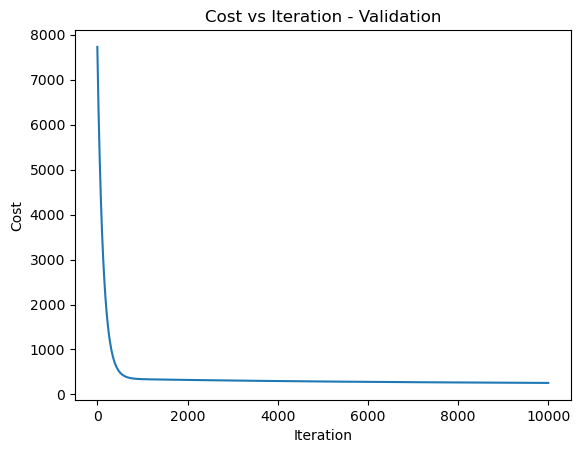

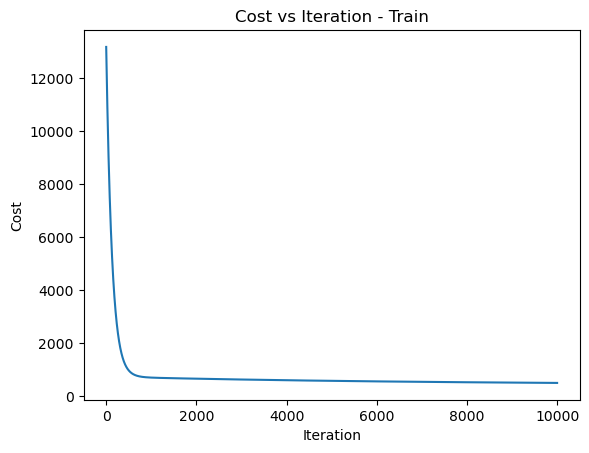

In [134]:
import matplotlib.pyplot as plt

# assuming change is a numpy array
iteration = np.arange(len(error_val)) # create an array of iteration numbers
plt.plot(iteration, error_val) # plot the change vs iteration
plt.xlabel("Iteration") # label the x-axis
plt.ylabel("Cost") # label the y-axis
plt.title("Cost vs Iteration - Validation") # give a title to the graph
plt.show() # show the graph


import matplotlib.pyplot as plt

# assuming change is a numpy array
iteration = np.arange(len(error_train)) # create an array of iteration numbers
plt.plot(iteration, error_train) # plot the change vs iteration
plt.xlabel("Iteration") # label the x-axis
plt.ylabel("Cost") # label the y-axis
plt.title("Cost vs Iteration - Train") # give a title to the graph
plt.show() # show the graph

# For Aplha 0.0001

In [178]:
# Define the learning rate and the number of iterations
alpha = 0.0001 # Learning rate
num_iter = 105000 # Number of iterations

In [179]:
error_val = []
error_train = []
# Perform gradient descent to update the coefficients
# length = X_train
for i in range(num_iter):
    #update predicted output
    y_pred=X_train.dot(coefficients)
    #Update gradient
    diff= y_pred - y_train
    gradient= (2/len(X_train))*((X_train.T).dot(diff))
    #update coefficients
    coefficients = coefficients-(alpha*gradient)
    #calculate prediction for Validate set 
    y_val_pred=X_val.dot(coefficients)
    #meansquared error on test data
    #tlen=len(y_test)
    msqer=np.sum((y_val-y_val_pred)**2)
    error_val.append(msqer)
    
    #calculate prediction for Train set 
    y_train_pred=X_train.dot(coefficients)
    #meansquared error on test data
    #tlen=len(y_test)
    msqer=np.sum((y_train-y_train_pred)**2)
    error_train.append(msqer)
    print(msqer)
    

15138.287306352871
15127.063836731764
15115.849075993465
15104.643017378026
15093.445654130737
15082.25697950214
15071.076986748012
15059.905669129359
15048.743019912432
15037.589032368698
15026.44369977485
15015.307015412796
15004.178972569669
14993.059564537798
14981.948784614731
14970.846626103215
14959.753082311188
14948.668146551798
14937.591812143368
14926.524072409416
14915.464920678642
14904.414350284918
14893.372354567302
14882.338926870008
14871.314060542429
14860.297748939112
14849.28998541977
14838.290763349261
14827.3000760976
14816.317917039943
14805.3442795566
14794.379157033003
14783.422542859731
14772.474430432487
14761.5348131521
14750.603684424528
14739.681037660841
14728.766866277223
14717.861163694975
14706.963923340496
14696.075138645298
14685.194803045979
14674.322909984243
14663.459452906875
14652.604425265756
14641.757820517847
14630.91963212518
14620.089853554873
14609.268478279106
14598.455499775133
14587.650911525267
14576.854707016882
14566.066879742404
145

9252.521595902403
9245.864769602867
9239.21310750278
9232.566605593634
9225.925259870044
9219.289066329724
9212.6580209735
9206.032119805299
9199.411358832152
9192.795734064191
9186.185241514642
9179.579877199823
9172.979637139155
9166.384517355134
9159.794513873356
9153.209622722494
9146.629839934307
9140.055161543636
9133.485583588397
9126.92110210958
9120.361713151251
9113.807412760549
9107.258196987674
9100.714061885896
9094.175003511551
9087.641017924032
9081.112101185794
9074.588249362347
9068.069458522248
9061.555724737123
9055.047044081632
9048.543412633486
9042.044826473442
9035.5512816853
9029.062774355894
9022.579300575104
9016.100856435842
9009.627438034046
9003.159041468694
8996.695662841787
8990.237298258355
8983.783943826444
8977.335595657132
8970.892249864504
8964.453902565674
8958.020549880757
8951.592187932889
8945.16881284821
8938.75042075587
8932.337007788023
8925.928570079825
8919.52510376943
8913.126604997993
8906.733069909664
8900.344494651583
8893.960875373883
8

6095.810647905717
6091.602382008382
6087.397379718946
6083.195638504178
6078.997155832819
6074.801929175571
6070.609956005098
6066.421233796031
6062.235760024956
6058.053532170422
6053.874547712931
6049.698804134947
6045.526298920879
6041.357029557095
6037.1909935319145
6033.028188335605
6028.868611460379
6024.712260400403
6020.559132651781
6016.409225712563
6012.262537082745
6008.119064264259
6003.978804760976
5999.8417560787075
5995.707915725198
5991.57728121013
5987.449850045115
5983.3256197437
5979.204587821359
5975.086751795498
5970.972109185443
5966.860657512454
5962.752394299709
5958.647317072312
5954.545423357287
5950.446710683578
5946.351176582046
5942.258818585468
5938.169634228538
5934.083621047864
5930.000776581964
5925.921098371267
5921.844583958113
5917.771230886748
5913.701036703324
5909.633998955898
5905.570115194432
5901.509382970789
5897.451799838729
5893.397363353917
5889.346071073909
5885.29792055816
5881.2529093680205
5877.211035066732
5873.172295219427
5869.136687

3928.7996461986913
3926.271541608525
3923.745396483304
3921.221209302098
3918.6989785451615
3916.178702693926
3913.6603802310015
3911.1440096401775
3908.629589406418
3906.1171180158644
3903.606593955835
3901.0980157148188
3898.5913817824803
3896.0866906496567
3893.5839408083534
3891.083130751751
3888.584258974194
3886.087323971203
3883.592324239461
3881.099258276817
3878.608124582291
3876.118921656065
3873.631647999485
3871.1463021150603
3868.6628825064636
3866.1813876785295
3863.7018161372503
3861.224166389781
3858.7484369444346
3856.274626310682
3853.802732999149
3851.3327555216215
3848.8646923910355
3846.3985421214866
3843.9343032282204
3841.4719742276357
3839.011553637283
3836.5530399758645
3834.0964317632306
3831.641727520381
3829.188925769464
3826.738025033776
3824.2890238377563
3821.841920706993
3819.3967141682165
3816.9534027493028
3814.511984979268
3812.0724593882733
3809.634824507618
3807.1990788697412
3804.765221008224
3802.333249457783
3799.903162754274
3797.4749594346877
3

2693.2230808369104
2691.652283503735
2690.082702583243
2688.514337131275
2686.9471862044065
2685.3812488599456
2683.816524155931
2682.2530111511333
2680.690708905053
2679.1296164779224
2677.5697329307004
2676.0110573250786
2674.4535887234733
2672.8973261890305
2671.3422687856228
2669.7884155778493
2668.235765631036
2666.684318011234
2665.134071785219
2663.585026020492
2662.0371797852767
2660.4905321485194
2658.9450821798914
2657.4008289497847
2655.857771529313
2654.315908990313
2652.7752404053363
2651.235764847661
2649.6974813912802
2648.160389110908
2646.6244870819755
2645.0897743806327
2643.556250083744
2642.023913268895
2640.492763014383
2638.9627983992223
2637.434018503142
2635.906422406587
2634.380009190712
2632.8547779373903
2631.3307277292033
2629.807857649448
2628.28616678213
2626.7656542119666
2625.2463190243875
2623.7281603055303
2622.211177142242
2620.6953686220804
2619.1807338333097
2617.6672718649015
2616.1549818065364
2614.6438627485995
2613.1339137821847
2611.62513399908

1911.7424459892868
1910.7764552080496
1909.8112114052606
1908.8467140011471
1907.8829624163832
1906.9199560720963
1905.9576943898583
1904.9961767916955
1904.0354027000785
1903.0753715379285
1902.1160827286144
1901.1575356959518
1900.1997298642043
1899.2426646580816
1898.2863395027412
1897.3307538237855
1896.3759070472638
1895.4217985996697
1894.4684279079443
1893.5157943994702
1892.5638975020768
1891.6127366440373
1890.6623112540683
1889.71262076133
1888.7636645954262
1887.8154421864022
1886.867952964746
1885.9211963613893
1884.9751718077046
1884.029878735504
1883.0853165770425
1882.1414847650162
1881.1983827325605
1880.2560099132506
1879.3143657411015
1878.3734496505695
1877.4332610765468
1876.4937994543661
1875.5550642197984
1874.6170548090524
1873.6797706587731
1872.7432112060455
1871.8073758883893
1870.8722641437616
1869.9378754105555
1869.0042091276014
1868.0712647341622
1867.1390416699394
1866.2075393750679
1865.2767572901164
1864.3466948560897
1863.4173515144257
1862.48872670699

1423.8708138535562
1423.2817085154243
1422.6930576384011
1422.1048608697683
1421.5171178570838
1420.9298282481773
1420.3429916911514
1419.7566078343825
1419.1706763265206
1418.5851968164882
1418.0001689534784
1417.4155923869598
1416.83146676667
1416.2477917426213
1415.6645669650957
1415.0817920846473
1414.4994667521019
1413.9175906185546
1413.3361633353734
1412.7551845541957
1412.17465392693
1411.5945711057552
1411.0149357431187
1410.4357474917383
1409.857006004603
1409.2787109349688
1408.700861936362
1408.1234586625778
1407.5465007676808
1406.9699879060029
1406.3939197321447
1405.8182959009746
1405.2431160676297
1404.6683798875147
1404.0940870163013
1403.520237109928
1402.9468298246018
1402.3738648167955
1401.8013417432492
1401.229260260969
1400.6576200272266
1400.0864206995602
1399.5156619357754
1398.9453433939411
1398.3754647323933
1397.8060256097315
1397.2370256848221
1396.668464616795
1396.1003420650452
1395.532657689231
1394.9654111492778
1394.3986021053713
1393.8322302179636
139

1120.0772358828774
1119.7221017615768
1119.3672405171928
1119.0126519379578
1118.6583358122655
1118.3042919286777
1117.9505200759168
1117.597020042872
1117.243791618594
1116.8908345922987
1116.538148753366
1116.1857338913376
1115.8335897959194
1115.4817162569816
1115.1301130645556
1114.7787800088377
1114.4277168801857
1114.0769234691202
1113.726399566325
1113.3761449626463
1113.0261594490917
1112.6764428168326
1112.3269948572008
1111.9778153616917
1111.6289041219616
1111.2802609298285
1110.9318855772722
1110.583777856434
1110.2359375596168
1109.888364479284
1109.5410584080605
1109.1940191387325
1108.8472464642468
1108.5007401777102
1108.154500072391
1107.8085259417176
1107.4628175792802
1107.1173747788262
1106.7721973342655
1106.4272850396671
1106.0826376892596
1105.7382550774323
1105.394136998733
1105.05028324787
1104.70669361971
1104.363367909279
1104.0203059117641
1103.6775074225077
1103.334972237014
1102.9927001509452
1102.650690960122
1102.3089444605225
1101.967460448285
1101.6262

956.5160729284405
956.2863232187368
956.0567490847416
955.8273503902117
955.5981269990116
955.3690787751102
955.1402055825826
954.9115072856088
954.6829837484745
954.4546348355711
954.2264604113948
953.998460340547
953.7706344877349
953.5429827177692
953.3155048955675
953.0882008861504
952.8610705546447
952.6341137662812
952.4073303863954
952.1807202804271
951.9542833139213
951.7280193525262
951.5019282619951
951.2760099081862
951.0502641570597
950.8246908746818
950.5992899272219
950.3740611809537
950.1490045022535
949.9241197576027
949.6994068135859
949.4748655368912
949.2504957943103
949.0262974527375
948.8022703791715
948.5784144407135
948.3547295045687
948.1312154380447
947.9078721085518
947.6846993836039
947.4616971308178
947.2388652179125
947.0162035127096
946.7937118831339
946.5713901972132
946.3492383230758
946.1272561289543
945.9054434831827
945.6838002541969
945.4623263105356
945.2410215208392
945.0198857538505
944.7989188784136
944.5781207634747
944.3574912780817
944.1370302

860.3481995056914
860.191711330247
860.0353418850995
859.87909107813
859.7229588172922
859.5669450106111
859.4110495661829
859.2552723921754
859.099613396827
858.9440724884479
858.7886495754196
858.6333445661941
858.4781573692961
858.3230878933189
858.1681360469283
858.0133017388603
857.8585848779222
857.7039853729922
857.5495031330184
857.3951380670208
857.2408900840887
857.0867590933832
856.9327450041351
856.7788477256458
856.6250671672868
856.4714032385014
856.317855848801
856.1644249077693
856.0111103250584
855.8579120103923
855.7048298735634
855.5518638244353
855.399013772941
855.2462796290833
855.0936613029353
854.9411587046397
854.7887717444091
854.6365003325251
854.4843443793404
854.3323037952755
854.180378490822
854.0285683765401
853.8768733630592
853.7252933610785
853.5738282813672
853.4224780347624
853.2712425321714
853.1201216845699
852.9691154030037
852.8182235985865
852.6674461825019
852.5167830660021
852.366234160408
852.2157993771098
852.0654786275659
851.9152718233042


787.6577682506189
787.5561441158617
787.454596149157
787.3531242914236
787.251728483627
787.1504086667778
787.0491647819322
786.9479967701932
786.8469045727084
786.7458881306717
786.6449473853223
786.5440822779457
786.4432927498722
786.3425787424776
786.2419401971841
786.1413770554587
786.0408892588134
785.9404767488065
785.8401394670411
785.7398773551662
785.6396903548753
785.5395784079074
785.4395414560474
785.3395794411249
785.239692305014
785.1398799896349
785.0401424369528
784.9404795889774
784.8408913877636
784.7413777754116
784.6419386940663
784.542574085917
784.4432838931991
784.3440680581914
784.244926523219
784.1458592306503
784.0468661228995
783.947947142425
783.8491022317302
783.7503313333627
783.6516343899152
783.5530113440244
783.4544621383716
783.3559867156832
783.2575850187297
783.1592569903253
783.0610025733299
782.9628217106467
782.8647143452239
782.7666804200537
782.6687198781724
782.570832662661
782.473018716644
782.3752779832905
782.2776104058134
782.1800159274705


734.8446965873463
734.782292577624
734.7199343201256
734.6576217793798
734.5953549199419
734.5331337063951
734.4709581033494
734.4088280754434
734.3467435873422
734.2847046037389
734.2227110893538
734.1607630089342
734.0988603272555
734.0370030091198
733.975191019357
733.9134243228237
733.8517028844049
733.7900266690115
733.7283956415826
733.6668097670835
733.6052690105084
733.5437733368769
733.4823227112365
733.420917098662
733.3595564642554
733.2982407731452
733.2369699904871
733.1757440814644
733.1145630112869
733.0534267451915
732.9923352484425
732.9312884863302
732.8702864241727
732.8093290273148
732.7484162611279
732.6875480910114
732.6267244823896
732.5659454007155
732.5052108114678
732.4445206801527
732.3838749723022
732.3232736534761
732.2627166892605
732.2022040452681
732.1417356871386
732.0813115805378
732.0209316911588
731.9605959847213
731.9003044269708
731.8400569836803
731.779853620649
731.7196943037028
731.6595789986936
731.5995076715006
731.5394802880287
731.4794968142

703.564902882361
703.525112928877
703.4853512000213
703.4456176739271
703.4059123287439
703.3662351426384
703.3265860937945
703.2869651604126
703.2473723207104
703.2078075529223
703.1682708352996
703.1287621461106
703.0892814636402
703.0498287661906
703.0104040320801
702.9710072396449
702.9316383672372
702.8922973932259
702.8529842959975
702.8136990539546
702.7744416455167
702.7352120491203
702.6960102432183
702.6568362062803
702.6176899167931
702.5785713532598
702.5394804942001
702.5004173181507
702.4613818036645
702.4223739293118
702.3833936736788
702.3444410153687
702.3055159330012
702.2666184052125
702.2277484106555
702.1889059279998
702.1500909359311
702.1113034131523
702.0725433383826
702.0338106903571
701.9951054478283
701.9564275895648
701.9177770943513
701.8791539409895
701.8405581082977
701.8019895751099
701.7634483202773
701.7249343226672
701.6864475611629
701.6479880146651
701.6095556620895
701.5711504823696
701.5327724544542
701.4944215573089
701.4560977699156
701.41780107

681.0364664975552
681.0122582046523
680.9880660711453
680.9638900845316
680.9397302323189
680.915586502024
680.8914588811735
680.867347357304
680.8432519179612
680.8191725507006
680.7951092430878
680.7710619826979
680.7470307571152
680.7230155539341
680.6990163607586
680.6750331652021
680.6510659548877
680.6271147174481
680.6031794405257
680.5792601117722
680.5553567188497
680.5314692494287
680.5075976911901
680.483742031824
680.4599022590302
680.4360783605179
680.4122703240062
680.3884781372233
680.364701787907
680.3409412638052
680.3171965526744
680.2934676422813
680.2697545204013
680.2460571748204
680.2223755933333
680.1987097637443
680.1750596738675
680.151425311526
680.1278066645526
680.1042037207894
680.0806164680882
680.0570448943101
680.0334889873252
680.0099487350138
679.9864241252649
679.9629151459774
679.9394217850593
679.9159440304282
679.8924818700108
679.8690352917436
679.8456042835717
679.8221888334506
679.7987889293443
679.7754045592263
679.75203571108
679.7286823728972

668.5743517781096
668.5581748151678
668.5420078029879
668.5258507338855
668.5097036001835
668.49356639421
668.4774391082994
668.4613217347918
668.4452142660336
668.4291166943763
668.4130290121784
668.396951211804
668.3808832856223
668.3648252260099
668.3487770253482
668.3327386760245
668.316710170433
668.3006915009726
668.2846826600489
668.268683640073
668.2526944334626
668.2367150326398
668.220745430034
668.20478561808
668.1888355892182
668.1728953358956
668.156964850564
668.1410441256821
668.1251331537136
668.1092319271288
668.093340438403
668.0774586800183
668.0615866444621
668.0457243242274
668.0298717118133
668.0140287997253
667.9981955804734
667.9823720465747
667.9665581905513
667.9507540049316
667.9349594822493
667.9191746150443
667.9033993958623
667.8876338172544
667.8718778717779
667.8561315519956
667.8403948504763
667.8246677597942
667.8089502725297
667.7932423812688
667.777544078603
667.7618553571301
667.746176209453
667.7305066281809
667.7148466059284
667.6991961353158
667.

659.4743397537537
659.4634532064008
659.4525725307276
659.4416977222163
659.4308287763525
659.4199656886254
659.4091084545279
659.3982570695559
659.3874115292092
659.3765718289907
659.3657379644073
659.3549099309694
659.3440877241902
659.3332713395871
659.3224607726804
659.3116560189944
659.3008570740567
659.2900639333981
659.2792765925531
659.2684950470596
659.2577192924591
659.2469493242968
659.2361851381206
659.2254267294823
659.2146740939374
659.2039272270441
659.1931861243651
659.1824507814655
659.1717211939148
659.1609973572848
659.1502792671521
659.1395669190954
659.1288603086978
659.1181594315455
659.107464283228
659.0967748593382
659.086091155473
659.0754131672318
659.064740890218
659.0540743200384
659.043413452303
659.0327582826253
659.0221088066226
659.0114650199146
659.0008269181253
658.9901944968819
658.9795677518148
658.9689466785579
658.9583312727486
658.9477215300273
658.9371174460382
658.9265190164288
658.9159262368496
658.9053391029556
658.8947576104033
658.8841817548

653.4778504077769
653.4699583568917
653.4620698789622
653.4541849712546
653.4463036310372
653.4384258555801
653.4305516421562
653.4226809880395
653.4148138905066
653.4069503468365
653.3990903543099
653.3912339102102
653.3833810118219
653.3755316564324
653.3676858413313
653.3598435638096
653.3520048211608
653.3441696106808
653.3363379296669
653.3285097754192
653.3206851452396
653.3128640364318
653.3050464463022
653.2972323721588
653.2894218113117
653.2816147610738
653.2738112187587
653.2660111816837
653.2582146471668
653.250421612529
653.242632075093
653.2348460321836
653.2270634811275
653.2192844192542
653.2115088438942
653.203736752381
653.1959681420497
653.1882030102372
653.1804413542833
653.1726831715293
653.1649284593186
653.1571772149965
653.149429435911
653.1416851194114
653.1339442628495
653.126206863579
653.1184729189557
653.1107424263375
653.1030153830845
653.0952917865584
653.0875716341232
653.0798549231447
653.0721416509916
653.0644318150335
653.0567254126429
653.04902244119

649.1618613170504
649.1557390412531
649.1496189890827
649.1435011588517
649.1373855488746
649.131272157467
649.125160982946
649.1190520236297
649.1129452778378
649.1068407438906
649.1007384201107
649.0946383048215
649.0885403963478
649.0824446930156
649.0763511931522
649.0702598950862
649.0641707971478
649.0580838976679
649.0519991949791
649.0459166874155
649.0398363733116
649.0337582510047
649.0276823188316
649.0216085751318
649.0155370182456
649.0094676465144
649.0034004582809
648.9973354518897
648.991272625686
648.9852119780163
648.9791535072288
648.9730972116727
648.9670430896986
648.9609911396583
648.9549413599048
648.9488937487928
648.9428483046777
648.9368050259163
648.9307639108672
648.9247249578899
648.9186881653445
648.9126535315938
648.9066210550006
648.9005907339299
648.8945625667471
648.8885365518197
648.8825126875158
648.8764909722051
648.8704714042585
648.8644539820485
648.8584387039481
648.852425568332
648.8464145735763
648.8404057180585
648.8343990001567
648.8283944182

645.7735505463697
645.7685181097162
645.763487074495
645.7584574396574
645.7534292041546
645.7484023669392
645.7433769269642
645.738352883184
645.7333302345533
645.7283089800278
645.723289118564
645.7182706491192
645.7132535706514
645.7082378821196
645.7032235824836
645.6982106707039
645.6931991457418
645.6881890065591
645.6831802521192
645.6781728813855
645.673166893323
645.6681622868967
645.663159061073
645.6581572148184
645.6531567471011
645.6481576568897
645.6431599431533
645.6381636048618
645.6331686409869
645.6281750505
645.6231828323732
645.6181919855806
645.6132025090958
645.608214401894
645.603227662951
645.5982422912431
645.5932582857479
645.5882756454431
645.5832943693079
645.578314456322
645.5733359054659
645.5683587157209
645.5633828860689
645.558408415493
645.5534353029768
645.5484635475043
645.5434931480615
645.5385241036338
645.5335564132083
645.5285900757724
645.5236250903148
645.5186614558243
645.5136991712911
645.5087382357057
645.5037786480597
645.4988204073454
645.

642.6439255741163
642.6396379172679
642.6353511096975
642.6310651507838
642.6267800399064
642.6224957764455
642.618212359781
642.6139297892939
642.6096480643658
642.6053671843786
642.6010871487142
642.5968079567556
642.592529607886
642.5882521014894
642.5839754369499
642.5796996136519
642.5754246309809
642.5711504883227
642.5668771850629
642.5626047205885
642.5583330942869
642.5540623055449
642.549792353751
642.5455232382938
642.5412549585618
642.536987513945
642.532720903833
642.5284551276163
642.5241901846857
642.5199260744328
642.5156627962492
642.5114003495272
642.5071387336595
642.5028779480396
642.4986179920609
642.4943588651178
642.4901005666047
642.4858430959171
642.4815864524503
642.4773306356003
642.4730756447636
642.4688214793376
642.4645681387194
642.4603156223068
642.4560639294984
642.4518130596932
642.4475630122902
642.4433137866891
642.4390653822907
642.434817798495
642.4305710347039
642.4263250903186
642.4220799647412
642.4178356573747
642.4135921676215
642.409349494885

639.8460542039822
639.8422295605897
639.8384054333769
639.8345818219809
639.830758726039
639.8269361451888
639.8231140790683
639.8192925273156
639.8154714895691
639.8116509654678
639.8078309546502
639.8040114567564
639.8001924714251
639.796373998297
639.7925560370115
639.7887385872095
639.7849216485316
639.7811052206189
639.7772893031122
639.7734738956534
639.7696589978842
639.7658446094465
639.7620307299833
639.7582173591367
639.7544044965496
639.7505921418654
639.7467802947274
639.7429689547795
639.7391581216657
639.7353477950302
639.7315379745178
639.727728659773
639.7239198504411
639.7201115461678
639.7163037465982
639.7124964513787
639.7086896601552
639.7048833725744
639.7010775882832
639.6972723069282
639.6934675281572
639.6896632516174
639.6858594769568
639.6820562038238
639.6782534318662
639.6744511607333
639.670649390074
639.6668481195371
639.6630473487724
639.6592470774295
639.6554473051585
639.65164803161
639.6478492564339
639.6440509792819
639.6402531998045
639.636455917653

637.7325308585218
637.7289500371824
637.7253695642398
637.721789439461
637.718209662613
637.7146302334634
637.7110511517792
637.7074724173283
637.7038940298787
637.7003159891982
637.696738295055
637.6931609472172
637.6895839454539
637.6860072895336
637.6824309792252
637.6788550142976
637.6752793945204
637.6717041196628
637.6681291894943
637.6645546037851
637.6609803623049
637.6574064648239
637.6538329111124
637.650259700941
637.6466868340804
637.6431143103013
637.639542129375
637.6359702910723
637.6323987951652
637.6288276414248
637.6252568296229
637.6216863595316
637.6181162309229
637.6145464435691
637.6109769972428
637.6074078917163
637.6038391267626
637.6002707021547
637.5967026176659
637.5931348730692
637.5895674681381
637.5860004026467
637.5824336763685
637.5788672890776
637.5753012405485
637.5717355305552
637.5681701588724
637.5646051252745
637.5610404295372
637.5574760714351
637.5539120507434
637.5503483672376
637.5467850206933
637.5432220108862
637.5396593375923
637.53609700058

635.806456910705
635.8030372497111
635.7996178325093
635.7961986589473
635.7927797288733
635.7893610421347
635.7859425985803
635.7825243980581
635.7791064404163
635.7756887255036
635.7722712531686
635.7688540232597
635.7654370356263
635.7620202901168
635.7586037865805
635.7551875248666
635.7517715048243
635.7483557263031
635.7449401891527
635.7415248932223
635.7381098383621
635.7346950244219
635.7312804512515
635.727866118701
635.7244520266207
635.7210381748612
635.7176245632727
635.7142111917057
635.7107980600111
635.7073851680395
635.703972515642
635.7005601026696
635.6971479289734
635.6937359944045
635.6903242988146
635.6869128420551
635.6835016239776
635.6800906444334
635.6766799032752
635.6732694003542
635.6698591355231
635.6664491086333
635.6630393195378
635.6596297680886
635.6562204541382
635.6528113775395
635.6494025381451
635.645993935808
635.642585570381
635.6391774417173
635.63576954967
635.6323618940924
635.6289544748381
635.6255472917608
635.6221403447137
635.6187336335508

634.018191570452
634.014882760907
634.0115741287118
634.0082656737654
634.0049573959674
634.0016492952163
633.9983413714116
633.9950336244527
633.9917260542393
633.9884186606703
633.9851114436456
633.9818044030648
633.9784975388275
633.9751908508338
633.971884338983
633.9685780031755
633.9652718433114
633.9619658592904
633.9586600510133
633.9553544183797
633.9520489612901
633.948743679645
633.945438573345
633.9421336422905
633.9388288863821
633.9355243055209
633.932219899607
633.928915668542
633.9256116122261
633.922307730561
633.9190040234475
633.9157004907868
633.91239713248
633.9090939484288
633.9057909385342
633.902488102698
633.8991854408214
633.8958829528062
633.8925806385543
633.8892784979672
633.8859765309469
633.8826747373953
633.8793731172144
633.8760716703061
633.8727703965731
633.869469295917
633.8661683682403
633.8628676134456
633.8595670314354
633.8562666221118
633.8529663853778
633.8496663211358
633.8463664292889
633.8430667097396
633.839767162391
633.8364677871458
633.8

632.3872370265522
632.3840056252205
632.3807743593793
632.3775432289597
632.3743122338926
632.37108137411
632.3678506495428
632.3646200601224
632.3613896057805
632.3581592864485
632.3549291020578
632.3516990525403
632.3484691378276
632.3452393578514
632.3420097125432
632.3387802018353
632.3355508256593
632.3323215839471
632.3290924766309
632.3258635036426
632.3226346649144
632.3194059603783
632.3161773899665
632.3129489536113
632.3097206512452
632.3064924828002
632.3032644482089
632.3000365474038
632.2968087803172
632.2935811468819
632.2903536470304
632.2871262806952
632.2838990478093
632.2806719483054
632.2774449821161
632.2742181491747
632.2709914494135
632.267764882766
632.2645384491651
632.2613121485438
632.2580859808352
632.2548599459725
632.2516340438889
632.2484082745178
632.2451826377925
632.2419571336462
632.2387317620128
632.2355065228253
632.2322814160173
632.2290564415224
632.2258315992744
632.222606889207
632.2193823112539
632.2161578653486
632.2129335514253
632.2097093694

630.904551636645
630.9013764043098
630.8982012806387
630.8950262655837
630.8918513590966
630.8886765611293
630.8855018716333
630.882327290561
630.8791528178638
630.8759784534939
630.8728041974034
630.8696300495441
630.8664560098682
630.8632820783278
630.8601082548751
630.8569345394619
630.853760932041
630.8505874325643
630.8474140409841
630.844240757253
630.8410675813232
630.8378945131467
630.8347215526762
630.8315486998645
630.8283759546638
630.8252033170268
630.8220307869058
630.8188583642534
630.8156860490228
630.8125138411663
630.8093417406362
630.806169747386
630.8029978613683
630.7998260825357
630.7966544108411
630.7934828462376
630.790311388678
630.7871400381154
630.7839687945022
630.7807976577926
630.7776266279388
630.7744557048942
630.7712848886117
630.7681141790451
630.764943576147
630.761773079871
630.7586026901699
630.7554324069979
630.7522622303076
630.7490921600528
630.7459221961867
630.742752338663
630.739582587435
630.7364129424566
630.733243403681
630.730073971062
630.

629.4234080022497
629.4202791029882
629.4171502933189
629.4140215732078
629.4108929426214
629.4077644015262
629.4046359498882
629.4015075876739
629.3983793148498
629.395251131382
629.3921230372372
629.3889950323818
629.385867116782
629.382739290405
629.3796115532166
629.3764839051837
629.373356346273
629.3702288764508
629.367101495684
629.363974203939
629.360847001183
629.357719887382
629.3545928625031
629.3514659265131
629.3483390793788
629.345212321067
629.3420856515445
629.3389590707781
629.3358325787348
629.3327061753814
629.3295798606848
629.3264536346121
629.3233274971304
629.3202014482064
629.3170754878074
629.3139496159002
629.3108238324523
629.3076981374304
629.3045725308018
629.3014470125338
629.2983215825934
629.2951962409478
629.2920709875641
629.2889458224101
629.2858207454526
629.282695756659
629.279570855997
629.2764460434332
629.2733213189359
629.270196682472
629.2670721340087
629.2639476735142
629.2608233009552
629.2576990162995
629.2545748195148
629.2514507105686
629.

627.5918923537004
627.5888112308694
627.5857301815608
627.5826492057531
627.5795683034245
627.5764874745532
627.5734067191181
627.5703260370972
627.5672454284692
627.5641648932125
627.5610844313055
627.558004042727
627.5549237274549
627.5518434854685
627.5487633167456
627.5456832212656
627.5426031990064
627.5395232499468
627.5364433740654
627.5333635713408
627.530283841752
627.5272041852772
627.5241246018952
627.5210450915848
627.5179656543245
627.5148862900933
627.5118069988696
627.5087277806326
627.5056486353609
627.5025695630329
627.4994905636279
627.4964116371245
627.4933327835016
627.4902540027381
627.4871752948128
627.4840966597045
627.481018097392
627.4779396078546
627.4748611910711
627.4717828470202
627.468704575681
627.4656263770328
627.462548251054
627.459470197724
627.4563922170219
627.4533143089262
627.4502364734167
627.4471587104719
627.4440810200712
627.4410034021935
627.4379258568179
627.4348483839237
627.4317709834901
627.4286936554961
627.4256163999208
627.422539216743

625.8834879614486
625.8804449229132
625.8774019480206
625.8743590367569
625.8713161891073
625.8682734050582
625.8652306845948
625.862188027703
625.8591454343687
625.8561029045775
625.8530604383152
625.8500180355676
625.8469756963206
625.8439334205598
625.8408912082713
625.8378490594406
625.8348069740537
625.8317649520966
625.828722993555
625.8256810984149
625.8226392666619
625.8195974982821
625.8165557932613
625.8135141515857
625.8104725732409
625.807431058213
625.8043896064878
625.8013482180515
625.7983068928897
625.7952656309888
625.7922244323345
625.7891832969128
625.7861422247099
625.7831012157114
625.780060269904
625.7770193872732
625.7739785678051
625.770937811486
625.7678971183018
625.7648564882386
625.7618159212825
625.7587754174195
625.755734976636
625.7526945989177
625.749654284251
625.7466140326222
625.743573844017
625.7405337184218
625.7374936558228
625.7344536562063
625.7314137195583
625.7283738458648
625.7253340351124
625.7222942872871
625.7192546023753
625.716214980363
6

624.1919801760529
624.1889707583841
624.1859613977929
624.1829520942688
624.1799428478034
624.1769336583866
624.173924526009
624.1709154506611
624.1679064323334
624.1648974710165
624.1618885667008
624.1588797193768
624.155870929035
624.1528621956661
624.1498535192605
624.1468448998091
624.1438363373019
624.1408278317298
624.1378193830833
624.1348109913529
624.1318026565293
624.1287943786031
624.125786157565
624.1227779934053
624.1197698861148
624.116761835684
624.1137538421037
624.1107459053646
624.107738025457
624.1047302023719
624.1017224360995
624.098714726631
624.0957070739566
624.0926994780673
624.0896919389538
624.0866844566065
624.0836770310162
624.0806696621736
624.0776623500695
624.0746550946947
624.0716478960396
624.068640754095
624.0656336688518
624.0626266403008
624.0596196684324
624.0566127532377
624.0536058947073
624.0505990928318
624.0475923476024
624.0445856590095
624.041579027044
624.0385724516967
624.0355659329583
624.0325594708199
624.029553065272
624.0265467163056
6

622.7329806685746
622.729998038589
622.7270154617528
622.7240329380593
622.7210504675018
622.7180680500733
622.7150856857675
622.7121033745769
622.7091211164957
622.7061389115163
622.7031567596325
622.7001746608375
622.6971926151243
622.6942106224864
622.6912286829172
622.6882467964095
622.6852649629573
622.6822831825532
622.679301455191
622.6763197808639
622.673338159565
622.6703565912878
622.6673750760255
622.6643936137716
622.6614122045193
622.658430848262
622.655449544993
622.6524682947054
622.6494870973931
622.646505953049
622.6435248616666
622.6405438232393
622.6375628377605
622.6345819052234
622.6316010256215
622.6286201989482
622.6256394251967
622.6226587043607
622.6196780364332
622.616697421408
622.6137168592782
622.6107363500374
622.607755893679
622.6047754901963
622.6017951395827
622.5988148418319
622.5958345969369
622.5928544048916
622.5898742656889
622.5868941793227
622.5839141457864
622.5809341650731
622.5779542371766
622.5749743620902
622.5719945398077
622.5690147703222


621.1624399224212
621.1594845670638
621.156529261847
621.1535740067665
621.1506188018172
621.1476636469946
621.144708542294
621.1417534877103
621.1387984832393
621.1358435288759
621.1328886246155
621.1299337704532
621.126978966385
621.124024212405
621.1210695085097
621.1181148546937
621.1151602509522
621.1122056972808
621.1092511936749
621.1062967401297
621.1033423366404
621.1003879832024
621.097433679811
621.0944794264615
621.0915252231491
621.0885710698695
621.0856169666179
621.0826629133894
621.0797089101794
621.0767549569835
621.0738010537966
621.0708472006146
621.0678933974324
621.0649396442454
621.0619859410492
621.0590322878389
621.0560786846102
621.053125131358
621.050171628078
621.0472181747655
621.0442647714158
621.0413114180243
621.0383581145866
621.0354048610975
621.0324516575531
621.0294985039482
621.0265454002786
621.0235923465395
621.0206393427263
621.0176863888344
621.0147334848593
621.0117806307962
621.0088278266408
621.0058750723883
621.0029223680342
620.9999697135739

619.5034510450398
619.5005232994399
619.4975956017349
619.494667951922
619.4917403499973
619.4888127959575
619.4858852897996
619.48295783152
619.4800304211155
619.477103058583
619.4741757439187
619.4712484771198
619.4683212581829
619.4653940871043
619.4624669638811
619.4595398885098
619.4566128609872
619.45368588131
619.4507589494749
619.4478320654785
619.4449052293177
619.441978440989
619.4390517004895
619.4361250078155
619.4331983629639
619.4302717659313
619.4273452167146
619.4244187153104
619.4214922617155
619.4185658559263
619.4156394979402
619.4127131877535
619.4097869253628
619.4068607107652
619.4039345439573
619.4010084249356
619.3980823536972
619.3951563302388
619.3922303545569
619.3893044266483
619.3863785465101
619.3834527141386
619.3805269295306
619.3776011926831
619.3746755035929
619.3717498622565
619.3688242686708
619.3658987228325
619.3629732247384
619.3600477743854
619.35712237177
619.3541970168893
619.3512717097396
619.3483464503181
619.3454212386216
619.3424960746465
6

617.7929994361659
617.7900992937089
617.7871991974945
617.7842991475206
617.7813991437846
617.7784991862843
617.7755992750173
617.7726994099811
617.7697995911734
617.7668998185918
617.764000092234
617.7611004120977
617.7582007781803
617.7553011904795
617.7524016489931
617.7495021537188
617.7466027046539
617.7437033017964
617.7408039451436
617.7379046346932
617.7350053704433
617.7321061523911
617.7292069805342
617.7263078548706
617.7234087753977
617.7205097421133
617.7176107550148
617.7147118141002
617.7118129193667
617.7089140708124
617.7060152684348
617.7031165122315
617.7002178022003
617.6973191383387
617.6944205206446
617.6915219491153
617.6886234237487
617.6857249445425
617.6828265114941
617.6799281246016
617.6770297838624
617.674131489274
617.6712332408347
617.6683350385415
617.6654368823923
617.662538772385
617.6596407085169
617.6567426907859
617.6538447191895
617.6509467937259
617.6480489143921
617.6451510811862
617.6422532941059
617.6393555531487
617.6364578583123
617.633560209

616.2767320538553
616.2738558897831
616.2709797708608
616.2681036970857
616.2652276684569
616.2623516849721
616.2594757466294
616.2565998534274
616.2537240053637
616.250848202437
616.2479724446453
616.2450967319867
616.2422210644595
616.2393454420617
616.2364698647918
616.2335943326477
616.2307188456277
616.22784340373
616.2249680069528
616.2220926552942
616.2192173487526
616.2163420873258
616.2134668710123
616.2105916998103
616.2077165737179
616.2048414927333
616.2019664568547
616.1990914660803
616.1962165204081
616.1933416198367
616.1904667643641
616.1875919539884
616.1847171887081
616.181842468521
616.1789677934256
616.1760931634199
616.1732185785022
616.1703440386707
616.1674695439239
616.1645950942593
616.1617206896758
616.1588463301711
616.1559720157438
616.153097746392
616.1502235221137
616.1473493429073
616.1444752087709
616.141601119703
616.1387270757016
616.1358530767648
616.1329791228909
616.1301052140782
616.1272313503248
616.1243575316291
616.1214837579892
616.118610029403

614.5818823994158
614.5790326710505
614.5761829868839
614.5733333469143
614.5704837511405
614.5676341995612
614.564784692175
614.5619352289801
614.5590858099755
614.5562364351597
614.5533871045311
614.5505378180883
614.5476885758301
614.5448393777549
614.5419902238615
614.5391411141484
614.536292048614
614.5334430272571
614.5305940500762
614.5277451170698
614.5248962282369
614.5220473835755
614.5191985830845
614.5163498267626
614.5135011146083
614.5106524466202
614.5078038227966
614.5049552431366
614.5021067076386
614.4992582163011
614.4964097691226
614.4935613661019
614.4907130072376
614.4878646925281
614.4850164219723
614.4821681955686
614.4793200133157
614.476471875212
614.4736237812565
614.4707757314471
614.4679277257832
614.465079764263
614.4622318468851
614.4593839736481
614.4565361445507
614.4536883595915
614.450840618769
614.4479929220819
614.4451452695288
614.4422976611082
614.4394500968189
614.4366025766594
614.4337551006281
614.430907668724
614.4280602809455
614.425212937291

613.173815552453
613.1709875825848
613.168159656271
613.1653317735106
613.1625039343023
613.159676138645
613.1568483865373
613.1540206779781
613.1511930129662
613.1483653915005
613.1455378135797
613.1427102792029
613.1398827883684
613.1370553410752
613.1342279373224
613.1314005771087
613.1285732604325
613.1257459872932
613.1229187576891
613.1200915716195
613.1172644290828
613.1144373300779
613.1116102746038
613.1087832626592
613.105956294243
613.103129369354
613.1003024879908
613.0974756501523
613.0946488558375
613.0918221050449
613.0889953977737
613.0861687340225
613.0833421137903
613.0805155370756
613.0776890038775
613.0748625141946
613.0720360680258
613.0692096653701
613.0663833062259
613.0635569905926
613.0607307184684
613.0579044898527
613.0550783047438
613.052252163141
613.0494260650428
613.0466000104481
613.0437739993556
613.0409480317646
613.0381221076731
613.0352962270808
613.0324703899862
613.0296445963878
613.0268188462849
613.0239931396759
613.0211674765599
613.018341856935

611.8326051556335
611.8297977889467
611.8269904652841
611.8241831846445
611.8213759470273
611.818568752431
611.8157616008549
611.8129544922979
611.8101474267587
611.8073404042366
611.8045334247305
611.8017264882391
611.7989195947615
611.7961127442968
611.7933059368439
611.7904991724016
611.787692450969
611.7848857725451
611.7820791371287
611.779272544719
611.7764659953145
611.7736594889147
611.7708530255184
611.7680466051243
611.7652402277317
611.7624338933393
611.7596276019462
611.7568213535515
611.7540151481539
611.7512089857526
611.7484028663462
611.7455967899341
611.7427907565149
611.7399847660879
611.7371788186518
611.7343729142058
611.7315670527485
611.7287612342792
611.7259554587968
611.7231497263001
611.7203440367882
611.7175383902602
611.7147327867149
611.7119272261511
611.7091217085682
611.7063162339648
611.7035108023399
611.7007054136927
611.6979000680219
611.6950947653268
611.6922895056059
611.6894842888587
611.6866791150837
611.6838739842801
611.681068896447
611.6782638515

610.2003939877535
610.1976115774243
610.1948292095487
610.1920468841264
610.1892646011561
610.1864823606365
610.1837001625676
610.1809180069474
610.1781358937758
610.1753538230516
610.172571794774
610.1697898089418
610.1670078655543
610.1642259646105
610.1614441061097
610.1586622900506
610.1558805164325
610.1530987852547
610.1503170965159
610.1475354502152
610.1447538463519
610.1419722849253
610.1391907659339
610.1364092893771
610.133627855254
610.1308464635637
610.1280651143052
610.1252838074776
610.1225025430799
610.1197213211113
610.1169401415711
610.114159004458
610.1113779097714
610.1085968575101
610.1058158476733
610.1030348802601
610.1002539552696
610.097473072701
610.0946922325533
610.0919114348253
610.0891306795165
610.0863499666258
610.0835692961523
610.0807886680952
610.0780080824534
610.0752275392263
610.0724470384125
610.0696665800112
610.0668861640222
610.0641057904436
610.061325459275
610.0585451705157
610.0557649241642
610.0529847202199
610.050204558682
610.047424439549

608.6543806482846
608.6516217888891
608.6488629714581
608.646104195991
608.6433454624864
608.6405867709441
608.6378281213631
608.6350695137421
608.6323109480808
608.6295524243783
608.6267939426332
608.6240355028456
608.6212771050137
608.6185187491374
608.6157604352154
608.6130021632471
608.6102439332317
608.6074857451681
608.6047275990558
608.6019694948936
608.5992114326808
608.5964534124167
608.5936954341005
608.5909374977311
608.5881796033078
608.5854217508297
608.582663940296
608.5799061717059
608.5771484450588
608.5743907603531
608.5716331175888
608.5688755167647
608.5661179578799
608.5633604409338
608.5606029659253
608.5578455328538
608.5550881417182
608.552330792518
608.549573485252
608.5468162199196
608.54405899652
608.5413018150521
608.5385446755154
608.5357875779089
608.5330305222317
608.5302735084829
608.5275165366619
608.5247596067677
608.5220027187995
608.5192458727566
608.516489068638
608.513732306443
608.5109755861706
608.5082189078199
608.5054622713906
608.5027056768811


607.2692172400443
607.2664794265511
607.2637416546122
607.2610039242268
607.2582662353941
607.2555285881131
607.2527909823832
607.2500534182036
607.2473158955736
607.2445784144923
607.2418409749589
607.2391035769724
607.2363662205327
607.2336289056382
607.2308916322886
607.2281544004829
607.2254172102205
607.2226800615005
607.219942954322
607.2172058886841
607.2144688645867
607.2117318820283
607.2089949410083
607.2062580415261
607.2035211835806
607.2007843671714
607.1980475922973
607.1953108589578
607.1925741671517
607.1898375168789
607.1871009081381
607.1843643409287
607.1816278152498
607.1788913311007
607.1761548884806
607.1734184873886
607.170682127824
607.167945809786
607.165209533274
607.1624732982868
607.1597371048241
607.1570009528847
607.1542648424679
607.1515287735733
607.1487927461997
607.1460567603461
607.1433208160124
607.1405849131972
607.1378490519002
607.1351132321201
607.1323774538565
607.1296417171084
607.1269060218752
607.124170368156
607.1214347559502
607.11869918525

605.9707017613002
605.9679836395769
605.9652655590398
605.9625475196881
605.959829521521
605.9571115645379
605.9543936487378
605.95167577412
605.9489579406841
605.9462401484287
605.9435223973537
605.940804687458
605.9380870187408
605.9353693912014
605.9326518048392
605.9299342596534
605.9272167556429
605.9244992928074
605.921781871146
605.9190644906578
605.9163471513422
605.9136298531982
605.9109125962253
605.9081953804229
605.9054782057899
605.9027610723256
605.9000439800293
605.8973269289003
605.8946099189377
605.8918929501409
605.8891760225092
605.8864591360415
605.8837422907372
605.881025486596
605.8783087236166
605.8755920017982
605.8728753211403
605.8701586816422
605.8674420833031
605.8647255261221
605.8620090100985
605.8592925352316
605.8565761015205
605.8538597089648
605.8511433575633
605.8484270473157
605.8457107782208
605.842994550278
605.8402783634867
605.837562217846
605.8348461133551
605.8321300500135
605.8294140278201
605.8266980467744
605.8239821068756
605.8212662081228


604.6086705927473
604.6059730932266
604.6032756345179
604.6005782166208
604.5978808395341
604.5951835032572
604.5924862077898
604.5897889531307
604.5870917392792
604.5843945662348
604.5816974339969
604.5790003425642
604.5763032919364
604.5736062821127
604.5709093130923
604.5682123848746
604.5655154974587
604.5628186508438
604.5601218450295
604.5574250800149
604.5547283557992
604.5520316723818
604.5493350297618
604.5466384279387
604.5439418669114
604.5412453466795
604.5385488672423
604.5358524285988
604.5331560307484
604.5304596736905
604.5277633574242
604.5250670819487
604.5223708472637
604.5196746533679
604.516978500261
604.5142823879419
604.5115863164102
604.5088902856651
604.5061942957057
604.5034983465314
604.5008024381416
604.4981065705351
604.4954107437118
604.4927149576706
604.4900192124107
604.4873235079317
604.4846278442326
604.4819322213127
604.4792366391714
604.4765410978079
604.4738455972214
604.4711501374113
604.4684547183767
604.4657593401171
604.4630640026314
604.4603687

603.2462576724294
603.243580771756
603.2409039115291
603.2382270917483
603.2355503124126
603.2328735735214
603.2301968750737
603.2275202170694
603.2248435995073
603.2221670223869
603.2194904857074
603.216813989468
603.2141375336682
603.2114611183072
603.2087847433843
603.2061084088988
603.2034321148499
603.2007558612369
603.1980796480592
603.1954034753162
603.1927273430067
603.1900512511304
603.1873751996864
603.1846991886744
603.1820232180933
603.1793472879422
603.1766713982208
603.1739955489284
603.1713197400638
603.1686439716268
603.1659682436166
603.1632925560323
603.1606169088732
603.1579413021389
603.1552657358283
603.1525902099409
603.1499147244758
603.1472392794326
603.1445638748105
603.1418885106086
603.1392131868264
603.1365379034629
603.1338626605177
603.1311874579901
603.1285122958791
603.1258371741842
603.1231620929045
603.1204870520396
603.1178120515888
603.1151370915509
603.1124621719256
603.1097872927122
603.1071124539097
603.1044376555178
603.1017628975353
603.09908817

601.8331528761045
601.8304973131897
601.827841790349
601.8251863075815
601.8225308648864
601.8198754622633
601.8172200997111
601.8145647772296
601.8119094948177
601.8092542524751
601.8065990502005
601.8039438879939
601.801288765854
601.7986336837805
601.7959786417725
601.7933236398295
601.7906686779509
601.7880137561353
601.7853588743827
601.7827040326922
601.7800492310632
601.777394469495
601.7747397479866
601.7720850665377
601.7694304251473
601.7667758238149
601.7641212625397
601.7614667413211
601.7588122601582
601.7561578190507
601.7535034179974
601.750849056998
601.7481947360518
601.7455404551578
601.7428862143154
601.7402320135241
601.7375778527831
601.7349237320916
601.7322696514491
601.7296156108549
601.7269616103081
601.7243076498081
601.7216537293541
601.7189998489459
601.7163460085821
601.7136922082625
601.7110384479862
601.7083847277524
601.7057310475609
601.7030774074103
601.7004238073005
601.6977702472304
601.6951167271998
601.6924632472073
601.6898098072528
601.6871564073

600.4629213604393
600.460286463257
600.4576516057919
600.4550167880427
600.4523820100093
600.4497472716906
600.4471125730863
600.4444779141954
600.4418432950172
600.4392087155513
600.436574175797
600.4339396757532
600.4313052154196
600.4286707947954
600.42603641388
600.4234020726725
600.4207677711725
600.418133509379
600.4154992872916
600.4128651049095
600.410230962232
600.4075968592585
600.4049627959882
600.4023287724206
600.3996947885549
600.3970608443904
600.3944269399262
600.391793075162
600.389159250097
600.3865254647303
600.3838917190617
600.3812580130901
600.378624346815
600.3759907202356
600.3733571333512
600.3707235861614
600.3680900786651
600.3654566108619
600.3628231827508
600.3601897943317
600.3575564456034
600.3549231365655
600.352289867217
600.3496566375577
600.3470234475865
600.3443902973029
600.3417571867062
600.3391241157956
600.3364910845708
600.3338580930306
600.3312251411744
600.3285922290019
600.3259593565122
600.3233265237045
600.3206937305782
600.3180609771326
60

598.9596127864922
598.9570005357828
598.9543883244019
598.9517761523491
598.9491640196236
598.946551926225
598.9439398721523
598.9413278574052
598.9387158819828
598.9361039458843
598.9334920491092
598.930880191657
598.9282683735266
598.9256565947177
598.9230448552294
598.9204331550611
598.9178214942121
598.9152098726819
598.9125982904696
598.9099867475747
598.9073752439966
598.9047637797341
598.9021523547874
598.8995409691549
598.8969296228365
598.8943183158317
598.8917070481391
598.8890958197587
598.8864846306894
598.883873480931
598.8812623704824
598.878651299343
598.8760402675123
598.8734292749895
598.8708183217739
598.8682074078648
598.8655965332619
598.862985697964
598.8603749019708
598.8577641452814
598.8551534278952
598.8525427498116
598.84993211103
598.8473215115494
598.8447109513695
598.8421004304894
598.8394899489085
598.8368795066262
598.8342691036418
598.8316587399545
598.8290484155636
598.8264381304689
598.823827884669
598.8212176781637
598.8186075109523
598.8159973830341


597.4743971305709
597.4718072277549
597.4692173638867
597.4666275389657
597.4640377529911
597.4614480059624
597.4588582978789
597.45626862874
597.4536789985448
597.4510894072929
597.4484998549835
597.4459103416159
597.4433208671896
597.4407314317036
597.4381420351576
597.435552677551
597.4329633588828
597.4303740791524
597.4277848383595
597.4251956365028
597.4226064735822
597.4200173495968
597.4174282645461
597.4148392184292
597.4122502112454
597.4096612429944
597.4070723136753
597.4044834232875
597.4018945718302
597.3993057593028
597.3967169857049
597.3941282510355
597.391539555294
597.3889508984798
597.3863622805924
597.3837737016307
597.3811851615944
597.3785966604828
597.3760081982953
597.3734197750309
597.3708313906893
597.3682430452698
597.3656547387714
597.3630664711936
597.3604782425361
597.3578900527979
597.3553019019781
597.3527137900766
597.3501257170924
597.3475376830249
597.3449496878735
597.3423617316374
597.339773814316
597.3371859359086
597.3345980964148
597.33201029583

595.9710697101825
595.9685024020546
595.9659351324912
595.9633679014911
595.9608007090537
595.9582335551786
595.955666439865
595.9530993631122
595.9505323249198
595.947965325287
595.9453983642128
595.9428314416971
595.940264557739
595.9376977123378
595.935130905493
595.9325641372036
595.9299974074694
595.9274307162896
595.9248640636633
595.9222974495902
595.9197308740694
595.9171643371003
595.9145978386824
595.9120313788148
595.909464957497
595.9068985747283
595.9043322305081
595.9017659248357
595.8991996577104
595.8966334291317
595.8940672390987
595.891501087611
595.8889349746677
595.8863689002684
595.8838028644125
595.8812368670989
595.8786709083273
595.876104988097
595.8735391064073
595.8709732632576
595.8684074586472
595.8658416925753
595.8632759650417
595.8607102760452
595.8581446255855
595.855579013662
595.8530134402737
595.8504479054201
595.8478824091007
595.8453169513147
595.8427515320616
595.8401861513403
595.8376208091507
595.8350555054918
595.8324902403632
595.829925013764
5

594.3663658639516
594.3638226459367
594.361279466078
594.3587363243748
594.3561932208268
594.3536501554329
594.3511071281923
594.348564139105
594.3460211881699
594.3434782753866
594.340935400754
594.3383925642721
594.3358497659399
594.3333070057565
594.3307642837218
594.3282215998348
594.3256789540951
594.3231363465017
594.3205937770542
594.3180512457521
594.3155087525945
594.3129662975806
594.3104238807102
594.3078815019826
594.3053391613967
594.3027968589522
594.3002545946483
594.2977123684848
594.2951701804604
594.2926280305749
594.2900859188275
594.2875438452176
594.2850018097444
594.2824598124075
594.279917853206
594.2773759321395
594.2748340492072
594.2722922044086
594.2697503977429
594.2672086292096
594.2646668988077
594.2621252065371
594.2595835523967
594.2570419363863
594.2545003585049
594.2519588187517
594.2494173171266
594.2468758536286
594.2443344282569
594.2417930410112
594.2392516918908
594.2367103808949
594.2341691080228
594.2316278732742
594.2290866766482
594.2265455181

593.0465028279884
593.0439794022111
593.0414560142557
593.0389326641209
593.0364093518067
593.0338860773122
593.0313628406368
593.0288396417797
593.0263164807404
593.0237933575183
593.0212702721126
593.0187472245228
593.0162242147483
593.0137012427883
593.0111783086423
593.0086554123097
593.0061325537897
593.0036097330817
593.001086950185
592.9985642050992
592.9960414978236
592.9935188283575
592.9909961967
592.9884736028508
592.9859510468091
592.9834285285746
592.9809060481462
592.9783836055233
592.9758612007056
592.9733388336922
592.9708165044826
592.968294213076
592.965771959472
592.9632497436697
592.9607275656687
592.9582054254681
592.9556833230674
592.953161258466
592.9506392316633
592.9481172426586
592.9455952914511
592.9430733780405
592.9405515024258
592.9380296646065
592.9355078645822
592.9329861023517
592.9304643779151
592.9279426912711
592.9254210424195
592.9228994313595
592.9203778580904
592.9178563226117
592.9153348249226
592.9128133650227
592.9102919429112
592.9077705585873

591.7093665636366
591.7068631690182
591.7043598118833
591.701856492231
591.6993532100607
591.6968499653724
591.6943467581648
591.6918435884371
591.6893404561895
591.6868373614205
591.6843343041303
591.6818312843175
591.6793283019819
591.6768253571227
591.6743224497394
591.6718195798313
591.6693167473978
591.6668139524381
591.6643111949519
591.6618084749383
591.6593057923967
591.6568031473265
591.654300539727
591.6517979695979
591.649295436938
591.6467929417472
591.6442904840246
591.6417880637695
591.6392856809814
591.6367833356597
591.6342810278038
591.6317787574129
591.6292765244864
591.6267743290238
591.6242721710241
591.6217700504875
591.6192679674124
591.6167659217988
591.6142639136456
591.6117619429526
591.6092600097192
591.6067581139442
591.6042562556275
591.6017544347684
591.599252651366
591.5967509054198
591.5942491969294
591.5917475258938
591.5892458923126
591.5867442961851
591.5842427375107
591.5817412162887
591.5792397325185
591.5767382861995
591.574236877331
591.57173550591

590.2711166212409
590.2686347498188
590.2661529155173
590.2636711183354
590.2611893582728
590.2587076353286
590.2562259495023
590.2537443007932
590.2512626892009
590.2487811147244
590.2462995773635
590.2438180771171
590.2413366139851
590.2388551879666
590.236373799061
590.2338924472674
590.2314111325857
590.2289298550147
590.2264486145546
590.2239674112038
590.2214862449623
590.2190051158293
590.216524023804
590.2140429688862
590.211561951075
590.2090809703697
590.2066000267698
590.2041191202748
590.2016382508837
590.1991574185962
590.1966766234117
590.1941958653293
590.1917151443486
590.1892344604687
590.1867538136893
590.1842732040097
590.1817926314293
590.1793120959472
590.1768315975633
590.1743511362763
590.1718707120859
590.1693903249917
590.1669099749927
590.1644296620887
590.1619493862786
590.159469147562
590.1569889459383
590.1545087814068
590.1520286539671
590.1495485636183
590.1470685103598
590.1445884941911
590.1421085151114
590.1396285731204
590.137148668217
590.13466880040

588.958450801198
588.9559885529239
588.9535263414399
588.9510641667446
588.9486020288379
588.9461399277191
588.9436778633872
588.9412158358421
588.9387538450828
588.936291891109
588.9338299739198
588.9313680935147
588.9289062498931
588.9264444430546
588.923982672998
588.9215209397232
588.9190592432294
588.916597583516
588.9141359605824
588.9116743744275
588.9092128250518
588.9067513124535
588.9042898366326
588.9018283975885
588.8993669953204
588.8969056298276
588.8944443011096
588.8919830091659
588.8895217539957
588.8870605355986
588.8845993539736
588.8821382091204
588.8796771010383
588.8772160297267
588.874754995185
588.8722939974123
588.8698330364084
588.8673721121723
588.8649112247039
588.8624503740018
588.8599895600662
588.857528782896
588.8550680424906
588.8526073388498
588.8501466719722
588.847686041858
588.8452254485061
588.842764891916
588.8403043720868
588.8378438890185
588.83538344271
588.832923033161
588.8304626603705
588.8280023243382
588.8255420250631
588.8230817625451
588

587.6879182010391
587.6854749270776
587.6830316895864
587.6805884885645
587.6781453240114
587.6757021959268
587.6732591043095
587.6708160491595
587.6683730304758
587.6659300482579
587.6634871025052
587.6610441932171
587.6586013203928
587.656158484032
587.6537156841339
587.6512729206978
587.6488301937234
587.6463875032098
587.6439448491565
587.6415022315629
587.6390596504282
587.6366171057518
587.6341745975335
587.6317321257725
587.6292896904678
587.626847291619
587.6244049292259
587.6219626032873
587.6195203138029
587.617078060772
587.6146358441939
587.6121936640684
587.6097515203943
587.6073094131714
587.604867342399
587.6024253080762
587.5999833102028
587.5975413487781
587.5950994238011
587.5926575352719
587.5902156831892
587.5877738675524
587.5853320883616
587.5828903456156
587.5804486393138
587.5780069694557
587.5755653360409
587.5731237390683
587.5706821785377
587.5682406544483
587.5657991667995
587.5633577155908
587.5609163008214
587.5584749224909
587.5560335805986
587.5535922751

586.4295961340315
586.4271716334493
586.4247471690213
586.4223227407467
586.419898348625
586.4174739926557
586.4150496728378
586.4126253891709
586.4102011416546
586.407776930288
586.4053527550705
586.4029286160019
586.400504513081
586.3980804463076
586.395656415681
586.3932324212005
586.3908084628656
586.3883845406756
586.3859606546299
586.383536804728
586.3811129909691
586.3786892133528
586.3762654718786
586.3738417665454
586.3714180973531
586.3689944643006
586.3665708673878
586.3641473066139
586.3617237819781
586.3593002934799
586.356876841119
586.3544534248942
586.3520300448056
586.349606700852
586.347183393033
586.344760121348
586.3423368857965
586.3399136863775
586.337490523091
586.335067395936
586.3326443049118
586.3302212500179
586.3277982312541
586.325375248619
586.3229523021126
586.3205293917342
586.3181065174831
586.3156836793586
586.3132608773602
586.3108381114873
586.3084153817393
586.3059926881156
586.3035700306156
586.3011474092386
586.298724823984
586.2963022748513
586.2

585.0414554950996
585.0390516830377
585.0366479067818
585.0342441663313
585.0318404616855
585.029436792844
585.027033159806
585.024629562571
585.0222260011384
585.0198224755075
585.017418985678
585.0150155316487
585.0126121134197
585.0102087309898
585.0078053843588
585.0054020735259
585.0029987984906
585.0005955592521
584.9981923558101
584.995789188164
584.9933860563128
584.9909829602564
584.9885798999935
584.9861768755244
584.9837738868479
584.9813709339635
584.9789680168706
584.9765651355685
584.9741622900569
584.971759480335
584.9693567064023
584.966953968258
584.9645512659017
584.9621485993329
584.9597459685505
584.9573433735543
584.9549408143437
584.952538290918
584.9501358032767
584.9477333514187
584.9453309353443
584.942928555052
584.940526210542
584.9381239018131
584.9357216288647
584.9333193916967
584.9309171903082
584.9285150246984
584.9261128948671
584.9237108008133
584.9213087425367
584.9189067200366
584.9165047333122
584.9141027823632
584.911700867189
584.9092989877888
584

583.8463898355024
583.8440038160127
583.8416178320297
583.8392318835529
583.8368459705817
583.8344600931155
583.8320742511535
583.8296884446953
583.8273026737405
583.8249169382881
583.8225312383377
583.8201455738889
583.8177599449407
583.8153743514927
583.8129887935445
583.810603271095
583.8082177841441
583.8058323326911
583.8034469167352
583.8010615362758
583.7986761913126
583.7962908818449
583.7939056078719
583.7915203693931
583.789135166408
583.7867499989159
583.7843648669163
583.7819797704085
583.779594709392
583.777209683866
583.7748246938303
583.7724397392838
583.7700548202265
583.7676699366573
583.7652850885756
583.7629002759811
583.7605154988732
583.7581307572509
583.7557460511141
583.7533613804619
583.7509767452938
583.7485921456091
583.7462075814076
583.7438230526882
583.7414385594504
583.7390541016939
583.7366696794179
583.7342852926215
583.7319009413048
583.7295166254667
583.7271323451067
583.7247481002242
583.7223638908187
583.7199797168896
583.7175955784361
583.7152114754

582.4518832689653
582.4495179896234
582.4471527454397
582.4447875364135
582.4424223625442
582.4400572238312
582.4376921202743
582.4353270518723
582.4329620186251
582.4305970205318
582.4282320575918
582.4258671298048
582.4235022371699
582.4211373796868
582.4187725573545
582.4164077701728
582.4140430181409
582.4116783012585
582.4093136195245
582.4069489729386
582.4045843615005
582.4022197852091
582.3998552440642
582.3974907380648
582.3951262672106
582.3927618315009
582.3903974309353
582.388033065513
582.3856687352336
582.3833044400963
582.3809401801005
582.3785759552458
582.3762117655315
582.373847610957
582.3714834915218
582.3691194072253
582.3667553580667
582.3643913440457
582.3620273651616
582.3596634214136
582.3572995128013
582.3549356393243
582.3525718009817
582.3502079977729
582.3478442296978
582.345480496755
582.3431167989445
582.3407531362659
582.3383895087179
582.3360259163003
582.3336623590125
582.3312988368541
582.3289353498242
582.326571897922
582.3242084811477
582.3218450995

581.2618788467479
581.2595312472961
581.2571836827054
581.2548361529753
581.252488658105
581.2501411980938
581.2477937729418
581.2454463826477
581.243099027211
581.2407517066316
581.2384044209084
581.236057170041
581.2337099540291
581.2313627728716
581.2290156265683
581.2266685151183
581.2243214385212
581.2219743967764
581.2196273898835
581.2172804178415
581.2149334806501
581.2125865783087
581.2102397108166
581.2078928781734
581.2055460803783
581.2031993174307
581.2008525893305
581.1985058960765
581.1961592376683
581.1938126141055
581.1914660253873
581.1891194715132
581.1867729524826
581.184426468295
581.1820800189498
581.1797336044463
581.1773872247838
581.1750408799621
581.1726945699804
581.170348294838
581.1680020545346
581.1656558490694
581.1633096784417
581.1609635426512
581.1586174416972
581.1562713755791
581.1539253442963
581.1515793478483
581.1492333862345
581.1468874594541
581.1445415675068
581.1421957103917
581.1398498881086
581.1375041006568
581.1351583480355
581.13281263024

580.0434881217245
580.041158605808
580.0388291244491
580.0364996776469
580.0341702654009
580.0318408877104
580.0295115445753
580.0271822359944
580.0248529619671
580.0225237224936
580.0201945175723
580.0178653472037
580.0155362113862
580.01320711012
580.0108780434041
580.008549011238
580.0062200136211
580.003891050553
580.0015621220327
579.9992332280601
579.9969043686345
579.994575543755
579.9922467534216
579.989917997633
579.9875892763891
579.9852605896895
579.982931937533
579.9806033199193
579.9782747368481
579.9759461883186
579.9736176743302
579.9712891948823
579.9689607499744
579.9666323396058
579.964303963776
579.9619756224846
579.9596473157305
579.9573190435137
579.9549908058334
579.952662602689
579.9503344340798
579.9480063000054
579.9456782004652
579.9433501354586
579.9410221049848
579.9386941090436
579.9363661476342
579.9340382207561
579.9317103284087
579.9293824705911
579.9270546473033
579.9247268585444
579.9223991043139
579.920071384611
579.9177436994355
579.9154160487867
579

578.9246566339142
578.9223437075682
578.9200308155009
578.9177179577121
578.9154051342009
578.9130923449666
578.9107795900089
578.9084668693274
578.9061541829212
578.9038415307897
578.9015289129326
578.8992163293491
578.8969037800387
578.8945912650006
578.8922787842346
578.88996633774
578.8876539255161
578.8853415475626
578.8830292038788
578.8807168944637
578.8784046193173
578.8760923784388
578.8737801718278
578.8714679994832
578.869155861405
578.8668437575925
578.864531688045
578.8622196527617
578.8599076517426
578.8575956849867
578.8552837524935
578.8529718542625
578.8506599902931
578.8483481605847
578.8460363651366
578.8437246039487
578.8414128770198
578.8391011843496
578.8367895259378
578.8344779017833
578.8321663118858
578.8298547562448
578.8275432348596
578.8252317477297
578.8229202948546
578.8206088762333
578.8182974918658
578.8159861417511
578.8136748258889
578.8113635442785
578.8090522969194
578.8067410838106
578.8044299049524
578.8021187603433
578.7998076499833
578.7974965738

577.8068998139956
577.8046034455455
577.8023071110963
577.8000108106473
577.7977145441984
577.7954183117486
577.7931221132976
577.7908259488446
577.7885298183892
577.7862337219308
577.7839376594686
577.7816416310023
577.7793456365315
577.7770496760551
577.7747537495729
577.7724578570843
577.7701619985886
577.7678661740854
577.7655703835741
577.7632746270538
577.7609789045243
577.758683215985
577.7563875614353
577.7540919408744
577.751796354302
577.7495008017174
577.74720528312
577.7449097985095
577.7426143478849
577.7403189312462
577.7380235485922
577.7357281999226
577.7334328852371
577.7311376045346
577.728842357815
577.7265471450773
577.7242519663214
577.7219568215465
577.719661710752
577.7173666339373
577.7150715911021
577.7127765822452
577.7104816073667
577.7081866664657
577.7058917595418
577.7035968865944
577.7013020476227
577.6990072426264
577.6967124716048
577.6944177345573
577.6921230314833
577.6898283623825
577.6875337272542
577.6852391260976
577.6829445589125
577.680650025697

576.6447108523989
576.6424316831834
576.6401525476801
576.6378734458889
576.6355943778088
576.6333153434396
576.6310363427802
576.6287573758309
576.6264784425903
576.6241995430582
576.6219206772339
576.619641845117
576.6173630467072
576.6150842820032
576.6128055510048
576.6105268537117
576.6082481901232
576.6059695602383
576.603690964057
576.6014124015785
576.5991338728022
576.5968553777276
576.5945769163541
576.5922984886813
576.5900200947083
576.5877417344346
576.5854634078601
576.5831851149837
576.5809068558049
576.5786286303235
576.5763504385386
576.5740722804496
576.5717941560562
576.5695160653577
576.5672380083533
576.5649599850431
576.5626819954258
576.5604040395012
576.5581261172688
576.5558482287277
576.5535703738775
576.5512925527179
576.5490147652481
576.5467370114673
576.5444592913753
576.5421816049716
576.5399039522553
576.537626333226
576.5353487478831
576.533071196226
576.5307936782543
576.5285161939673
576.5262387433645
576.5239613264453
576.521683943209
576.51940659365

575.2900245726347
575.2877654294854
575.2855063197128
575.283247243316
575.2809882002948
575.2787291906488
575.2764702143768
575.2742112714787
575.2719523619539
575.2696934858018
575.2674346430218
575.2651758336135
575.2629170575759
575.2606583149088
575.2583996056119
575.2561409296841
575.253882287125
575.2516236779342
575.2493651021109
575.2471065596549
575.2448480505655
575.2425895748418
575.2403311324836
575.2380727234902
575.2358143478614
575.233556005596
575.2312976966939
575.2290394211542
575.2267811789769
575.2245229701609
575.222264794706
575.2200066526113
575.2177485438765
575.2154904685008
575.213232426484
575.2109744178254
575.2087164425242
575.2064585005801
575.2042005919924
575.2019427167605
575.1996848748842
575.1974270663625
575.195169291195
575.1929115493815
575.1906538409207
575.1883961658127
575.1861385240564
575.183880915652
575.1816233405982
575.1793657988947
575.1771082905409
575.1748508155363
575.1725933738805
575.1703359655726
575.1680785906123
575.165821248999


574.005468146906
574.0032279710352
574.0009878282231
573.9987477184693
573.9965076417728
573.9942675981335
573.9920275875506
573.9897876100237
573.987547665552
573.9853077541352
573.9830678757727
573.9808280304637
573.978588218208
573.9763484390047
573.9741086928536
573.9718689797538
573.969629299705
573.9673896527067
573.9651500387579
573.9629104578587
573.960670910008
573.9584313952055
573.9561919134505
573.9539524647429
573.9517130490815
573.9494736664659
573.9472343168959
573.9449950003707
573.9427557168897
573.9405164664524
573.9382772490584
573.936038064707
573.9337989133976
573.9315597951297
573.9293207099028
573.9270816577161
573.9248426385694
573.922603652462
573.9203646993934
573.9181257793629
573.91588689237
573.9136480384142
573.9114092174949
573.9091704296115
573.9069316747637
573.9046929529507
573.9024542641721
573.9002156084271
573.8979769857152
573.8957383960361
573.8934998393893
573.8912613157736
573.8890228251892
573.886784367635
573.8845459431109
573.882307551616
573

572.6495208727525
572.6473006946868
572.6450805493448
572.6428604367259
572.6406403568295
572.638420309655
572.6362002952021
572.6339803134699
572.6317603644582
572.629540448166
572.6273205645933
572.6251007137392
572.6228808956032
572.6206611101849
572.6184413574836
572.6162216374987
572.61400195023
572.6117822956766
572.6095626738379
572.6073430847136
572.605123528303
572.6029040046058
572.6006845136211
572.5984650553484
572.5962456297875
572.5940262369375
572.591806876798
572.5895875493684
572.5873682546481
572.5851489926367
572.5829297633336
572.5807105667384
572.57849140285
572.5762722716685
572.5740531731931
572.5718341074232
572.5696150743581
572.5673960739978
572.5651771063413
572.5629581713878
572.5607392691375
572.5585203995893
572.5563015627426
572.5540827585975
572.5518639871527
572.5496452484081
572.5474265423628
572.5452078690166
572.5429892283689
572.540770620419
572.5385520451665
572.5363335026107
572.534114992751
572.5318965155873
572.5296780711184
572.5274596593443
57

571.362891982415
571.3606907571361
571.3584895642637
571.3562884037967
571.354087275735
571.3518861800778
571.3496851168247
571.347484085975
571.3452830875283
571.343082121484
571.3408811878417
571.3386802866007
571.3364794177604
571.3342785813204
571.3320777772801
571.3298770056392
571.3276762663967
571.3254755595524
571.3232748851054
571.3210742430556
571.3188736334021
571.3166730561446
571.3144725112826
571.3122719988154
571.3100715187422
571.3078710710632
571.3056706557772
571.3034702728839
571.3012699223825
571.299069604273
571.2968693185542
571.2946690652261
571.2924688442878
571.290268655739
571.2880684995793
571.2858683758077
571.2836682844237
571.2814682254271
571.2792681988174
571.2770682045935
571.2748682427555
571.2726683133025
571.2704684162338
571.2682685515492
571.2660687192481
571.2638689193299
571.2616691517941
571.25946941664
571.2572697138673
571.2550700434753
571.2528704054635
571.2506707998313
571.2484712265782
571.2462716857036
571.244072177207
571.2418727010881
5

570.0479608284029
570.0457789496941
570.0435971030674
570.0414152885228
570.0392335060595
570.0370517556769
570.0348700373745
570.0326883511519
570.0305066970084
570.0283250749435
570.0261434849566
570.0239619270473
570.0217804012151
570.0195989074593
570.0174174457794
570.0152360161748
570.0130546186451
570.0108732531899
570.0086919198084
570.0065106185
570.0043293492645
570.002148112101
569.9999669070091
569.9977857339884
569.9956045930384
569.9934234841584
569.9912424073477
569.989061362606
569.9868803499328
569.9846993693275
569.9825184207892
569.980337504318
569.9781566199131
569.9759757675738
569.9737949472997
569.9716141590904
569.9694334029452
569.9672526788635
569.9650719868448
569.9628913268887
569.9607106989945
569.9585301031618
569.9563495393901
569.9541690076786
569.9519885080272
569.9498080404348
569.9476276049012
569.9454472014258
569.9432668300082
569.9410864906476
569.9389061833438
569.9367259080958
569.9345456649037
569.9323654537664
569.9301852746835
569.928005127654

568.9718426538776
568.9696765904841
568.9675105589084
568.96534455915
568.9631785912082
568.9610126550824
568.9588467507724
568.9566808782774
568.954515037597
568.9523492287306
568.9501834516777
568.9480177064377
568.9458519930101
568.9436863113945
568.9415206615901
568.9393550435965
568.9371894574134
568.9350239030399
568.9328583804756
568.93069288972
568.9285274307726
568.926362003633
568.9241966083003
568.9220312447742
568.9198659130541
568.9177006131396
568.9155353450301
568.9133701087248
568.9112049042235
568.9090397315257
568.9068745906307
568.9047094815379
568.9025444042468
568.9003793587573
568.8982143450684
568.8960493631794
568.8938844130903
568.8917194948002
568.8895546083088
568.8873897536153
568.8852249307193
568.8830601396205
568.880895380318
568.8787306528113
568.8765659571002
568.874401293184
568.8722366610621
568.870072060734
568.8679074921989
568.8657429554567
568.8635784505068
568.8614139773485
568.8592495359813
568.8570851264046
568.8549207486183
568.8527564026214
5

567.9422330078442
567.9400820612507
567.9379311462221
567.9357802627579
567.9336294108575
567.9314785905203
567.9293278017461
567.9271770445341
567.9250263188837
567.9228756247946
567.9207249622661
567.9185743312979
567.916423731889
567.9142731640393
567.9121226277484
567.9099721230152
567.9078216498399
567.9056712082212
567.9035207981591
567.9013704196528
567.8992200727021
567.897069757306
567.8949194734644
567.8927692211766
567.8906190004421
567.8884688112603
567.8863186536307
567.8841685275529
567.8820184330262
567.8798683700501
567.8777183386243
567.8755683387478
567.8734183704205
567.8712684336418
567.8691185284109
567.8669686547278
567.8648188125914
567.8626690020012
567.8605192229574
567.8583694754587
567.8562197595048
567.8540700750953
567.8519204222296
567.8497708009071
567.8476212111273
567.8454716528897
567.8433221261938
567.8411726310392
567.839023167425
567.8368737353509
567.8347243348165
567.8325749658211
567.8304256283642
567.8282763224452
567.8261270480637
567.823977805

566.857875614039
566.8557405720337
566.8536055613274
566.8514705819197
566.8493356338098
566.8472007169972
566.8450658314816
566.8429309772623
566.8407961543387
566.8386613627106
566.8365266023771
566.834391873338
566.8322571755925
566.8301225091403
566.8279878739809
566.8258532701134
566.8237186975377
566.821584156253
566.8194496462589
566.8173151675551
566.8151807201405
566.8130463040152
566.8109119191784
566.8087775656293
566.8066432433677
566.8045089523932
566.802374692705
566.8002404643029
566.7981062671861
566.795972101354
566.7938379668061
566.7917038635421
566.7895697915615
566.7874357508636
566.7853017414479
566.7831677633139
566.781033816461
566.7788999008887
566.7767660165968
566.7746321635843
566.7724983418509
566.7703645513961
566.7682307922194
566.7660970643201
566.7639633676979
566.7618297023521
566.7596960682823
566.7575624654878
566.7554288939683
566.7532953537233
566.751161844752
566.749028367054
566.7468949206288
566.744761505476
566.7426281215951
566.7404947689852
5

565.6734887837005
565.6713710944584
565.6692534362253
565.6671358090008
565.6650182127842
565.6629006475747
565.6607831133723
565.6586656101762
565.656548137986
565.6544306968008
565.6523132866205
565.6501959074446
565.6480785592726
565.6459612421035
565.6438439559373
565.6417267007733
565.639609476611
565.6374922834498
565.6353751212891
565.6332579901289
565.631140889968
565.6290238208062
565.6269067826431
565.6247897754781
565.6226727993105
565.6205558541401
565.6184389399659
565.616322056788
565.6142052046055
565.6120883834178
565.6099715932246
565.6078548340254
565.6057381058195
565.6036214086064
565.6015047423857
565.599388107157
565.5972715029195
565.5951549296728
565.5930383874163
565.5909218761498
565.5888053958724
565.5866889465838
565.5845725282834
565.5824561409706
565.580339784645
565.5782234593062
565.5761071649533
565.5739909015864
565.5718746692044
565.569758467807
565.5676422973936
565.5655261579639
565.563410049517
565.5612939720528
565.5591779255706
565.5570619100699


564.4987226778713
564.49662218063
564.4945217141103
564.4924212783118
564.4903208732339
564.4882204988763
564.4861201552384
564.4840198423196
564.4819195601194
564.4798193086374
564.4777190878729
564.4756188978256
564.4735187384948
564.4714186098802
564.469318511981
564.467218444797
564.4651184083272
564.4630184025718
564.4609184275297
564.4588184832006
564.4567185695842
564.4546186866796
564.4525188344865
564.4504190130043
564.4483192222326
564.4462194621707
564.4441197328183
564.4420200341748
564.4399203662397
564.4378207290124
564.4357211224924
564.4336215466793
564.4315220015726
564.4294224871716
564.427323003476
564.425223550485
564.4231241281984
564.4210247366155
564.4189253757361
564.4168260455591
564.4147267460845
564.4126274773116
564.41052823924
564.4084290318689
564.406329855198
564.4042307092269
564.4021315939549
564.4000325093814
564.3979334555062
564.3958344323285
564.3937354398479
564.3916364780637
564.3895375469758
564.3874386465834
564.3853397768861
564.3832409378833
5

563.5148661636097
563.5127800491725
563.5106939652172
563.5086079117427
563.5065218887486
563.5044358962348
563.5023499342002
563.5002640026448
563.4981781015676
563.4960922309688
563.4940063908471
563.4919205812024
563.489834802034
563.4877490533419
563.4856633351249
563.4835776473828
563.4814919901155
563.4794063633217
563.4773207670013
563.4752352011539
563.4731496657788
563.4710641608756
563.4689786864437
563.4668932424827
563.464807828992
563.4627224459712
563.4606370934195
563.4585517713367
563.4564664797222
563.4543812185755
563.4522959878962
563.4502107876833
563.4481256179372
563.4460404786564
563.443955369841
563.4418702914903
563.4397852436039
563.437700226181
563.4356152392215
563.4335302827247
563.4314453566901
563.4293604611172
563.4272755960053
563.4251907613543
563.4231059571632
563.421021183432
563.4189364401599
563.4168517273463
563.4147670449909
563.4126823930931
563.4105977716523
563.4085131806681
563.4064286201402
563.4043440900678
563.4022595904503
563.40017512128

562.4528223540206
562.450751749519
562.4486811752402
562.4466106311836
562.4445401173483
562.4424696337344
562.4403991803408
562.4383287571676
562.4362583642137
562.4341880014791
562.432117668963
562.4300473666649
562.4279770945843
562.4259068527208
562.4238366410739
562.4217664596431
562.4196963084278
562.4176261874275
562.4155560966416
562.41348603607
562.4114160057118
562.4093460055666
562.4072760356338
562.4052060959133
562.403136186404
562.4010663071058
562.3989964580182
562.3969266391407
562.3948568504725
562.3927870920131
562.3907173637626
562.3886476657199
562.3865779978846
562.3845083602565
562.3824387528346
562.3803691756187
562.3782996286083
562.3762301118029
562.374160625202
562.372091168805
562.3700217426112
562.3679523466208
562.3658829808325
562.3638136452462
562.3617443398612
562.3596750646773
562.3576058196938
562.3555366049102
562.353467420326
562.3513982659406
562.3493291417536
562.3472600477647
562.3451909839731
562.3431219503784
562.34105294698
562.3389839737777
56

561.3616809938035
561.3596263068275
561.3575716498086
561.3555170227462
561.3534624256397
561.3514078584888
561.3493533212928
561.3472988140513
561.3452443367638
561.3431898894298
561.3411354720487
561.3390810846201
561.3370267271436
561.3349723996184
561.3329181020445
561.3308638344206
561.3288095967471
561.326755389023
561.3247012112479
561.3226470634213
561.3205929455426
561.3185388576112
561.316484799627
561.3144307715894
561.3123767734978
561.3103228053515
561.3082688671502
561.3062149588935
561.3041610805807
561.3021072322115
561.300053413785
561.2979996253014
561.2959458667597
561.2938921381593
561.2918384395
561.2897847707814
561.2877311320025
561.285677523163
561.2836239442629
561.2815703953011
561.2795168762773
561.2774633871909
561.2754099280415
561.2733564988287
561.2713030995519
561.2692497302107
561.2671963908042
561.2651430813324
561.2630898017946
561.2610365521903
561.258983332519
561.2569301427802
561.2548769829734
561.252823853098
561.2507707531538
561.24871768314
561

560.3176679421261
560.3156284685317
560.3135890246404
560.3115496104518
560.3095102259656
560.3074708711808
560.3054315460976
560.3033922507148
560.3013529850323
560.2993137490496
560.2972745427662
560.2952353661815
560.2931962192952
560.2911571021066
560.2891180146152
560.2870789568206
560.2850399287222
560.2830009303196
560.2809619616125
560.2789230226
560.2768841132819
560.2748452336575
560.2728063837264
560.2707675634882
560.2687287729423
560.2666900120882
560.2646512809254
560.2626125794536
560.2605739076721
560.2585352655803
560.2564966531779
560.2544580704644
560.2524195174392
560.2503809941018
560.2483425004518
560.2463040364887
560.2442656022121
560.2422271976212
560.2401888227157
560.2381504774952
560.2361121619591
560.2340738761068
560.2320356199378
560.2299973934519
560.2279591966485
560.2259210295267
560.2238828920866
560.2218447843273
560.2198067062486
560.2177686578497
560.2157306391302
560.2136926500898
560.2116546907278
560.2096167610438
560.2075788610371
560.205540990

559.1640149768481
559.161992295172
559.1599696429189
559.1579470200888
559.1559244266809
559.1539018626947
559.1518793281299
559.1498568229858
559.147834347262
559.1458119009579
559.1437894840732
559.1417670966073
559.1397447385598
559.1377224099299
559.1357001107176
559.133677840922
559.1316556005429
559.1296333895795
559.1276112080316
559.1255890558984
559.1235669331799
559.1215448398751
559.1195227759838
559.1175007415054
559.1154787364395
559.1134567607855
559.1114348145429
559.1094128977113
559.1073910102903
559.1053691522791
559.1033473236777
559.101325524485
559.0993037547009
559.0972820143247
559.0952603033563
559.0932386217949
559.0912169696398
559.0891953468911
559.0871737535479
559.0851521896095
559.083130655076
559.0811091499465
559.0790876742207
559.077066227898
559.0750448109777
559.0730234234597
559.0710020653435
559.0689807366283
559.0669594373138
559.0649381673995
559.062916926885
559.0608957157694
559.0588745340528
559.0568533817344
559.0548322588137
559.0528111652902

558.0720223635778
558.0700155576051
558.0680087807908
558.0660020331345
558.0639953146361
558.0619886252949
558.0599819651104
558.0579753340821
558.0559687322093
558.0539621594919
558.0519556159293
558.049949101521
558.0479426162663
558.045936160165
558.0439297332164
558.04192333542
558.0399169667758
558.0379106272827
558.0359043169403
558.0338980357486
558.0318917837067
558.0298855608141
558.0278793670705
558.0258732024753
558.023867067028
558.0218609607282
558.0198548835754
558.0178488355689
558.0158428167086
558.0138368269938
558.0118308664241
558.0098249349988
558.0078190327176
558.00581315958
558.0038073155855
558.0018015007336
557.9997957150238
557.9977899584555
557.9957842310284
557.9937785327422
557.991772863596
557.9897672235895
557.9877616127221
557.9857560309936
557.9837504784031
557.9817449549505
557.9797394606352
557.9777339954566
557.9757285594143
557.9737231525078
557.9717177747366
557.9697124261003
557.9677071065983
557.9657018162302
557.9636965549954
557.9616913228936


556.9766497053997
556.9746588057643
556.9726679350224
556.9706770931737
556.9686862802175
556.9666954961538
556.9647047409817
556.9627140147006
556.9607233173106
556.9587326488105
556.9567420092005
556.9547513984795
556.9527608166476
556.9507702637039
556.9487797396481
556.9467892444796
556.9447987781982
556.942808340803
556.940817932294
556.9388275526701
556.9368372019313
556.934846880077
556.9328565871067
556.9308663230202
556.9288760878164
556.9268858814952
556.9248957040561
556.9229055554987
556.9209154358224
556.9189253450268
556.9169352831113
556.9149452500753
556.9129552459187
556.9109652706409
556.908975324241
556.9069854067193
556.9049955180744
556.9030056583067
556.9010158274152
556.8990260253994
556.8970362522591
556.8950465079937
556.8930567926025
556.8910671060853
556.8890774484416
556.8870878196708
556.8850982197723
556.8831086487461
556.8811191065913
556.8791295933073
556.8771401088941
556.8751506533508
556.8731612266772
556.8711718288727
556.8691824599366
556.8671931198

555.9709594366016
555.9689831244866
555.9670068410221
555.9650305862081
555.9630543600438
555.9610781625286
555.9591019936622
555.9571258534443
555.955149741874
555.9531736589514
555.9511976046754
555.949221579046
555.9472455820625
555.9452696137242
555.9432936740311
555.9413177629826
555.939341880578
555.937366026817
555.9353902016991
555.9334144052237
555.9314386373906
555.9294628981991
555.9274871876485
555.9255115057388
555.9235358524693
555.9215602278393
555.9195846318489
555.9176090644972
555.9156335257837
555.913658015708
555.9116825342696
555.9097070814685
555.9077316573034
555.9057562617744
555.9037808948807
555.901805556622
555.8998302469979
555.8978549660076
555.8958797136511
555.8939044899275
555.8919292948365
555.8899541283777
555.8879789905504
555.8860038813541
555.8840288007889
555.8820537488537
555.8800787255481
555.878103730872
555.8761287648244
555.8741538274052
555.8721789186138
555.8702040384499
555.8682291869127
555.8662543640019
555.864279569717
555.8623048040574


554.9628250191267
554.960863313953
554.9589016371871
554.956939988828
554.954978368876
554.9530167773297
554.9510552141892
554.9490936794539
554.9471321731232
554.9451706951969
554.9432092456742
554.9412478245549
554.9392864318385
554.9373250675243
554.9353637316119
554.9334024241011
554.9314411449911
554.9294798942817
554.9275186719722
554.9255574780622
554.9235963125512
554.9216351754387
554.9196740667245
554.9177129864078
554.9157519344882
554.9137909109654
554.9118299158387
554.9098689491079
554.9079080107722
554.9059471008313
554.9039862192847
554.902025366132
554.9000645413724
554.8981037450061
554.8961429770319
554.8941822374499
554.8922215262592
554.8902608434596
554.8883001890505
554.8863395630316
554.8843789654021
554.8824183961617
554.8804578553102
554.8784973428465
554.8765368587707
554.8745764030821
554.8726159757801
554.8706555768647
554.8686952063349
554.8667348641904
554.8647745504309
554.8628142650556
554.8608540080645
554.8588937794566
554.8569335792317
554.8549734073

553.7636659842465
553.7617216326455
553.7597773091633
553.7578330137995
553.7558887465536
553.7539445074248
553.7520002964133
553.750056113518
553.748111958739
553.746167832075
553.7442237335265
553.7422796630922
553.7403356207723
553.738391606566
553.736447620473
553.7345036624924
553.7325597326243
553.7306158308677
553.7286719572227
553.7267281116885
553.7247842942645
553.7228405049507
553.7208967437459
553.7189530106505
553.7170093056634
553.7150656287843
553.7131219800129
553.7111783593487
553.7092347667907
553.7072912023392
553.7053476659933
553.7034041577526
553.7014606776169
553.6995172255852
553.6975738016574
553.6956304058331
553.6936870381116
553.6917436984925
553.6898003869753
553.6878571035597
553.685913848245
553.683970621031
553.6820274219169
553.6800842509028
553.6781411079876
553.676197993171
553.6742549064527
553.6723118478321
553.6703688173088
553.6684258148825
553.6664828405524
553.6645398943181
553.6625969761793
553.6606540861355
553.658711224186
553.6567683903306
5

552.6522176979236
552.6502894098379
552.6483611496039
552.6464329172211
552.6445047126889
552.6425765360073
552.640648387175
552.6387202661922
552.6367921730583
552.6348641077727
552.6329360703351
552.6310080607448
552.6290800790017
552.6271521251051
552.6252241990544
552.6232963008495
552.6213684304896
552.6194405879744
552.6175127733035
552.6155849864763
552.6136572274924
552.6117294963512
552.6098017930524
552.6078741175957
552.6059464699804
552.6040188502059
552.6020912582719
552.600163694178
552.5982361579238
552.5963086495086
552.5943811689322
552.5924537161939
552.5905262912934
552.58859889423
552.5866715250036
552.5847441836135
552.5828168700592
552.5808895843404
552.5789623264563
552.577035096407
552.5751078941917
552.5731807198099
552.5712535732612
552.569326454545
552.5673993636615
552.5654723006091
552.5635452653883
552.5616182579981
552.5596912784384
552.5577643267086
552.555837402808
552.5539105067364
552.5519836384933
552.5500567980783
552.548129985491
552.5462032007304


551.7585606760227
551.7566452891144
551.7547299298432
551.7528145982085
551.7508992942103
551.7489840178478
551.7470687691203
551.7451535480279
551.7432383545699
551.7413231887458
551.7394080505551
551.7374929399975
551.7355778570723
551.7336628017792
551.7317477741178
551.7298327740875
551.7279178016881
551.7260028569187
551.7240879397792
551.7221730502691
551.7202581883878
551.718343354135
551.7164285475101
551.7145137685126
551.7125990171421
551.7106842933982
551.7087695972806
551.7068549287885
551.7049402879218
551.7030256746796
551.7011110890617
551.6991965310676
551.697282000697
551.6953674979492
551.6934530228237
551.6915385753205
551.6896241554387
551.6877097631778
551.6857953985377
551.6838810615177
551.6819667521174
551.6800524703364
551.6781382161739
551.6762239896298
551.6743097907037
551.6723956193948
551.6704814757031
551.6685673596278
551.6666532711683
551.6647392103245
551.6628251770958
551.6609111714818
551.6589971934819
551.6570832430957
551.6551693203228
551.65325542

550.6142785117313
550.612379624838
550.6104807653078
550.6085819331397
550.606683128334
550.6047843508898
550.6028856008066
550.6009868780841
550.599088182722
550.5971895147193
550.595290874076
550.5933922607915
550.5914936748657
550.5895951162977
550.5876965850869
550.5857980812333
550.5838996047363
550.5820011555957
550.5801027338102
550.5782043393801
550.5763059723048
550.5744076325839
550.5725093202168
550.5706110352032
550.5687127775421
550.5668145472339
550.5649163442774
550.5630181686727
550.561120020419
550.5592218995162
550.5573238059633
550.5554257397603
550.5535277009067
550.5516296894017
550.5497317052452
550.5478337484367
550.5459358189754
550.5440379168614
550.5421400420939
550.5402421946726
550.5383443745968
550.5364465818664
550.5345488164805
550.5326510784391
550.5307533677415
550.5288556843874
550.5269580283762
550.5250603997072
550.5231627983806
550.5212652243952
550.5193676777511
550.5174701584477
550.5155726664846
550.513675201861
550.5117777645769
550.509880354631

549.5118547568159
549.5099717456426
549.5080887615683
549.5062058045928
549.5043228747156
549.5024399719364
549.5005570962546
549.4986742476697
549.4967914261813
549.494908631789
549.4930258644924
549.4911431242908
549.489260411184
549.4873777251717
549.485495066253
549.4836124344275
549.4817298296952
549.4798472520554
549.4779647015074
549.476082178051
549.4741996816858
549.4723172124113
549.4704347702269
549.4685523551324
549.4666699671272
549.4647876062108
549.4629052723831
549.461022965643
549.4591406859906
549.4572584334252
549.4553762079466
549.453494009554
549.4516118382471
549.4497296940256
549.4478475768888
549.4459654868365
549.444083423868
549.4422013879831
549.4403193791811
549.4384373974619
549.4365554428246
549.434673515269
549.4327916147946
549.4309097414011
549.429027895088
549.4271460758545
549.4252642837005
549.4233825186257
549.4215007806292
549.419619069711
549.4177373858702
549.4158557291066
549.4139740994199
549.4120924968094
549.4102109212746
549.4083293728152
54

548.4802775344997
548.4784093601681
548.4765412126892
548.4746730920629
548.4728049982887
548.4709369313658
548.469068891294
548.4672008780731
548.4653328917021
548.4634649321811
548.4615969995093
548.4597290936865
548.4578612147119
548.4559933625853
548.4541255373063
548.4522577388743
548.4503899672891
548.44852222255
548.4466545046566
548.4447868136085
548.4429191494053
548.4410515120464
548.4391839015317
548.4373163178604
548.4354487610321
548.4335812310464
548.4317137279029
548.4298462516012
548.4279788021406
548.4261113795211
548.4242439837419
548.4223766148027
548.4205092727032
548.4186419574423
548.4167746690202
548.4149074074364
548.4130401726903
548.4111729647814
548.4093057837093
548.4074386294736
548.4055715020738
548.4037044015096
548.4018373277804
548.3999702808858
548.3981032608255
548.3962362675987
548.3943693012054
548.3925023616447
548.3906354489164
548.3887685630202
548.3869017039553
548.3850348717216
548.3831680663185
548.3813012877454
548.379434536002
548.3775678110

547.3919677984503
547.390115257162
547.3882627424671
547.3864102543654
547.3845577928561
547.3827053579389
547.3808529496132
547.379000567879
547.3771482127354
547.3752958841822
547.3734435822189
547.3715913068451
547.3697390580601
547.3678868358638
547.3660346402556
547.3641824712352
547.3623303288019
547.3604782129555
547.3586261236953
547.3567740610213
547.3549220249326
547.353070015429
547.3512180325101
547.3493660761752
547.347514146424
547.345662243256
547.343810366671
547.3419585166683
547.3401066932479
547.3382548964087
547.3364031261503
547.334551382473
547.3326996653758
547.3308479748581
547.3289963109199
547.3271446735606
547.3252930627797
547.3234414785768
547.3215899209514
547.3197383899029
547.3178868854313
547.3160354075358
547.3141839562162
547.312332531472
547.3104811333025
547.3086297617075
547.3067784166865
547.3049270982392
547.3030758063649
547.3012245410634
547.299373302334
547.2975220901766
547.2956709045905
547.2938197455752
547.2919686131305
547.2901175072559
5

546.2999003605989
546.2980634856888
546.2962266371119
546.2943898148683
546.2925530189573
546.2907162493783
546.2888795061313
546.2870427892155
546.285206098631
546.2833694343767
546.2815327964524
546.2796961848578
546.2778595995923
546.2760230406556
546.2741865080473
546.2723500017664
546.2705135218133
546.2686770681872
546.2668406408876
546.2650042399141
546.2631678652663
546.2613315169438
546.2594951949459
546.2576588992724
546.2558226299229
546.2539863868969
546.252150170194
546.2503139798137
546.2484778157556
546.2466416780192
546.244805566604
546.2429694815098
546.2411334227361
546.2392973902822
546.2374613841482
546.235625404333
546.2337894508365
546.2319535236584
546.2301176227982
546.2282817482551
546.2264459000291
546.2246100781197
546.2227742825262
546.2209385132485
546.2191027702859
546.2172670536381
546.2154313633046
546.213595699285
546.211760061579
546.2099244501858
546.2080888651052
546.2062533063367
546.2044177738801
546.2025822677347
546.2007467879
546.1989113343758
5

545.4595357417766
545.457710908174
545.4558861007051
545.4540613193699
545.4522365641675
545.4504118350977
545.4485871321599
545.446762455354
545.4449378046793
545.4431131801354
545.4412885817221
545.4394640094384
545.4376394632844
545.4358149432596
545.4339904493634
545.4321659815953
545.4303415399552
545.4285171244426
545.4266927350567
545.4248683717974
545.4230440346639
545.4212197236563
545.4193954387739
545.4175711800161
545.4157469473828
545.4139227408734
545.4120985604874
545.4102744062243
545.408450278084
545.4066261760659
545.4048021001695
545.4029780503944
545.4011540267401
545.3993300292063
545.3975060577925
545.3956821124981
545.393858193323
545.3920343002667
545.3902104333285
545.3883865925084
545.3865627778055
545.3847389892195
545.38291522675
545.3810914903969
545.3792677801592
545.3774440960369
545.3756204380293
545.3737968061363
545.3719732003572
545.3701496206913
545.3683260671387
545.3665025396987
545.364679038371
545.3628555631551
545.3610321140504
545.3592086910566

544.52500705751
544.5231955997596
544.5213841679215
544.519572761995
544.5177613819799
544.5159500278756
544.5141386996818
544.5123273973977
544.5105161210234
544.5087048705582
544.506893646002
544.5050824473536
544.5032712746133
544.5014601277805
544.4996490068546
544.4978379118353
544.4960268427221
544.4942157995147
544.4924047822126
544.4905937908152
544.4887828253222
544.4869718857334
544.485160972048
544.4833500842657
544.4815392223861
544.4797283864091
544.4779175763337
544.4761067921595
544.4742960338865
544.4724853015143
544.4706745950418
544.4688639144695
544.467053259796
544.4652426310215
544.4634320281455
544.4616214511674
544.4598109000867
544.4580003749033
544.4561898756165
544.4543794022261
544.4525689547315
544.4507585331323
544.448948137428
544.4471377676184
544.4453274237028
544.4435171056809
544.4417068135523
544.4398965473166
544.4380863069732
544.4362760925219
544.4344659039621
544.4326557412933
544.4308456045153
544.4290354936275
544.4272254086295
544.4254153495209

543.4822916920024
543.4804951401043
543.4786986138714
543.4769021133034
543.4751056383996
543.4733091891597
543.4715127655832
543.4697163676699
543.4679199954193
543.4661236488307
543.4643273279041
543.4625310326387
543.4607347630342
543.4589385190902
543.4571423008064
543.4553461081821
543.4535499412173
543.451753799911
543.4499576842632
543.4481615942733
543.4463655299412
543.4445694912658
543.4427734782473
543.440977490885
543.4391815291785
543.4373855931276
543.4355896827315
543.43379379799
543.4319979389024
543.4302021054688
543.4284062976883
543.4266105155607
543.4248147590855
543.4230190282624
543.4212233230908
543.4194276435704
543.4176319897008
543.4158363614814
543.4140407589119
543.4122451819917
543.4104496307208
543.4086541050984
543.4068586051242
543.4050631307977
543.4032676821184
543.4014722590863
543.3996768617003
543.3978814899607
543.3960861438666
543.3942908234178
543.3924955286137
543.390700259454
543.3889050159381
543.3871097980658
543.3853146058366
543.38351943925

542.52300892264
542.5212260665085
542.5194432358152
542.5176604305599
542.5158776507419
542.5140948963613
542.5123121674171
542.5105294639093
542.5087467858374
542.5069641332007
542.505181505999
542.503398904232
542.5016163278991
542.4998337769999
542.4980512515341
542.496268751501
542.4944862769006
542.492703827732
542.4909214039951
542.4891390056895
542.4873566328145
542.48557428537
542.4837919633553
542.4820096667702
542.4802273956142
542.478445149887
542.4766629295877
542.4748807347164
542.4730985652725
542.4713164212558
542.4695343026654
542.4677522095012
542.4659701417628
542.4641880994495
542.4624060825613
542.4606240910974
542.4588421250578
542.4570601844416
542.4552782692485
542.4534963794783
542.4517145151306
542.4499326762048
542.4481508627002
542.446369074617
542.4445873119545
542.442805574712
542.4410238628893
542.4392421764862
542.4374605155023
542.4356788799366
542.4338972697892
542.4321156850594
542.430334125747
542.4285525918515
542.4267710833724
542.4249896003093
542.

541.5055880402424
541.5038196914884
541.5020513679328
541.5002830695748
541.4985147964143
541.4967465484506
541.4949783256834
541.4932101281124
541.4914419557371
541.489673808557
541.4879056865718
541.486137589781
541.4843695181844
541.4826014717812
541.4808334505714
541.4790654545543
541.4772974837294
541.4755295380965
541.4737616176553
541.4719937224049
541.4702258523455
541.4684580074761
541.4666901877969
541.4649223933069
541.4631546240059
541.4613868798936
541.4596191609694
541.4578514672331
541.4560837986841
541.4543161553219
541.4525485371464
541.4507809441568
541.4490133763532
541.4472458337345
541.4454783163008
541.4437108240515
541.4419433569865
541.4401759151049
541.4384084984065
541.4366411068908
541.4348737405574
541.433106399406
541.4313390834363
541.4295717926475
541.4278045270394
541.4260372866117
541.4242700713637
541.4225028812951
541.4207357164056
541.4189685766949
541.4172014621622
541.4154343728071
541.4136673086296
541.4119002696291
541.410133255805
541.4083662671

540.526262108326
540.5245077056275
540.5227533278965
540.5209989751323
540.519244647335
540.5174903445038
540.5157360666383
540.5139818137383
540.512227585803
540.5104733828325
540.5087192048261
540.5069650517833
540.5052109237039
540.5034568205872
540.501702742433
540.4999486892411
540.4981946610105
540.4964406577416
540.4946866794331
540.4929327260852
540.4911787976973
540.489424894269
540.4876710157996
540.4859171622893
540.4841633337371
540.482409530143
540.4806557515062
540.4789019978268
540.4771482691038
540.4753945653372
540.4736408865266
540.4718872326714
540.470133603771
540.4683799998255
540.466626420834
540.4648728667966
540.4631193377122
540.4613658335811
540.4596123544025
540.457858900176
540.4561054709012
540.4543520665779
540.4525986872053
540.4508453327833
540.4490920033113
540.447338698789
540.4455854192161
540.4438321645919
540.442078934916
540.4403257301885
540.4385725504084
540.4368193955754
540.4350662656893
540.4333131607495
540.4315600807558
540.4298070257075
540

539.4554808561932
539.4537416813223
539.4520025311668
539.4502634057267
539.448524305001
539.4467852289899
539.4450461776926
539.443307151109
539.4415681492385
539.4398291720806
539.4380902196351
539.4363512919012
539.434612388879
539.4328735105678
539.4311346569674
539.4293958280773
539.4276570238969
539.425918244426
539.4241794896641
539.4224407596107
539.4207020542657
539.4189633736283
539.4172247176986
539.4154860864758
539.4137474799595
539.4120088981492
539.4102703410449
539.4085318086459
539.4067933009519
539.4050548179623
539.4033163596769
539.4015779260951
539.3998395172168
539.3981011330413
539.3963627735684
539.3946244387973
539.3928861287282
539.3911478433603
539.3894095826931
539.3876713467265
539.3859331354599
539.3841949488929
539.3824567870253
539.3807186498561
539.3789805373857
539.3772424496133
539.3755043865383
539.3737663481606
539.3720283344796
539.3702903454949
539.3685523812063
539.3668144416133
539.3650765267153
539.3633386365121
539.3616007710033
539.3598629301

538.6286929712475
538.6269655394331
538.6252381321399
538.6235107493678
538.6217833911164
538.6200560573852
538.6183287481738
538.6166014634817
538.6148742033087
538.6131469676542
538.6114197565181
538.6096925698995
538.6079654077985
538.6062382702144
538.6045111571467
538.6027840685953
538.6010570045597
538.5993299650393
538.5976029500339
538.5958759595432
538.5941489935664
538.5924220521035
538.5906951351537
538.5889682427172
538.5872413747927
538.5855145313808
538.5837877124803
538.5820609180912
538.5803341482128
538.5786074028453
538.5768806819876
538.5751539856395
538.5734273138007
538.5717006664711
538.5699740436496
538.5682474453362
538.5665208715305
538.564794322232
538.5630677974407
538.5613412971554
538.5596148213763
538.5578883701028
538.5561619433344
538.5544355410709
538.5527091633119
538.5509828100569
538.5492564813052
538.5475301770571
538.5458038973115
538.5440776420685
538.5423514113273
538.5406252050877
538.5388990233494
538.5371728661116
538.5354467333746
538.5337206

537.6754405657623
537.6737266569279
537.6720127723916
537.6702989121527
537.668585076211
537.6668712645662
537.6651574772176
537.6634437141649
537.6617299754078
537.6600162609459
537.6583025707787
537.6565889049057
537.6548752633267
537.6531616460413
537.651448053049
537.6497344843494
537.6480209399422
537.6463074198269
537.6445939240031
537.6428804524704
537.6411670052287
537.639453582277
537.6377401836153
537.636026809243
537.63431345916
537.6326001333657
537.6308868318598
537.6291735546417
537.6274603017112
537.6257470730677
537.6240338687109
537.6223206886406
537.620607532856
537.618894401357
537.6171812941429
537.615468211214
537.613755152569
537.6120421182079
537.6103291081306
537.6086161223361
537.6069031608245
537.6051902235951
537.6034773106476
537.6017644219816
537.6000515575965
537.5983387174924
537.5966259016685
537.5949131101245
537.59320034286
537.5914875998744
537.5897748811676
537.5880621867393
537.5863495165887
537.5846368707156
537.5829242491195
537.5812116518002
537.

536.750053754673
536.7483529566533
536.746652182715
536.7449514328578
536.743250707081
536.7415500053842
536.7398493277676
536.7381486742302
536.7364480447718
536.7347474393919
536.7330468580903
536.7313463008666
536.7296457677201
536.7279452586507
536.726244773658
536.7245443127413
536.7228438759005
536.7211434631351
536.7194430744447
536.717742709829
536.7160423692876
536.7143420528198
536.7126417604256
536.7109414921042
536.7092412478557
536.7075410276793
536.7058408315746
536.7041406595417
536.7024405115797
536.7007403876883
536.6990402878669
536.6973402121157
536.6956401604339
536.6939401328211
536.6922401292768
536.690540149801
536.6888401943929
536.6871402630525
536.6854403557788
536.683740472572
536.6820406134314
536.6803407783567
536.6786409673475
536.6769411804034
536.6752414175239
536.6735416787087
536.6718419639574
536.6701422732696
536.6684426066449
536.6667429640827
536.6650433455831
536.6633437511454
536.6616441807689
536.6599446344537
536.6582451121993
536.656545614005


535.808114267223
535.8064267972838
535.8047393512059
535.8030519289889
535.8013645306323
535.7996771561361
535.7979898054994
535.796302478722
535.7946151758038
535.792927896744
535.7912406415423
535.7895534101984
535.787866202712
535.7861790190825
535.7844918593096
535.7828047233928
535.7811176113319
535.7794305231264
535.777743458776
535.77605641828
535.7743694016385
535.7726824088506
535.7709954399163
535.7693084948348
535.7676215736061
535.7659346762296
535.7642478027051
535.762560953032
535.76087412721
535.7591873252386
535.7575005471176
535.7558137928465
535.7541270624247
535.7524403558522
535.7507536731284
535.7490670142529
535.747380379225
535.7456937680452
535.7440071807121
535.742320617226
535.7406340775862
535.7389475617922
535.7372610698438
535.7355746017408
535.7338881574823
535.7322017370683
535.7305153404984
535.728828967772
535.7271426188888
535.7254562938483
535.7237699926503
535.7220837152945
535.7203974617802
535.718711232107
535.7170250262748
535.7153388442828
535.71

534.793213355673
534.7915402264847
534.7898671209214
534.7881940389818
534.7865209806665
534.7848479459747
534.7831749349057
534.7815019474596
534.7798289836355
534.7781560434335
534.7764831268531
534.7748102338937
534.7731373645552
534.7714645188369
534.7697916967386
534.7681188982599
534.7664461234003
534.7647733721597
534.7631006445374
534.7614279405329
534.7597552601462
534.7580826033767
534.7564099702241
534.7547373606878
534.7530647747677
534.7513922124633
534.7497196737743
534.7480471587
534.7463746672402
534.7447021993945
534.7430297551625
534.741357334544
534.7396849375384
534.7380125641453
534.7363402143642
534.7346678881952
534.7329955856375
534.7313233066906
534.7296510513545
534.7279788196286
534.7263066115124
534.7246344270059
534.7229622661082
534.7212901288192
534.7196180151386
534.7179459250657
534.7162738586005
534.7146018157423
534.7129297964907
534.7112578008456
534.7095858288064
534.7079138803726
534.7062419555441
534.7045700543204
534.702898176701
534.701226322685

533.9944819658506
533.9928201083612
533.9911582743106
533.9894964636981
533.9878346765238
533.9861729127867
533.9845111724869
533.9828494556239
533.9811877621971
533.9795260922065
533.9778644456513
533.9762028225316
533.9745412228465
533.9728796465959
533.9712180937793
533.9695565643965
533.9678950584469
533.96623357593
533.9645721168458
533.9629106811938
533.9612492689735
533.9595878801845
533.9579265148263
533.9562651728988
533.9546038544015
533.9529425593341
533.9512812876961
533.949620039487
533.9479588147066
533.9462976133545
533.9446364354301
533.9429752809334
533.9413141498637
533.9396530422207
533.937991958004
533.9363308972133
533.9346698598482
533.9330088459081
533.9313478553929
533.9296868883021
533.9280259446355
533.9263650243921
533.9247041275721
533.923043254175
533.9213824042004
533.9197215776478
533.9180607745169
533.9163999948073
533.9147392385186
533.9130785056504
533.9114177962024
533.9097571101742
533.9080964475654
533.9064358083755
533.9047751926041
533.90311460025

532.9126141649463
532.9109675541223
532.9093209664857
532.9076744020358
532.9060278607725
532.9043813426954
532.902734847804
532.9010883760982
532.8994419275772
532.8977955022408
532.8961491000886
532.8945027211203
532.8928563653355
532.8912100327336
532.8895637233146
532.8879174370779
532.8862711740231
532.8846249341499
532.8829787174577
532.8813325239465
532.8796863536156
532.8780402064647
532.8763940824936
532.8747479817016
532.8731019040885
532.8714558496539
532.8698098183975
532.8681638103187
532.8665178254173
532.8648718636928
532.863225925145
532.8615800097734
532.8599341175776
532.8582882485571
532.8566424027119
532.8549965800412
532.853350780545
532.8517050042225
532.8500592510734
532.8484135210977
532.8467678142947
532.8451221306641
532.8434764702055
532.8418308329185
532.8401852188028
532.8385396278579
532.8368940600835
532.8352485154792
532.8336029940444
532.8319574957793
532.8303120206829
532.828666568755
532.8270211399956
532.8253757344037
532.8237303519793
532.8220849927

532.1314419217856
532.1298063050151
532.1281707112507
532.1265351404921
532.1248995927388
532.1232640679905
532.1216285662465
532.1199930875068
532.118357631771
532.1167221990387
532.1150867893092
532.1134514025825
532.1118160388583
532.1101806981358
532.1085453804147
532.106910085695
532.1052748139758
532.1036395652573
532.1020043395388
532.1003691368196
532.0987339571
532.0970988003792
532.095463666657
532.0938285559326
532.0921934682062
532.0905584034772
532.0889233617452
532.0872883430096
532.0856533472703
532.084018374527
532.082383424779
532.0807484980261
532.0791135942679
532.0774787135042
532.0758438557343
532.074209020958
532.0725742091752
532.0709394203848
532.0693046545871
532.0676699117813
532.0660351919672
532.0644004951444
532.0627658213127
532.0611311704714
532.0594965426202
532.0578619377588
532.056227355887
532.0545927970041
532.0529582611098
532.0513237482039
532.0496892582858
532.0480547913552
532.0464203474119
532.0447859264552
532.0431515284849
532.0415171535006
53

531.3506083616674
531.3489837215292
531.3473591042164
531.3457345097283
531.3441099380649
531.3424853892255
531.34086086321
531.3392363600177
531.3376118796484
531.3359874221017
531.3343629873772
531.3327385754748
531.3311141863935
531.3294898201335
531.3278654766943
531.3262411560753
531.3246168582764
531.322992583297
531.3213683311369
531.3197441017955
531.3181198952727
531.316495711568
531.314871550681
531.3132474126113
531.3116232973587
531.3099992049225
531.3083751353028
531.3067510884987
531.3051270645101
531.3035030633366
531.3018790849776
531.3002551294335
531.2986311967029
531.2970072867859
531.2953833996824
531.2937595353915
531.292135693913
531.2905118752468
531.2888880793921
531.2872643063488
531.2856405561165
531.2840168286948
531.2823931240832
531.2807694422818
531.2791457832893
531.2775221471062
531.2758985337318
531.2742749431657
531.2726513754075
531.2710278304567
531.2694043083134
531.2677808089767
531.2661573324466
531.2645338787224
531.2629104478042
531.261287039691

530.5298355270892
530.5282224112591
530.5266093180642
530.5249962475045
530.5233831995795
530.5217701742888
530.520157171632
530.518544191609
530.5169312342189
530.5153182994618
530.5137053873372
530.5120924978446
530.5104796309838
530.5088667867542
530.5072539651558
530.5056411661878
530.5040283898501
530.5024156361422
530.5008029050641
530.4991901966148
530.4975775107943
530.4959648476022
530.494352207038
530.4927395891013
530.491126993792
530.4895144211096
530.4879018710537
530.486289343624
530.48467683882
530.4830643566413
530.4814518970876
530.4798394601587
530.478227045854
530.4766146541731
530.4750022851158
530.4733899386816
530.4717776148702
530.4701653136813
530.4685530351143
530.466940779169
530.4653285458451
530.463716335142
530.4621041470593
530.460491981597
530.4588798387545
530.4572677185313
530.455655620927
530.4540435459417
530.4524314935745
530.4508194638254
530.4492074566938
530.4475954721793
530.4459835102816
530.4443715710004
530.4427596543354
530.441147760286
530.4

529.6716435622138
529.6700424808329
529.6684414218892
529.6668403853823
529.6652393713123
529.6636383796783
529.6620374104803
529.6604364637177
529.6588355393901
529.6572346374973
529.655633758039
529.6540329010147
529.6524320664239
529.6508312542664
529.6492304645419
529.6476296972498
529.6460289523901
529.644428229962
529.6428275299654
529.6412268523998
529.6396261972649
529.6380255645604
529.6364249542858
529.6348243664406
529.6332238010249
529.6316232580378
529.6300227374793
529.6284222393488
529.6268217636461
529.6252213103708
529.6236208795226
529.6220204711008
529.6204200851054
529.6188197215358
529.6172193803916
529.615619061673
529.6140187653788
529.6124184915091
529.6108182400633
529.6092180110413
529.6076178044426
529.6060176202668
529.6044174585137
529.6028173191826
529.6012172022736
529.5996171077859
529.5980170357193
529.5964169860733
529.5948169588478
529.5932169540422
529.5916169716563
529.5900170116895
529.5884170741417
529.5868171590124
529.5852172663012
529.583617396

528.7150135282664
528.7134258431518
528.7118381802538
528.7102505395725
528.7086629211074
528.707075324858
528.7054877508242
528.7039001990053
528.7023126694012
528.7007251620112
528.6991376768356
528.6975502138735
528.6959627731244
528.6943753545884
528.6927879582647
528.6912005841535
528.6896132322539
528.6880259025656
528.6864385950885
528.6848513098221
528.683264046766
528.6816768059198
528.6800895872832
528.6785023908559
528.6769152166373
528.6753280646275
528.6737409348257
528.6721538272316
528.6705667418448
528.6689796786652
528.667392637692
528.6658056189256
528.6642186223648
528.6626316480097
528.6610446958596
528.6594577659146
528.657870858174
528.6562839726375
528.6546971093047
528.6531102681754
528.651523449249
528.6499366525253
528.648349878004
528.6467631256844
528.6451763955665
528.6435896876498
528.6420030019337
528.6404163384183
528.6388296971029
528.6372430779873
528.635656481071
528.6340699063538
528.6324833538353
528.6308968235148
528.6293103153923
528.6277238294675

527.8104744835747
527.8088994470378
527.8073244325096
527.8057494399901
527.8041744694787
527.8025995209748
527.8010245944788
527.7994496899896
527.797874807507
527.7962999470308
527.7947251085607
527.7931502920961
527.7915754976369
527.7900007251824
527.7884259747326
527.7868512462869
527.7852765398451
527.7837018554067
527.7821271929713
527.7805525525386
527.7789779341083
527.77740333768
527.7758287632533
527.7742542108281
527.7726796804034
527.7711051719796
527.769530685556
527.7679562211321
527.7663817787077
527.7648073582823
527.7632329598558
527.7616585834276
527.7600842289974
527.7585098965649
527.7569355861295
527.7553612976913
527.7537870312495
527.7522127868042
527.7506385643544
527.7490643639001
527.747490185441
527.745916028977
527.744341894507
527.7427677820313
527.741193691549
527.7396196230602
527.7380455765643
527.736471552061
527.7348975495499
527.7333235690306
527.7317496105031
527.7301756739666
527.7286017594207
527.7270278668655
527.7254539963001
527.7238801477246
5

527.0867103815806
527.0851454528637
527.0835805459894
527.0820156609577
527.0804507977678
527.0788859564198
527.0773211369128
527.0757563392468
527.0741915634212
527.0726268094359
527.0710620772905
527.0694973669845
527.0679326785175
527.0663680118894
527.0648033670997
527.063238744148
527.0616741430339
527.0601095637571
527.0585450063174
527.0569804707142
527.0554159569473
527.0538514650161
527.0522869949208
527.0507225466604
527.0491581202348
527.0475937156436
527.0460293328865
527.0444649719633
527.0429006328734
527.0413363156165
527.0397720201922
527.0382077466003
527.0366434948402
527.0350792649117
527.0335150568144
527.0319508705479
527.030386706112
527.0288225635063
527.0272584427303
527.0256943437837
527.0241302666662
527.0225662113776
527.0210021779169
527.0194381662845
527.0178741764797
527.0163102085021
527.0147462623514
527.0131823380274
527.0116184355295
527.0100545548573
527.0084906960108
527.0069268589891
527.0053630437925
527.0037992504201
527.0022354788719
527.00067172

526.2525845479051
526.2510312539052
526.2494779815567
526.2479247308593
526.2463715018125
526.2448182944164
526.2432651086701
526.2417119445738
526.2401588021269
526.2386056813289
526.2370525821796
526.2354995046786
526.2339464488255
526.23239341462
526.2308404020616
526.2292874111502
526.2277344418854
526.2261814942667
526.2246285682938
526.2230756639665
526.221522781284
526.2199699202465
526.2184170808534
526.2168642631042
526.2153114669987
526.2137586925367
526.2122059397175
526.2106532085409
526.2091004990066
526.2075478111142
526.2059951448634
526.2044425002537
526.2028898772849
526.2013372759563
526.1997846962682
526.1982321382199
526.1966796018107
526.1951270870408
526.1935745939096
526.1920221224166
526.1904696725617
526.1889172443443
526.1873648377643
526.1858124528211
526.1842600895146
526.1827077478442
526.1811554278098
526.1796031294109
526.178050852647
526.176498597518
526.1749463640235
526.1733941521629
526.171841961936
526.1702897933428
526.1687376463823
526.167185521054

525.54034933515
525.5388059633863
525.537262613111
525.5357192843238
525.5341759770246
525.5326326912125
525.5310894268878
525.5295461840499
525.5280029626982
525.5264597628327
525.5249165844527
525.5233734275583
525.5218302921487
525.5202871782237
525.5187440857832
525.5172010148265
525.5156579653533
525.5141149373634
525.5125719308564
525.5110289458318
525.5094859822896
525.507943040229
525.5064001196498
525.5048572205519
525.5033143429346
525.5017714867977
525.500228652141
525.4986858389638
525.497143047266
525.4956002770473
525.4940575283073
525.4925148010454
525.4909720952614
525.4894294109552
525.4878867481261
525.4863441067738
525.4848014868979
525.4832588884983
525.4817163115747
525.4801737561263
525.4786312221531
525.4770887096547
525.4755462186307
525.4740037490808
525.4724613010045
525.4709188744015
525.4693764692717
525.4678340856144
525.4662917234293
525.4647493827163
525.4632070634748
525.4616647657044
525.4601224894051
525.4585802345762
525.4570380012175
525.455495789328

524.8203935929726
524.8188602393702
524.8173269070924
524.8157935961378
524.8142603065068
524.8127270381987
524.8111937912132
524.80966056555
524.8081273612086
524.8065941781888
524.8050610164902
524.8035278761126
524.8019947570554
524.8004616593184
524.7989285829012
524.7973955278035
524.7958624940247
524.7943294815649
524.7927964904235
524.7912635206
524.7897305720944
524.788197644906
524.7866647390348
524.7851318544801
524.7835989912417
524.7820661493192
524.7805333287126
524.7790005294212
524.7774677514445
524.7759349947823
524.7744022594346
524.7728695454006
524.7713368526802
524.7698041812728
524.7682715311785
524.7667389023964
524.7652062949264
524.7636737087682
524.7621411439216
524.7606086003859
524.7590760781609
524.7575435772463
524.7560110976418
524.7544786393469
524.7529462023614
524.7514137866847
524.7498813923166
524.7483490192568
524.7468166675051
524.7452843370608
524.7437520279236
524.7422197400934
524.7406874735698
524.7391552283523
524.7376230044406
524.736090801834

524.035053360705
524.0335309216252
524.0320085036903
524.0304861068998
524.0289637312535
524.0274413767511
524.0259190433922
524.0243967311764
524.0228744401032
524.0213521701726
524.0198299213841
524.0183076937373
524.0167854872319
524.0152633018675
524.0137411376439
524.0122189945605
524.0106968726172
524.0091747718136
524.0076526921492
524.0061306336239
524.0046085962372
524.0030865799888
524.001564584878
524.0000426109052
523.9985206580693
523.9969987263705
523.9954768158082
523.993954926382
523.9924330580917
523.9909112109369
523.9893893849173
523.9878675800323
523.986345796282
523.9848240336657
523.9833022921832
523.9817805718342
523.9802588726179
523.9787371945347
523.9772155375836
523.9756939017648
523.9741722870775
523.9726506935215
523.9711291210967
523.9696075698023
523.9680860396384
523.9665645306043
523.9650430426999
523.9635215759247
523.9620001302783
523.9604787057606
523.9589573023712
523.9574359201096
523.9559145589756
523.9543932189686
523.9528719000884
523.9513506023

523.2628580385976
523.2613463175212
523.2598346174138
523.2583229382752
523.2568112801048
523.2552996429024
523.2537880266678
523.2522764314003
523.2507648570997
523.2492533037658
523.2477417713983
523.2462302599965
523.2447187695604
523.2432073000896
523.2416958515834
523.240184424042
523.2386730174646
523.2371616318511
523.2356502672012
523.2341389235146
523.2326276007905
523.231116299029
523.2296050182297
523.2280937583921
523.2265825195161
523.2250713016009
523.2235601046468
523.222048928653
523.2205377736191
523.2190266395451
523.2175155264305
523.216004434275
523.214493363078
523.2129823128394
523.2114712835589
523.209960275236
523.2084492878703
523.2069383214617
523.2054273760099
523.2039164515141
523.2024055479744
523.2008946653903
523.1993838037615
523.1978729630874
523.1963621433681
523.1948513446029
523.1933405667917
523.1918298099338
523.1903190740293
523.1888083590775
523.1872976650784
523.1857869920314
523.1842763399361
523.1827657087924
523.1812550985999
523.179744509358

522.5471450210273
522.5456432216142
522.5441414430077
522.542639685207
522.5411379482118
522.5396362320221
522.5381345366371
522.5366328620569
522.5351312082807
522.5336295753086
522.53212796314
522.5306263717747
522.5291248012122
522.5276232514523
522.5261217224945
522.5246202143387
522.5231187269842
522.5216172604311
522.5201158146788
522.5186143897268
522.5171129855751
522.5156116022233
522.5141102396708
522.5126088979175
522.511107576963
522.509606276807
522.508104997449
522.5066037388888
522.505102501126
522.5036012841604
522.5021000879914
522.5005989126188
522.4990977580424
522.4975966242615
522.4960955112763
522.4945944190858
522.4930933476903
522.4915922970888
522.4900912672816
522.488590258268
522.4870892700477
522.4855883026204
522.4840873559858
522.4825864301436
522.481085525093
522.4795846408344
522.478083777367
522.4765829346904
522.4750821128046
522.4735813117088
522.4720805314032
522.4705797718871
522.4690790331603
522.4675783152223
522.4660776180727
522.4645769417117
52

521.7898855269352
521.7883942120432
521.7869029177855
521.7854116441621
521.7839203911724
521.7824291588158
521.7809379470925
521.779446756002
521.7779555855437
521.7764644357173
521.774973306523
521.7734821979599
521.7719911100278
521.7705000427263
521.7690089960553
521.7675179700143
521.7660269646028
521.7645359798207
521.7630450156678
521.7615540721436
521.7600631492473
521.7585722469794
521.757081365339
521.7555905043259
521.7540996639398
521.7526088441803
521.7511180450471
521.7496272665398
521.7481365086583
521.746645771402
521.7451550547705
521.7436643587638
521.7421736833812
521.7406830286227
521.7391923944878
521.7377017809761
521.7362111880873
521.734720615821
521.733230064177
521.731739533155
521.7302490227543
521.728758532975
521.7272680638166
521.7257776152787
521.7242871873609
521.7227967800632
521.721306393385
521.7198160273259
521.7183256818857
521.7168353570639
521.7153450528606
521.7138547692749
521.7123645063068
521.7108742639559
521.7093840422217
521.7078938411041
5

521.0393902408523
521.0379093034221
521.036428386456
521.0349474899541
521.0334666139158
521.031985758341
521.030504923229
521.0290241085798
521.027543314393
521.0260625406681
521.0245817874049
521.0231010546032
521.0216203422624
521.0201396503821
521.0186589789623
521.0171783280025
521.0156976975023
521.0142170874616
521.0127364978798
521.0112559287566
521.0097753800917
521.0082948518848
521.0068143441356
521.0053338568437
521.0038533900087
521.0023729436305
521.0008925177085
520.9994121122423
520.9979317272321
520.996451362677
520.994971018577
520.9934906949316
520.9920103917405
520.9905301090033
520.9890498467196
520.9875696048895
520.9860893835121
520.9846091825875
520.983129002115
520.9816488420947
520.9801687025259
520.9786885834085
520.9772084847418
520.9757284065258
520.9742483487602
520.9727683114445
520.9712882945786
520.9698082981616
520.9683283221937
520.9668483666744
520.9653684316033
520.9638885169802
520.9624086228048
520.9609287490766
520.9594488957953
520.9579690629606

520.2500034571017
520.2485334203552
520.2470634038946
520.2455934077195
520.2441234318294
520.2426534762243
520.2411835409035
520.2397136258669
520.2382437311143
520.236773856645
520.2353040024589
520.2338341685556
520.2323643549347
520.2308945615961
520.2294247885391
520.2279550357638
520.2264853032696
520.2250155910561
520.2235458991233
520.2220762274704
520.2206065760975
520.2191369450043
520.2176673341899
520.2161977436543
520.2147281733975
520.2132586234187
520.2117890937177
520.2103195842942
520.208850095148
520.2073806262786
520.2059111776855
520.2044417493688
520.202972341328
520.2015029535623
520.2000335860721
520.1985642388568
520.1970949119159
520.1956256052491
520.1941563188564
520.192687052737
520.1912178068907
520.1897485813174
520.1882793760167
520.1868101909881
520.1853410262314
520.1838718817462
520.1824027575321
520.1809336535889
520.1794645699164
520.177995506514
520.1765264633814
520.1750574405182
520.1735884379244
520.1721194555994
520.170650493543
520.169181551754

519.5481721600827
519.5467118023089
519.5452514646624
519.543791147143
519.5423308497501
519.5408705724838
519.5394103153434
519.5379500783288
519.5364898614392
519.5350296646748
519.5335694880353
519.5321093315199
519.5306491951286
519.5291890788611
519.5277289827169
519.5262689066958
519.5248088507974
519.5233488150212
519.5218887993674
519.5204288038351
519.5189688284241
519.5175088731345
519.5160489379654
519.5145890229168
519.5131291279881
519.5116692531793
519.51020939849
519.5087495639197
519.5072897494683
519.5058299551353
519.5043701809203
519.5029104268231
519.5014506928433
519.4999909789807
519.4985312852348
519.4970716116054
519.4956119580922
519.4941523246948
519.4926927114128
519.4912331182461
519.4897735451941
519.4883139922565
519.4868544594331
519.4853949467235
519.4839354541275
519.4824759816447
519.4810165292746
519.479557097017
519.4780976848717
519.4766382928381
519.4751789209162
519.4737195691055
519.4722602374054
519.4708009258161
519.4693416343368
519.4678823629

518.788594588026
518.7871446920485
518.7856948160272
518.7842449599616
518.7827951238517
518.7813453076964
518.7798955114963
518.7784457352506
518.776995978959
518.7755462426213
518.7740965262371
518.772646829806
518.7711971533279
518.769747496802
518.7682978602285
518.7668482436069
518.7653986469368
518.7639490702179
518.7624995134499
518.7610499766324
518.7596004597654
518.758150962848
518.7567014858801
518.7552520288618
518.7538025917922
518.7523531746713
518.7509037774985
518.7494544002739
518.7480050429967
518.7465557056669
518.7451063882841
518.7436570908478
518.7422078133579
518.7407585558141
518.7393093182159
518.7378601005629
518.7364109028549
518.7349617250918
518.7335125672728
518.7320634293981
518.730614311467
518.7291652134792
518.7277161354345
518.7262670773326
518.724818039173
518.7233690209556
518.7219200226798
518.7204710443455
518.7190220859522
518.7175731474999
518.7161242289877
518.714675330416
518.7132264517838
518.711777593091
518.7103287543376
518.7088799355229
5

518.0315758336349
518.0301363500482
518.0286968862476
518.0272574422323
518.0258180180022
518.0243786135568
518.0229392288959
518.021499864019
518.0200605189261
518.0186211936168
518.0171818880905
518.015742602347
518.0143033363863
518.0128640902076
518.0114248638108
518.0099856571958
518.0085464703618
518.0071073033089
518.0056681560364
518.0042290285443
518.0027899208322
518.0013508328996
517.9999117647463
517.9984727163721
517.9970336877765
517.9955946789592
517.9941556899199
517.9927167206582
517.991277771174
517.9898388414667
517.9883999315364
517.9869610413822
517.9855221710042
517.9840833204017
517.9826444895749
517.981205678523
517.9797668872461
517.9783281157436
517.976889364015
517.9754506320605
517.9740119198793
517.9725732274713
517.9711345548362
517.9696959019735
517.968257268883
517.9668186555643
517.9653800620172
517.9639414882413
517.9625029342365
517.961064400002
517.9596258855377
517.9581873908437
517.956748915919
517.9553104607635
517.9538720253771
517.9524336097593


517.3314527305629
517.3300228640862
517.3285930172381
517.3271631900179
517.3257333824258
517.3243035944613
517.3228738261239
517.3214440774134
517.3200143483296
517.318584638872
517.3171549490402
517.3157252788342
517.3142956282535
517.3128659972978
517.3114363859665
517.31000679426
517.3085772221771
517.3071476697181
517.3057181368824
517.3042886236699
517.3028591300799
517.3014296561125
517.3000002017671
517.2985707670435
517.2971413519414
517.2957119564603
517.2942825806
517.2928532243604
517.2914238877408
517.2899945707412
517.2885652733609
517.2871359956
517.285706737458
517.2842774989344
517.2828482800292
517.2814190807419
517.279989901072
517.2785607410195
517.2771316005841
517.2757024797652
517.2742733785626
517.2728442969761
517.2714152350052
517.2699861926499
517.2685571699094
517.2671281667834
517.2656991832721
517.264270219375
517.2628412750914
517.2614123504213
517.2599834453644
517.2585545599202
517.2571256940884
517.2556968478689
517.2542680212612
517.2528392142649
517.

516.5465616344724
516.5451425348324
516.543723454645
516.54230439391
516.5408853526266
516.5394663307948
516.5380473284143
516.5366283454848
516.5352093820059
516.5337904379772
516.5323715133986
516.5309526082697
516.52953372259
516.5281148563595
516.5266960095776
516.525277182244
516.5238583743587
516.522439585921
516.5210208169309
516.5196020673876
516.5181833372915
516.5167646266416
516.5153459354378
516.5139272636802
516.5125086113679
516.5110899785009
516.5096713650787
516.5082527711011
516.5068341965678
516.5054156414785
516.5039971058327
516.5025785896303
516.5011600928709
516.4997416155541
516.4983231576798
516.4969047192474
516.4954863002567
516.4940679007075
516.4926495205993
516.4912311599319
516.489812818705
516.4883944969183
516.4869761945711
516.4855579116637
516.4841396481955
516.4827214041659
516.481303179575
516.4798849744224
516.4784667887077
516.4770486224304
516.4756304755904
516.4742123481875
516.4727942402212
516.4713761516912
516.4699580825973
516.4685400329388
5

515.742227704578
515.7408196222231
515.7394115591405
515.7380035153305
515.7365954907922
515.7351874855254
515.7337794995301
515.7323715328056
515.7309635853519
515.7295556571682
515.7281477482547
515.726739858611
515.7253319882366
515.7239241371313
515.7225163052947
515.7211084927267
515.7197006994268
515.7182929253944
515.7168851706297
515.715477435132
515.7140697189016
515.7126620219374
515.7112543442395
515.7098466858075
515.7084390466412
515.7070314267402
515.7056238261041
515.7042162447327
515.7028086826256
515.7014011397825
515.6999936162033
515.6985861118874
515.6971786268346
515.6957711610445
515.6943637145168
515.6929562872515
515.6915488792478
515.6901414905058
515.6887341210249
515.6873267708048
515.6859194398455
515.6845121281461
515.683104835707
515.6816975625275
515.680290308607
515.6788830739458
515.6774758585433
515.6760686623991
515.6746614855128
515.6732543278844
515.6718471895133
515.6704400703995
515.6690329705424
515.6676258899417
515.6662188285974
515.66481178650

514.9581063378164
514.9567089798677
514.9553116410164
514.9539143212621
514.9525170206045
514.9511197390436
514.9497224765787
514.9483252332097
514.9469280089362
514.945530803758
514.9441336176747
514.942736450686
514.9413393027914
514.9399421739911
514.9385450642841
514.9371479736707
514.9357509021502
514.9343538497227
514.9329568163873
514.931559802144
514.9301628069927
514.9287658309328
514.9273688739639
514.9259719360862
514.9245750172989
514.9231781176018
514.9217812369945
514.920384375477
514.9189875330487
514.9175907097097
514.916193905459
514.9147971202967
514.9134003542225
514.9120036072361
514.9106068793371
514.9092101705252
514.9078134808001
514.9064168101614
514.9050201586091
514.9036235261426
514.9022269127615
514.9008303184659
514.899433743255
514.8980371871289
514.8966406500871
514.8952441321294
514.8938476332551
514.8924511534643
514.8910546927566
514.8896582511317
514.8882618285892
514.8868654251289
514.8854690407502
514.8840726754531
514.8826763292375
514.881280002102

514.1965949359155
514.1952079778333
514.1938210386787
514.1924341184515
514.1910472171512
514.1896603347777
514.1882734713307
514.1868866268097
514.1854998012146
514.184112994545
514.1827262068007
514.181339437981
514.1799526880859
514.1785659571152
514.1771792450683
514.1757925519453
514.1744058777454
514.1730192224686
514.1716325861144
514.1702459686828
514.1688593701733
514.1674727905855
514.1660862299192
514.1646996881741
514.1633131653498
514.161926661446
514.1605401764625
514.1591537103991
514.1577672632551
514.1563808350304
514.154994425725
514.153608035338
514.1522216638696
514.1508353113193
514.1494489776866
514.1480626629714
514.1466763671734
514.1452900902923
514.1439038323276
514.1425175932795
514.1411313731469
514.13974517193
514.1383589896285
514.1369728262421
514.1355866817702
514.1342005562127
514.1328144495694
514.1314283618398
514.1300422930235
514.1286562431205
514.1272702121304
514.1258842000527
514.1244982068873
514.1231122326337
514.1217262772918
514.1203403408613

513.4558913864835
513.4545145294749
513.4531376912291
513.4517608717462
513.4503840710254
513.4490072890665
513.4476305258692
513.4462537814333
513.4448770557583
513.4435003488443
513.4421236606903
513.4407469912967
513.4393703406629
513.4379937087884
513.4366170956732
513.435240501317
513.4338639257193
513.43248736888
513.4311108307984
513.4297343114745
513.4283578109082
513.4269813290987
513.425604866046
513.4242284217498
513.4228519962097
513.4214755894254
513.4200992013966
513.4187228321232
513.4173464816045
513.4159701498405
513.4145938368307
513.4132175425749
513.4118412670729
513.4104650103241
513.4090887723285
513.4077125530857
513.4063363525952
513.4049601708571
513.4035840078707
513.4022078636358
513.4008317381522
513.3994556314194
513.3980795434375
513.3967034742057
513.395327423724
513.3939513919919
513.3925753790093
513.3911993847757
513.3898234092909
513.3884474525547
513.3870715145666
513.3856955953264
513.3843196948337
513.3829438130883
513.3815679500899
513.38019210583

512.6413322480928
512.6399664825063
512.6386007355019
512.6372350070792
512.6358692972378
512.6345036059776
512.6331379332983
512.6317722791991
512.6304066436804
512.6290410267414
512.6276754283822
512.6263098486021
512.6249442874011
512.6235787447785
512.6222132207345
512.6208477152684
512.6194822283803
512.6181167600695
512.6167513103358
512.615385879179
512.6140204665987
512.6126550725946
512.6112896971665
512.6099243403141
512.6085590020369
512.6071936823349
512.6058283812075
512.6044630986546
512.6030978346757
512.6017325892708
512.6003673624393
512.5990021541811
512.5976369644957
512.5962717933829
512.5949066408425
512.5935415068742
512.5921763914773
512.5908112946519
512.5894462163977
512.5880811567141
512.5867161156012
512.5853510930585
512.5839860890856
512.5826211036823
512.5812561368482
512.5798911885832
512.5785262588868
512.5771613477586
512.5757964551988
512.5744315812067
512.5730667257819
512.5717018889243
512.5703370706335
512.5689722709094
512.5676074897515
512.5662427

511.9933231236036
511.9919661688932
511.9906092326212
511.98925231478717
511.987895415391
511.9865385344324
511.9851816719109
511.9838248278263
511.9824680021783
511.98111119496656
511.97975440619075
511.9783976358507
511.977040883946
511.9756841504764
511.9743274354415
511.9729707388412
511.97161406067494
511.97025740094267
511.96890075964393
511.96754413677854
511.966187532346
511.9648309463461
511.96347437877887
511.96211782964343
511.96076129894
511.95940478666785
511.958048292827
511.95669181741704
511.9553353604374
511.9539789218883
511.95262250176904
511.95126610007947
511.9499097168193
511.9485533519882
511.9471970055859
511.9458406776121
511.94448436806636
511.9431280769486
511.94177180425834
511.9404155499953
511.93905931415935
511.93770309675006
511.93634689776707
511.9349907172101
511.93363455507904
511.93227841137343
511.93092228609294
511.9295661792373
511.9282100908062
511.9268540207994
511.92549796921674
511.92414193605737
511.92278592132175
511.921429925009
511.9200739

511.32387888661003
511.3225310222661
511.32118317621234
511.3198353484487
511.31848753897464
511.31713974778995
511.3157919748944
511.31444422028767
511.3130964839694
511.3117487659393
511.31040106619713
511.30905338474247
511.30770572157525
511.30635807669495
511.30501045010146
511.3036628417942
511.30231525177305
511.30096768003796
511.2996201265881
511.2982725914236
511.29692507454394
511.2955775759491
511.29423009563845
511.2928826336117
511.2915351898688
511.2901877644093
511.2888403572329
511.28749296833934
511.28614559772836
511.28479824539954
511.2834509113528
511.2821035955875
511.2807562981037
511.2794090189009
511.2780617579789
511.2767145153373
511.2753672909759
511.2740200848942
511.2726728970922
511.27132572756955
511.2699785763257
511.26863144336045
511.26728432867367
511.265937232265
511.2645901541341
511.2632430942805
511.26189605270423
511.26054902940473
511.259202024382
511.25785503763535
511.25650806916485
511.2551611189699
511.25381418705035
511.25246727340607
511.

510.71382467508397
510.7124850839688
510.71114551100914
510.70980595620483
510.7084664195553
510.70712690106063
510.7057874007202
510.7044479185339
510.7031084545013
510.70176900862225
510.7004295808962
510.69909017132323
510.69775077990283
510.6964114066347
510.6950720515185
510.69373271455413
510.6923933957409
510.6910540950789
510.68971481256784
510.68837554820726
510.6870363019968
510.6856970739363
510.6843578640254
510.68301867226387
510.6816794986513
510.6803403431876
510.67900120587234
510.6776620867052
510.67632298568583
510.6749839028141
510.67364483808973
510.67230579151226
510.6709667630814
510.66962775279694
510.6682887606586
510.6669497866661
510.665610830819
510.66427189311696
510.6629329735602
510.66159407214775
510.66025518887966
510.6589163237557
510.6575774767753
510.65623864793844
510.65489983724467
510.6535610446937
510.6522222702854
510.6508835140192
510.6495447758949
510.6482060559124
510.6468673540713
510.6455286703711
510.64419000481166
510.64285135739283
510.64

510.0210105392397
510.0196803312292
510.01835014122184
510.0170199692169
510.0156898152143
510.01435967921344
510.01302956121424
510.01169946121644
510.01036937921947
510.0090393152234
510.0077092692278
510.00637924123225
510.0050492312366
510.00371923924064
510.00238926524383
510.0010593092461
509.99972937124693
509.9983994512462
509.9970695492435
509.9957396652388
509.9944097992315
509.99307995122143
509.9917501212083
509.99042030919185
509.9890905151717
509.9877607391476
509.9864309811193
509.98510124108645
509.9837715190488
509.9824418150059
509.98111212895765
509.97978246090383
509.9784528108439
509.97712317877773
509.9757935647049
509.97446396862534
509.9731343905385
509.9718048304441
509.9704752883421
509.96914576423205
509.96781625811354
509.96648676998666
509.96515729985066
509.96382784770526
509.96249841355075
509.96116899738615
509.9598395992116
509.9585102190266
509.9571808568309
509.95585151262424
509.95452218640634
509.9531928781769
509.9518635879357
509.95053431568215
50

509.387218193341
509.3858965573522
509.3845749392268
509.3832533389644
509.38193175656465
509.38061019202746
509.37928864535235
509.377967116539
509.37664560558727
509.3753241124969
509.3740026372675
509.3726811798987
509.3713597403904
509.3700383187421
509.36871691495367
509.3673955290248
509.3660741609551
509.36475281074433
509.36343147839233
509.3621101638985
509.36078886726295
509.35946758848513
509.3581463275648
509.3568250845017
509.3555038592954
509.35418265194585
509.35286146245255
509.35154029081525
509.3502191370337
509.3488980011077
509.3475768830368
509.34625578282095
509.34493470045953
509.3436136359524
509.34229258929935
509.34097156050007
509.33965054955405
509.3383295564613
509.33700858122137
509.33568762383396
509.3343666842988
509.33304576261565
509.33172485878424
509.3304039728041
509.3290831046752
509.32776225439704
509.3264414219694
509.325120607392
509.3237998106646
509.32247903178677
509.32115827075836
509.31983752757895
509.3185168022485
509.31719609476625
509.3

508.73781232048174
508.7364994559561
508.73518660915096
508.73387378006635
508.73256096870153
508.73124817505663
508.72993539913114
508.728622640925
508.7273099004376
508.7259971776689
508.7246844726186
508.72337178528613
508.7220591156716
508.72074646377445
508.71943382959455
508.7181212131314
508.71680861438495
508.7154960333549
508.7141834700408
508.71287092444226
508.7115583965593
508.7102458863915
508.70893339393854
508.7076209192003
508.70630846217625
508.7049960228662
508.70368360126986
508.70237119738704
508.70105881121725
508.6997464427604
508.6984340920161
508.69712175898405
508.695809443664
508.69449714605565
508.6931848661588
508.69187260397314
508.6905603594981
508.6892481327335
508.68793592367945
508.68662373233525
508.68531155870085
508.6839994027757
508.6826872645597
508.6813751440526
508.68006304125396
508.6787509561637
508.67743888878124
508.6761268391065
508.6748148071391
508.67350279287893
508.67219079632537
508.67087881747864
508.6695668563378
508.6682549129031
508

508.1253233160511
508.12401871337494
508.1227141282851
508.1214095607813
508.12010501086326
508.1188004785306
508.1174959637831
508.11619146662053
508.11488698704255
508.11358252504874
508.112278080639
508.1109736538131
508.1096692445706
508.1083648529113
508.1070604788349
508.10575612234106
508.10445178342945
508.1031474620999
508.1018431583521
508.1005388721857
508.0992346036006
508.0979303525963
508.0966261191725
508.0953219033291
508.09401770506565
508.092713524382
508.0914093612777
508.09010521575277
508.0888010878066
508.087496977439
508.0861928846497
508.08488880943844
508.0835847518048
508.0822807117488
508.08097668926985
508.07967268436784
508.07836869704227
508.07706472729325
508.0757607751202
508.07445684052266
508.0731529235007
508.071849024054
508.070545142182
508.0692412778847
508.0679374311618
508.06663360201276
508.06532979043743
508.06402599643565
508.0627222200071
508.0614184611512
508.0601147198681
508.0588109961573
508.05750729001824
508.05620360145116
508.054899930

507.4920575360696
507.4907614641885
507.48946540975487
507.48816937276877
507.4868733532297
507.4855773511373
507.48428136649164
507.48298539929215
507.48168944953864
507.4803935172308
507.47909760236837
507.47780170495105
507.4765058249786
507.47520996245066
507.4739141173669
507.47261828972734
507.4713224795313
507.4700266867787
507.46873091146927
507.46743515360276
507.46613941317855
507.46484369019686
507.46354798465717
507.462252296559
507.46095662590244
507.459660972687
507.45836533691244
507.45706971857834
507.4557741176846
507.45447853423093
507.4531829682169
507.45188741964233
507.45059188850695
507.44929637481044
507.44800087855253
507.446705399733
507.4454099383514
507.44411449440753
507.4428190679012
507.441523658832
507.4402282671998
507.43893289300405
507.4376375362448
507.4363421969215
507.4350468750339
507.4337515705819
507.43245628356505
507.4311610139831
507.42986576183586
507.4285705271229
507.427275309844
507.4259801099988
507.42468492758724
507.42338976260874
507.4

506.7702663201881
506.7689799574776
506.7676936120571
506.76640728392624
506.7651209730848
506.76383467953235
506.76254840326874
506.76126214429365
506.75997590260704
506.75868967820827
506.7574034710972
506.75611728127353
506.75483110873694
506.75354495348734
506.7522588155242
506.75097269484735
506.7496865914566
506.7484005053516
506.74711443653206
506.7458283849976
506.744542350748
506.743256333783
506.7419703341024
506.7406843517059
506.73939838659317
506.7381124387639
506.73682650821775
506.7355405949546
506.73425469897404
506.7329688202759
506.7316829588599
506.7303971147258
506.72911128787285
506.72782547830144
506.72653968601094
506.725253911001
506.72396815327147
506.7226824128222
506.7213966896527
506.7201109837629
506.7188252951522
506.71753962382047
506.71625396976754
506.71496833299307
506.71368271349667
506.7123971112783
506.7111115263374
506.7098259586738
506.7085404082873
506.7072548751775
506.70596935934424
506.704683860787
506.70339837950576
506.70211291550027
506.700

506.0794164346423
506.07813935062336
506.0768622837436
506.07558523400286
506.07430820140087
506.07303118593717
506.0717541876119
506.07047720642436
506.0692002423746
506.0679232954621
506.06664636568655
506.065369453048
506.0640925575457
506.0628156791798
506.0615388179499
506.0602619738555
506.0589851468966
506.05770833707277
506.0564315443838
506.0551547688294
506.05387801040945
506.0526012691233
506.05132454497084
506.0500478379519
506.04877114806607
506.0474944753133
506.04621781969297
506.0449411812051
506.04366455984916
506.04238795562503
506.0411113685324
506.03983479857106
506.03855824574066
506.0372817100409
506.0360051914716
506.03472869003235
506.0334522057228
506.03217573854295
506.03089928849226
506.0296228555708
506.02834643977786
506.0270700411134
506.02579365957706
506.0245172951687
506.0232409478879
506.0219646177345
506.0206883047081
506.01941200880856
506.0181357300354
506.0168594683884
506.01558322386745
506.0143069964722
506.01303078620214
506.0117545930574
506.01

505.48487845783677
505.4836093476724
505.4823402545179
505.4810711783729
505.47980211923726
505.4785330771106
505.47726405199296
505.47599504388364
505.47472605278244
505.4734570786894
505.4721881216039
505.4709191815258
505.46965025845486
505.4683813523907
505.46711246333325
505.46584359128184
505.4645747362366
505.4633058981972
505.46203707716313
505.4607682731342
505.45949948611013
505.45823071609084
505.4569619630758
505.4556932270649
505.45442450805785
505.45315580605427
505.4518871210541
505.4506184530567
505.44934980206193
505.44808116806985
505.44681255107974
505.44554395109157
505.44427536810514
505.4430068021198
505.44173825313555
505.44046972115217
505.43920120616906
505.43793270818645
505.4366642272037
505.4353957632206
505.4341273162368
505.4328588862522
505.4315904732664
505.4303220772793
505.42905369829026
505.42778533629934
505.42651699130624
505.4252486633105
505.42398035231207
505.4227120583105
505.4214437813054
505.42017552129676
505.4189072782843
505.4176390522676
5

504.8776559889949
504.8763950119276
504.8751340517383
504.8738731084267
504.8726121819927
504.8713512724355
504.87009037975525
504.8688295039515
504.8675686450241
504.86630780297264
504.86504697779714
504.8637861694971
504.8625253780719
504.8612646035218
504.8600038458465
504.8587431050455
504.85748238111864
504.8562216740654
504.8549609838859
504.85370031057965
504.85243965414645
504.8511790145859
504.84991839189775
504.84865778608196
504.847397197138
504.84613662506564
504.84487606986465
504.84361553153485
504.8423550100757
504.84109450548726
504.839834017769
504.8385735469209
504.8373130929424
504.8360526558332
504.83479223559345
504.8335318322225
504.83227144572004
504.83101107608604
504.82975072332016
504.82849038742216
504.82723006839154
504.8259697662281
504.8247094809318
504.8234492125023
504.8221889609391
504.8209287262421
504.81966850841104
504.81840830744545
504.8171481233455
504.8158879561103
504.8146278057401
504.8133676722343
504.81210755559283
504.8108474558154
504.80958

504.30565039967865
504.3043970738703
504.30314376481545
504.3018904725143
504.3006371969666
504.29938393817184
504.2981306961298
504.2968774708405
504.29562426230325
504.2943710705179
504.2931178954844
504.2918647372021
504.29061159567107
504.2893584708909
504.2881053628613
504.28685227158223
504.285599197053
504.2843461392737
504.2830930982438
504.28184007396317
504.28058706643145
504.27933407564853
504.278081101614
504.27682814432757
504.2755752037891
504.2743222799983
504.27306937295475
504.27181648265827
504.27056360910865
504.2693107523055
504.26805791224865
504.26680508893776
504.2655522823726
504.2642994925528
504.2630467194783
504.2617939631487
504.26054122356356
504.2592885007229
504.2580357946263
504.2567831052735
504.2555304326643
504.2542777767983
504.2530251376753
504.2517725152951
504.2505199096573
504.24926732076165
504.248014748608
504.24676219319593
504.2455096545252
504.2442571325957
504.2430046274069
504.2417521389587
504.2404996672507
504.23924721228286
504.23799477

503.7445880850255
503.7433422544502
503.7420964405073
503.74085064319644
503.73960486251724
503.7383590984699
503.7371133510536
503.7358676202685
503.73462190611406
503.73337620859
503.7321305276963
503.7308848634325
503.72963921579833
503.72839358479365
503.72714797041806
503.72590237267127
503.7246567915531
503.7234112270633
503.72216567920157
503.72092014796755
503.719674633361
503.7184291353818
503.71718365402955
503.715938189304
503.7146927412048
503.7134473097319
503.71220189488474
503.71095649666336
503.7097111150672
503.7084657500963
503.70722040175013
503.7059750700284
503.7047297549311
503.7034844564578
503.7022391746082
503.7009939093821
503.6997486607791
503.6985034287992
503.6972582134418
503.6960130147069
503.694767832594
503.6935226671032
503.69227751823377
503.69103238598575
503.6897872703587
503.6885421713524
503.6872970889668
503.6860520232012
503.68480697405585
503.68356194152994
503.68231692562364
503.6810719263364
503.6798269436681
503.67858197761836
503.6773370281

503.08538579940364
503.0841487627977
503.0829117426817
503.08167473905536
503.08043775191834
503.07920078127034
503.0779638271112
503.0767268894406
503.0754899682582
503.07425306356396
503.07301617535734
503.07177930363827
503.0705424484063
503.06930560966134
503.06806878740315
503.0668319816312
503.0655951923454
503.0643584195456
503.0631216632313
503.06188492340243
503.0606482000585
503.0594114931995
503.05817480282496
503.0569381289348
503.0557014715283
503.05446483060587
503.0532282061669
503.0519915982111
503.0507550067382
503.04951843174786
503.0482818732401
503.0470453312144
503.0458088056705
503.04457229660824
503.0433358040274
503.0420993279276
503.04086286830847
503.03962642517
503.0383899985118
503.0371535883335
503.035917194635
503.034680817416
503.03344445667614
503.0322081124151
503.0309717846329
503.029735473329
503.02849917850335
503.0272629001555
503.0260266382852
503.0247903928922
503.0235541639763
503.0223179515373
503.0210817555747
503.01984557608836
503.01860941307

502.52054450828416
502.51931499616035
502.5180855004045
502.51685602101657
502.51562655799603
502.5143971113427
502.5131676810563
502.5119382671366
502.5107088695833
502.50947948839615
502.50825012357507
502.5070207751194
502.5057914430292
502.50456212730404
502.50333282794367
502.502103544948
502.5008742783166
502.4996450280493
502.4984157941456
502.4971865766056
502.4959573754287
502.49472819061486
502.4934990221637
502.49226987007506
502.4910407343486
502.489811614984
502.48858251198106
502.48735342533945
502.486124355059
502.48489530113943
502.4836662635805
502.48243724238193
502.4812082375432
502.4799792490646
502.4787502769452
502.4775213211854
502.47629238178433
502.47506345874217
502.4738345520585
502.47260566173287
502.4713767877653
502.47014793015535
502.4689190889029
502.4676902640076
502.46646145546924
502.46523266328745
502.4640038874619
502.4627751279926
502.461546384879
502.4603176581211
502.45908894771844
502.4578602536707
502.45663157597784
502.45540291463954
502.45417

501.9139319283561
501.9127104860858
501.9114890600529
501.9102676502572
501.9090462566983
501.90782487937594
501.90660351829
501.90538217344
501.9041608448259
501.90293953244725
501.90171823630396
501.9004969563956
501.899275692722
501.8980544452828
501.89683321407813
501.895611999107
501.8943908003698
501.8931696178661
501.8919484515955
501.8907273015577
501.8895061677526
501.88828505018
501.88706394883934
501.8858428637308
501.8846217948537
501.8834007422078
501.8821797057931
501.8809586856092
501.87973768165585
501.87851669393274
501.8772957224397
501.87607476717636
501.8748538281425
501.8736329053379
501.87241199876235
501.87119110841536
501.86997023429683
501.8687493764065
501.8675285347441
501.8663077093094
501.86508690010197
501.8638661071219
501.8626453303684
501.86142456984174
501.8602038255414
501.85898309746705
501.85776238561857
501.85654168999554
501.8553210105979
501.8541003474252
501.8528797004774
501.8516590697541
501.8504384552549
501.84921785697975
501.8479972749282
5

501.29795107886105
501.2967378192212
501.29552457568604
501.29431134825586
501.2930981369301
501.29188494170853
501.2906717625907
501.2894585995767
501.2882454526661
501.28703232185865
501.2858192071541
501.2846061085521
501.2833930260524
501.2821799596549
501.2809669093594
501.27975387516517
501.2785408570724
501.2773278550806
501.2761148691897
501.2749018993995
501.2736889457093
501.2724760081192
501.271263086629
501.27005018123805
501.2688372919466
501.2676244187538
501.26641156166005
501.26519872066456
501.26398589576723
501.2627730869681
501.26156029426625
501.2603475176621
501.25913475715504
501.25792201274487
501.2567092844313
501.2554965722141
501.25428387609304
501.2530711960678
501.25185853213816
501.25064588430394
501.2494332525646
501.2482206369202
501.2470080373703
501.2457954539148
501.24458288655325
501.2433703352855
501.2421578001111
501.2409452810301
501.2397327780421
501.23852029114676
501.23730782034386
501.23609536563333
501.23488292701455
501.2336705044877
501.2324

500.71381648661753
500.71261097543146
500.71140548022515
500.7102000009982
500.7089945377504
500.7077890904815
500.706583659191
500.7053782438792
500.70417284454516
500.7029674611891
500.7017620938105
500.7005567424094
500.69935140698516
500.6981460875379
500.69694078406707
500.6957354965725
500.6945302250541
500.69332496951137
500.6921197299441
500.69091450635216
500.68970929873507
500.6885041070929
500.68729893142506
500.68609377173163
500.684888628012
500.68368350026606
500.68247838849356
500.6812732926944
500.6800682128679
500.67886314901426
500.6776581011329
500.67645306922384
500.6752480532866
500.67404305332104
500.6728380693269
500.6716331013036
500.6704281492513
500.66922321316974
500.66801829305837
500.66681338891715
500.6656085007457
500.6644036285439
500.66319877231126
500.66199393204784
500.6607891077532
500.6595842994269
500.65837950706896
500.65717473067906
500.65596997025705
500.6547652258025
500.653560497315
500.65235578479457
500.651151088241
500.64994640765383
500.64

500.1513790972071
500.15018103633
500.1489829913122
500.14778496215314
500.1465869488529
500.1453889514112
500.1441909698274
500.1429930041015
500.14179505423346
500.1405971202227
500.13939920206894
500.1382012997723
500.1370034133322
500.1358055427485
500.1346076880209
500.1334098491491
500.13221202613306
500.13101421897215
500.12981642766647
500.12861865221555
500.12742089261917
500.12622314887705
500.1250254209893
500.12382770895505
500.12263001277444
500.1214323324473
500.1202346679729
500.1190370193515
500.1178393865825
500.11664176966593
500.11544416860113
500.11424658338825
500.1130490140268
500.11185146051673
500.1106539228575
500.109456401049
500.1082588950911
500.10706140498337
500.1058639307256
500.10466647231743
500.1034690297588
500.1022716030494
500.1010741921888
500.099876797177
500.0986794180137
500.0974820546985
500.0962847072311
500.0950873756115
500.0938900598393
500.0926927599142
500.0914954758359
500.0902982076044
500.0891009552192
500.08790371868
500.0867064979868

499.53528107202305
499.5340911605258
499.5329012647561
499.5317113847136
499.530521520398
499.52933167180925
499.52814183894696
499.52695202181087
499.5257622204007
499.5245724347162
499.5233826647574
499.5221929105236
499.52100317201473
499.5198134492308
499.518623742171
499.5174340508356
499.51624437522406
499.5150547153362
499.5138650711717
499.5126754427306
499.51148583001225
499.51029623301656
499.5091066517433
499.50791708619226
499.506727536363
499.5055380022554
499.5043484838692
499.5031589812043
499.50196949426015
499.50078002303667
499.4995905675335
499.4984011277506
499.4972117036875
499.496022295344
499.49483290271985
499.49364352581495
499.4924541646287
499.4912648191612
499.490075489412
499.4888861753808
499.4876968770675
499.4865075944718
499.4853183275934
499.4841290764321
499.4829398409877
499.4817506212599
499.4805614172483
499.4793722289528
499.47818305637304
499.476993899509
499.47580475836014
499.4746156329262
499.4734265232072
499.4722374292028
499.47104835091267


498.9848473265617
498.983664685398
498.9824820598446
498.9812994499009
498.98011685556685
498.978934276842
498.97775171372615
498.9765691662191
498.97538663432067
498.9742041180306
498.9730216173484
498.97183913227406
498.9706566628073
498.96947420894776
498.96829177069526
498.9671093480496
498.9659269410103
498.9647445495774
498.9635621737506
498.9623798135294
498.9611974689137
498.9600151399035
498.958832826498
498.9576505286975
498.9564682465016
498.95528597990966
498.95410372892195
498.9529214935378
498.95173927375725
498.95055706958
498.94937488100567
498.9481927080341
498.94701055066497
498.94582840889825
498.9446462827334
498.94346417217025
498.9422820772087
498.94109999784826
498.93991793408895
498.9387358859303
498.93755385337204
498.9363718364141
498.93518983505606
498.93400784929787
498.93282587913916
498.9316439245795
498.9304619856189
498.92928006225696
498.9280981544935
498.9269162623283
498.92573438576096
498.92455252479147
498.92337067941935
498.92218884964444
498.92100

498.4448273102637
498.44365179219056
498.44247628961233
498.441300802529
498.44012533094025
498.4389498748457
498.43777443424534
498.43659900913866
498.43542359952556
498.43424820540577
498.433072826779
498.43189746364493
498.4307221160035
498.4295467838544
498.42837146719717
498.4271961660319
498.4260208803581
498.42484561017557
498.4236703554842
498.4224951162834
498.42131989257336
498.42014468435355
498.4189694916237
498.41779431438374
498.4166191526333
498.415444006372
498.4142688755999
498.41309376031654
498.4119186605218
498.41074357621534
498.4095685073968
498.40839345406613
498.4072184162229
498.4060433938671
498.4048683869983
498.4036933956163
498.40251841972076
498.4013434593116
498.4001685143885
498.39899358495114
498.3978186709993
498.3966437725328
498.39546888955135
498.39429402205457
498.3931191700424
498.3919443335145
498.3907695124708
498.38959470691066
498.3884199168342
498.387245142241
498.3860703831309
498.38489563950344
498.38372091135864
498.38254619869605
498.3813

497.86833907794994
497.8671711533086
497.86600324404
497.8648353501433
497.8636674716188
497.86249960846595
497.8613317606846
497.8601639282746
497.8589961112356
497.85782830956714
497.8566605232694
497.855492752342
497.8543249967844
497.8531572565966
497.8519895317784
497.85082182232946
497.8496541282494
497.8484864495382
497.8473187861955
497.846151138221
497.84498350561466
497.84381588837607
497.842648286505
497.8414807000012
497.8403131288644
497.8391455730945
497.8379780326909
497.8368105076538
497.8356429979827
497.83447550367725
497.8333080247377
497.83214056116316
497.8309731129537
497.829805680109
497.828638262629
497.82747086051324
497.8263034737614
497.82513610237356
497.82396874634924
497.82280140568815
497.82163408039025
497.82046677045514
497.81929947588253
497.8181321966724
497.81696493282413
497.8157976843379
497.8146304512129
497.8134632334497
497.8122960310472
497.8111288440057
497.8099616723248
497.80879451600424
497.80762737504375
497.8064602494431
497.8052931392020

497.2770076224536
497.2758474751854
497.2746873431645
497.27352722639006
497.2723671248623
497.2712070385809
497.27004696754534
497.26888691175577
497.26772687121166
497.26656684591285
497.26540683585915
497.26424684105024
497.2630868614858
497.26192689716595
497.2607669480899
497.25960701425777
497.2584470956692
497.25728719232404
497.2561273042219
497.25496743136256
497.2538075737459
497.25264773137155
497.2514879042393
497.25032809234904
497.2491682957002
497.24800851429285
497.2468487481266
497.2456889972013
497.2445292615165
497.24336954107207
497.242209835868
497.2410501459036
497.2398904711789
497.2387308116936
497.23757116744747
497.23641153844034
497.23525192467184
497.2340923261417
497.23293274284964
497.23177317479576
497.23061362197944
497.2294540844005
497.22829456205886
497.22713505495403
497.2259755630861
497.22481608645444
497.223656625059
497.2224971788996
497.221337747976
497.2201783322877
497.2190189318345
497.21785954661664
497.21670017663337
497.2155408218845
497.2

496.68845852841946
496.68730611018566
496.68615370707437
496.68500131908513
496.6838489462177
496.682696588472
496.6815442458478
496.68039191834475
496.6792396059626
496.67808730870115
496.67693502656016
496.6757827595394
496.6746305076385
496.67347827085746
496.6723260491957
496.6711738426533
496.67002165122994
496.6688694749252
496.667717313739
496.666565167671
496.66541303672125
496.664260920889
496.66310882017444
496.66195673457696
496.66080466409676
496.65965260873315
496.65850056848615
496.6573485433555
496.65619653334085
496.655044538442
496.65389255865887
496.65274059399087
496.6515886444381
496.65043671
496.6492847906767
496.6481328864677
496.6469809973728
496.64582912339176
496.64467726452426
496.64352542077035
496.6423735921294
496.64122177860145
496.64006998018607
496.63891819688297
496.6377664286923
496.6366146756134
496.6354629376462
496.6343112147905
496.6331595070459
496.6320078144123
496.63085613688935
496.62970447447674
496.62855282717453
496.62740119498227
496.626249

496.1473391528691
496.146193830373
496.1450485228849
496.1439032304045
496.1427579529318
496.1416126904662
496.1404674430079
496.1393222105563
496.1381769931113
496.1370317906726
496.13588660324
496.1347414308133
496.1335962733922
496.1324511309765
496.13130600356595
496.13016089116013
496.12901579375915
496.12787071136256
496.12672564397013
496.1255805915815
496.1244355541966
496.1232905318151
496.12214552443686
496.1210005320616
496.119855554689
496.11871059231896
496.1175656449511
496.11642071258524
496.11527579522107
496.11413089285844
496.11298600549713
496.11184113313675
496.11069627577723
496.10955143341823
496.1084066060595
496.1072617937008
496.10611699634194
496.1049722139827
496.10382744662274
496.10268269426183
496.10153795689985
496.10039323453645
496.0992485271713
496.0981038348045
496.09695915743544
496.095814495064
496.09466984769006
496.0935252153131
496.0923805979332
496.09123599554994
496.09009140816306
496.08894683577233
496.0878022783777
496.08665773597875
496.0855

495.4992053591847
495.4980685224341
495.49693170055474
495.49579489354653
495.49465810140924
495.4935213241424
495.492384561746
495.4912478142197
495.4901110815634
495.4889743637767
495.4878376608594
495.4867009728114
495.4855642996322
495.48442764132164
495.48329099787964
495.4821543693058
495.48101775559996
495.47988115676196
495.47874457279136
495.47760800368803
495.47647144945176
495.4753349100822
495.4741983855792
495.47306187594256
495.471925381172
495.47078890126716
495.469652436228
495.4685159860541
495.46737955074536
495.4662431303015
495.4651067247223
495.46397033400734
495.4628339581566
495.4616975971699
495.46056125104667
495.45942491978695
495.45828860339054
495.45715230185687
495.4560160151861
495.4548797433776
495.45374348643145
495.4526072443473
495.451471017125
495.45033480476405
495.4491986072645
495.44806242462596
495.4469262568481
495.4457901039308
495.444653965874
495.4435178426771
495.44238173434024
495.4412456408628
495.44010956224486
495.4389734984858
495.437837

494.95522894902217
494.95409922305146
494.95296951183775
494.95183981538054
494.95071013367965
494.9495804667351
494.9484508145462
494.9473211771131
494.94619155443536
494.9450619465126
494.9439323533451
494.94280277493215
494.94167321127367
494.9405436623694
494.93941412821914
494.9382846088226
494.9371551041796
494.9360256142898
494.9348961391531
494.9337666787692
494.93263723313777
494.93150780225886
494.9303783861319
494.9292489847568
494.92811959813326
494.9269902262612
494.92586086914014
494.9247315267701
494.92360219915065
494.92247288628164
494.9213435881628
494.92021430479406
494.9190850361748
494.9179557823052
494.91682654318475
494.91569731881316
494.9145681091906
494.9134389143164
494.91230973419056
494.9111805688127
494.9100514181828
494.9089222823003
494.90779316116505
494.90666405477714
494.905534963136
494.90440588624153
494.9032768240934
494.90214777669144
494.90101874403524
494.89988972612497
494.8987607229599
494.89763173454025
494.89650276086536
494.8953738019353
49

494.37200142151653
494.37087930787
494.3697572088578
494.36863512447974
494.36751305473535
494.36639099962485
494.36526895914756
494.36414693330346
494.36302492209234
494.36190292551385
494.36078094356776
494.35965897625385
494.3585370235719
494.35741508552167
494.356293162103
494.3551712533156
494.35404935915915
494.35292747963365
494.3518056147384
494.35068376447373
494.3495619288391
494.3484401078342
494.34731830145904
494.34619650971325
494.3450747325966
494.34395297010883
494.34283122224963
494.34170948901897
494.3405877704164
494.33946606644184
494.33834437709515
494.3372227023758
494.3361010422838
494.33497939681877
494.3338577659805
494.33273614976895
494.3316145481836
494.33049296122425
494.3293713888909
494.32824983118303
494.3271282881006
494.3260067596432
494.32488524581095
494.32376374660316
494.3226422620199
494.3215207920607
494.3203993367256
494.3192778960142
494.3181564699263
494.3170350584616
494.31591366162
494.31479227940116
494.3136709118049
494.312549558831
494.31

493.8662940778123
493.86517855493906
493.8640630465942
493.86294755277726
493.86183207348813
493.86071660872676
493.85960115849275
493.85848572278576
493.8573703016058
493.85625489495243
493.8551395028254
493.85402412522467
493.8529087621498
493.8517934136008
493.85067807957716
493.84956276007875
493.8484474551055
493.84733216465696
493.84621688873295
493.8451016273334
493.84398638045775
493.84287114810604
493.841755930278
493.84064072697333
493.83952553819165
493.83841036393306
493.8372952041972
493.8361800589837
493.83506492829247
493.83394981212325
493.8328347104757
493.83171962334967
493.83060455074497
493.8294894926613
493.8283744490984
493.8272594200561
493.82614440553425
493.8250294055325
493.8239144200506
493.82279944908845
493.82168449264555
493.82056955072187
493.8194546233172
493.81833971043113
493.81722481206367
493.8161099282145
493.81499505888314
493.81388020406973
493.8127653637739
493.8116505379953
493.8105357267339
493.8094209299891
493.8083061477612
493.80719138004946

493.36910009990635
493.3679910479472
493.3668820104123
493.3657729873013
493.36466397861415
493.3635549843506
493.3624460045104
493.3613370390931
493.3602280880988
493.3591191515269
493.3580102293776
493.3569013216505
493.3557924283451
493.3546835494616
493.3535746849995
493.35246583495854
493.3513569993386
493.35024817813934
493.3491393713608
493.3480305790025
493.3469218010643
493.3458130375459
493.344704288447
493.3435955537676
493.3424868335073
493.34137812766585
493.3402694362431
493.33916075923895
493.33805209665263
493.3369434484847
493.33583481473437
493.33472619540146
493.333617590486
493.3325089999875
493.3314004239058
493.33029186224076
493.32918331499206
493.32807478215943
493.32696626374275
493.3258577597418
493.3247492701562
493.32364079498575
493.32253233423035
493.32142388788964
493.32031545596334
493.3192070384515
493.3180986353535
493.3169902466695
493.315881872399
493.3147735125419
493.31366516709784
493.3125568360666
493.31144851944816
493.31034021724207
493.3092319

492.8615576910204
492.8604552354755
492.8593527942488
492.8582503673401
492.85714795474917
492.8560455564758
492.8549431725197
492.8538408028805
492.8527384475584
492.85163610655263
492.8505337798635
492.8494314674904
492.8483291694332
492.8472268856916
492.8461246162656
492.84502236115475
492.84392012035886
492.8428178938778
492.84171568171115
492.840613483859
492.8395113003208
492.83840913109645
492.83730697618563
492.83620483558843
492.8351027093041
492.8340005973329
492.83289849967434
492.83179641632813
492.8306943472942
492.82959229257233
492.8284902521623
492.8273882260636
492.8262862142763
492.82518421680027
492.8240822336349
492.8229802647801
492.8218783102358
492.8207763700017
492.8196744440774
492.8185725324629
492.81747063515786
492.816368752162
492.81526688347526
492.8141650290973
492.81306318902784
492.81196136326673
492.81085955181356
492.80975775466834
492.80865597183083
492.8075542033007
492.8064524490778
492.80535070916153
492.80424898355227
492.8031472722495
492.80204

492.22890712043784
492.22781287420366
492.22671864215573
492.22562442429387
492.2245302206179
492.2234360311277
492.2223418558227
492.22124769470304
492.2201535477683
492.21905941501825
492.21796529645275
492.2168711920715
492.2157771018743
492.21468302586095
492.21358896403115
492.2124949163848
492.2114008829214
492.210306863641
492.20921285854337
492.20811886762806
492.20702489089507
492.20593092834406
492.20483697997474
492.203743045787
492.20264912578057
492.2015552199553
492.2004613283108
492.199367450847
492.1982735875635
492.19717973846025
492.19608590353704
492.1949920827934
492.1938982762292
492.1928044838445
492.19171070563857
492.19061694161155
492.18952319176316
492.1884294560931
492.18733573460116
492.1862420272871
492.1851483341507
492.1840546551918
492.18296099041004
492.1818673398053
492.1807737033773
492.17968008112575
492.1785864730507
492.1774928791516
492.1763992994284
492.1753057338808
492.17421218250854
492.17311864531143
492.1720251222894
492.170931613442
492.169

491.6585474262604
491.65746056846314
491.6563737247336
491.6552868950715
491.65420007947654
491.6531132779487
491.65202649048763
491.6509397170932
491.649852957765
491.64876621250284
491.6476794813066
491.64659276417615
491.645506061111
491.6444193721111
491.64333269717616
491.642246036306
491.6411593895002
491.64007275675885
491.6389861380816
491.6378995334681
491.63681294291825
491.6357263664318
491.63463980400843
491.6335532556483
491.6324667213506
491.6313802011156
491.6302936949428
491.6292072028318
491.62812072478283
491.6270342607954
491.6259478108694
491.6248613750046
491.6237749532006
491.6226885454573
491.62160215177437
491.62051577215186
491.6194294065891
491.61834305508637
491.61725671764316
491.61617039425926
491.6150840849343
491.61399778966853
491.61291150846125
491.61182524131243
491.61073898822167
491.60965274918897
491.60856652421415
491.60748031329683
491.6063941164366
491.60530793363364
491.6042217648874
491.6031356101979
491.6020494695648
491.6009633429878
491.5998

491.0434706441681
491.04239174056704
491.041312850906
491.0402339751848
491.0391551134031
491.0380762655608
491.03699743165765
491.03591861169343
491.03483980566773
491.0337610135806
491.03268223543176
491.03160347122093
491.0305247209478
491.0294459846123
491.02836726221415
491.0272885537532
491.0262098592289
491.0251311786416
491.02405251199053
491.0229738592756
491.02189522049684
491.02081659565386
491.0197379847465
491.01865938777433
491.01758080473735
491.01650223563524
491.01542368046773
491.0143451392348
491.0132666119358
491.012188098571
491.0111095991399
491.01003111364247
491.00895264207827
491.00787418444713
491.00679574074894
491.00571731098336
491.00463889515026
491.00356049324915
491.00248210528025
491.00140373124316
491.00032537113736
490.999247024963
490.9981686927198
490.9970903744073
490.9960120700256
490.994933779574
490.99385550305294
490.9927772404616
490.9916989918002
490.99062075706826
490.98954253626556
490.98846432939195
490.9873861364472
490.9863079574311
490.

490.49074703871463
490.4896752708852
490.4886035168812
490.4875317767027
490.48646005034914
490.48538833782067
490.4843166391168
490.48324495423753
490.4821732831823
490.48110162595106
490.48002998254367
490.4789583529599
490.47788673719947
490.4768151352621
490.4757435471477
490.47467197285596
490.47360041238676
490.47252886573966
490.4714573329146
490.4703858139113
490.46931430872974
490.4682428173694
490.4671713398302
490.4660998761119
490.4650284262144
490.46395699013726
490.46288556788045
490.4618141594435
490.4607427648266
490.4596713840291
490.45860001705097
490.45752866389205
490.4564573245519
490.45538599903045
490.45431468732767
490.45324338944295
490.45217210537635
490.4511008351276
490.4500295786964
490.44895833608246
490.44788710728574
490.446815892306
490.44574469114286
490.44467350379625
490.4436023302659
490.44253117055155
490.44146002465305
490.44038889257007
490.43931777430254
490.4382466698501
490.4371755792127
490.43610450238975
490.4350334393816
490.4339623901875
4

489.94061148187416
489.9395468049496
489.93848214173687
489.9374174922359
489.9363528564464
489.93528823436804
489.93422362600074
489.9331590313442
489.93209445039827
489.9310298831625
489.929965329637
489.92890078982134
489.9278362637154
489.92677175131894
489.9257072526316
489.92464276765344
489.923578296384
489.92251383882314
489.9214493949706
489.92038496482627
489.91932054838975
489.9182561456611
489.9171917566397
489.91612738132585
489.91506301971896
489.9139986718187
489.9129343376252
489.911870017138
489.91080571035695
489.90974141728196
489.9086771379127
489.9076128722489
489.9065486202902
489.9054843820369
489.9044201574883
489.90335594664424
489.9022917495047
489.9012275660692
489.9001633963378
489.8990992403101
489.89803509798594
489.896970969365
489.89590685444733
489.8948427532324
489.89377866572005
489.89271459191036
489.8916505318026
489.8905864853969
489.88952245269314
489.8884584336908
489.8873944283898
489.88633043679
489.88526645889095
489.88420249469266
489.8831385

489.3666184044754
489.3655611136689
489.3645038364561
489.3634465728365
489.36238932281003
489.36133208637636
489.36027486353544
489.3592176542868
489.3581604586305
489.35710327656614
489.35604610809355
489.3549889532125
489.35393181192273
489.3528746842243
489.35181757011657
489.35076046959955
489.34970338267306
489.3486463093367
489.34758924959044
489.3465322034341
489.3454751708672
489.3444181518898
489.3433611465014
489.3423041547021
489.3412471764914
489.34019021186924
489.3391332608354
489.3380763233896
489.33701939953164
489.3359624892614
489.3349055925785
489.3338487094829
489.3327918399742
489.3317349840523
489.3306781417168
489.3296213129678
489.32856449780485
489.3275076962278
489.32645090823644
489.32539413383057
489.3243373730098
489.32328062577426
489.3222238921234
489.32116717205713
489.32011046557534
489.3190537726776
489.3179970933637
489.31694042763365
489.3158837754871
489.3148271369238
489.31377051194363
489.31271390054616
489.3116573027314
489.310600718499
489.3095

488.88590057551596
488.8848494608177
488.88379835961393
488.88274727190463
488.88169619768945
488.8806451369682
488.8795940897407
488.8785430560067
488.87749203576607
488.87644102901834
488.87539003576364
488.8743390560015
488.8732880897319
488.8722371369543
488.87118619766886
488.8701352718751
488.869084359573
488.86803346076215
488.8669825754424
488.8659317036138
488.8648808452757
488.86383000042815
488.86277916907096
488.8617283512036
488.8606775468262
488.8596267559384
488.8585759785401
488.85752521463087
488.8564744642107
488.8554237272792
488.8543730038364
488.85332229388166
488.85227159741527
488.8512209144366
488.85017024494573
488.84911958894224
488.8480689464261
488.8470183173969
488.84596770185453
488.84491709979875
488.8438665112294
488.8428159361461
488.84176537454886
488.84071482643725
488.83966429181135
488.8386137706705
488.83756326301494
488.8365127688443
488.83546228815817
488.83441182095635
488.8333613672389
488.83231092700555
488.8312605002558
488.83021008698967
488

488.3620222108127
488.36097781652694
488.3599334356281
488.3588890681161
488.35784471399074
488.35680037325153
488.35575604589866
488.35471173193156
488.3536674313504
488.35262314415456
488.35157887034393
488.3505346099185
488.34949036287793
488.34844612922205
488.34740190895036
488.3463577020631
488.3453135085598
488.34426932844025
488.34322516170425
488.3421810083516
488.34113686838214
488.3400927417956
488.33904862859174
488.3380045287704
488.33696044233136
488.3359163692744
488.3348723095993
488.3338282633057
488.3327842303937
488.3317402108628
488.3306962047131
488.329652211944
488.3286082325555
488.3275642665473
488.3265203139194
488.3254763746712
488.3244324488029
488.3233885363141
488.32234463720454
488.3213007514739
488.3202568791223
488.31921302014945
488.3181691745547
488.3171253423385
488.3160815235001
488.3150377180395
488.3139939259566
488.31295014725083
488.3119063819224
488.31086262997076
488.30981889139605
488.3087751661977
488.3077314543756
488.30668775592954
488.3056

487.84045294045706
487.8394152262948
487.83837752541274
487.83733983781053
487.83630216348797
487.83526450244494
487.8342268546811
487.8331892201963
487.83215159899044
487.831113991063
487.83007639641403
487.82903881504325
487.82800124695046
487.8269636921355
487.8259261505981
487.82488862233794
487.82385110735504
487.8228136056489
487.82177611721943
487.82073864206666
487.81970118019007
487.8186637315895
487.81762629626485
487.81658887421577
487.8155514654421
487.81451406994375
487.81347668772025
487.8124393187718
487.8114019630977
487.810364620698
487.8093272915726
487.8082899757209
487.80725267314307
487.8062153838388
487.8051781078077
487.8041408450498
487.80310359556466
487.8020663593524
487.8010291364124
487.7999919267447
487.79895473034907
487.7979175472252
487.796880377373
487.7958432207921
487.7948060774825
487.7937689474439
487.79273183067585
487.79169472717854
487.79065763695144
487.78962055999443
487.7885834963075
487.7875464458901
487.7865094087423
487.7854723848636
487.78

487.33459113705203
487.3335598915793
487.3325286592832
487.3314974401635
487.3304662342199
487.32943504145254
487.3284038618609
487.32737269544475
487.326341542204
487.3253104021384
487.3242792752478
487.323248161532
487.3222170609906
487.32118597362364
487.3201548994307
487.31912383841177
487.3180927905665
487.31706175589466
487.316030734396
487.3149997260705
487.31396873091785
487.31293774893777
487.31190678013024
487.3108758244948
487.3098448820315
487.3088139527399
487.30778303661987
487.30675213367124
487.3057212438938
487.30469036728715
487.3036595038516
487.30262865358617
487.3015978164912
487.30056699256636
487.29953618181145
487.29850538422625
487.2974745998104
487.29644382856384
487.29541307048646
487.29438232557777
487.29335159383777
487.2923208752662
487.2912901698629
487.2902594776276
487.2892287985601
487.28819813266
487.2871674799276
487.286136840362
487.28510621396345
487.28407560073174
487.2830450006665
487.28201441376757
487.28098384003476
487.27995327946786
487.27892

486.81548454599306
486.81445992798456
486.81343532304686
486.8124107311794
486.8113861523824
486.81036158665535
486.8093370339982
486.80831249441064
486.8072879678926
486.80626345444375
486.80523895406384
486.8042144667528
486.8031899925104
486.80216553133636
486.8011410832305
486.80011664819267
486.79909222622246
486.7980678173198
486.79704342148455
486.7960190387165
486.7949946690154
486.7939703123809
486.7929459688129
486.7919216383113
486.79089732087573
486.789873016506
486.788848725202
486.78782444696344
486.7868001817903
486.785775929682
486.78475169063864
486.7837274646598
486.78270325174555
486.7816790518954
486.78065486510934
486.7796306913869
486.77860653072815
486.7775823831329
486.7765582486007
486.7755341271314
486.77451001872487
486.7734859233809
486.77246184109947
486.7714377718798
486.77041371572227
486.76938967262635
486.7683656425921
486.7673416256189
486.766317621707
486.7652936308558
486.76426965306536
486.76324568833536
486.7622217366656
486.7611977980559
486.76017

486.3506301061335
486.34961141376573
486.34859273437405
486.3475740679581
486.34655541451775
486.3455367740528
486.34451814656313
486.34349953204816
486.3424809305081
486.3414623419426
486.3404437663514
486.33942520373444
486.3384066540912
486.3373881174218
486.33636959372586
486.3353510830033
486.3343325852537
486.3333141004771
486.33229562867336
486.33127716984177
486.33025872398264
486.32924029109546
486.32822187118023
486.32720346423673
486.3261850702645
486.32516668926354
486.3241483212337
486.3231299661745
486.32211162408595
486.3210932949679
486.32007497882
486.3190566756422
486.31803838543397
486.31702010819555
486.3160018439263
486.3149835926264
486.3139653542953
486.31294712893293
486.31192891653916
486.31091071711376
486.3098925306564
486.30887435716704
486.3078561966453
486.3068380490911
486.30581991450424
486.30480179288446
486.30378368423146
486.3027655885453
486.3017475058255
486.30072943607195
486.29971137928453
486.2986933354629
486.29767530460697
486.2966572867164
486

485.8408739469437
485.83986174253323
485.83884955099506
485.8378373723289
485.8368252065348
485.8358130536126
485.8348009135618
485.83378878638234
485.8327766720741
485.8317645706367
485.83075248207024
485.82974040637424
485.8287283435484
485.8277162935928
485.82670425650707
485.8256922322911
485.82468022094446
485.8236682224673
485.8226562368592
485.82164426411987
485.8206323042492
485.8196203572473
485.81860842311335
485.8175965018476
485.81658459344965
485.81557269791944
485.8145608152565
485.813548945461
485.8125370885324
485.81152524447066
485.81051341327554
485.8095015949468
485.8084897894843
485.8074779968879
485.80646621715726
485.80545445029213
485.8044426962924
485.8034309551579
485.8024192268884
485.8014075114836
485.80039580894345
485.79938411926764
485.7983724424559
485.79736077850816
485.79634912742415
485.79533748920375
485.79432586384667
485.7933142513527
485.7923026517217
485.79129106495327
485.7902794910475
485.7892679300039
485.7882563818225
485.78724484650303
485.78

485.25193114139176
485.2509264195727
485.24992171050644
485.2489170141929
485.24791233063195
485.24690765982325
485.2459030017668
485.24489835646193
485.2438937239091
485.2428891041077
485.2418844970575
485.2408799027586
485.2398753212103
485.23887075241294
485.237866196366
485.23686165306935
485.2358571225227
485.23485260472603
485.23384809967905
485.23284360738137
485.2318391278331
485.23083466103384
485.2298302069835
485.22882576568173
485.2278213371285
485.2268169213236
485.2258125182666
485.22480812795743
485.22380375039586
485.22279938558177
485.22179503351504
485.22079069419516
485.2197863676223
485.21878205379585
485.21777775271596
485.21677346438224
485.2157691887945
485.2147649259527
485.21376067585635
485.2127564385055
485.2117522138998
485.21074800203917
485.20974380292324
485.20873961655184
485.207735442925
485.2067312820422
485.20572713390345
485.2047229985085
485.20371887585713
485.20271476594894
485.20171066878413
485.2007065843622
485.1997025126831
485.1986984537465
48

484.71721944757724
484.71622150694645
484.7152235789604
484.7142256636189
484.71322776092165
484.7122298708686
484.7112319934595
484.7102341286941
484.70923627657226
484.7082384370939
484.70724061025834
484.70624279606585
484.7052449945161
484.7042472056089
484.7032494293441
484.70225166572123
484.7012539147404
484.70025617640124
484.6992584507036
484.69826073764716
484.697263037232
484.69626534945763
484.69526767432416
484.69427001183095
484.6932723619782
484.69227472476547
484.6912771001927
484.69027948825965
484.689281888966
484.68828430231173
484.6872867282965
484.68628916692023
484.68529161818265
484.68429408208345
484.6832965586226
484.68229904779986
484.6813015496151
484.68030406406785
484.67930659115814
484.6783091308857
484.67731168325025
484.67631424825186
484.67531682589004
484.6743194161648
484.6733220190756
484.67232463462267
484.6713272628057
484.67032990362407
484.6693325570782
484.66833522316756
484.6673379018918
484.66634059325094
484.6653432972449
484.6643460138732
48

484.1484561258081
484.14746538513793
484.1464746569977
484.1454839413872
484.14449323830627
484.14350254775457
484.142511869732
484.14152120423853
484.14053055127374
484.13953991083736
484.1385492829294
484.1375586675494
484.1365680646977
484.1355774743734
484.1345868965768
484.13359633130756
484.1326057785654
484.13161523835004
484.13062471066166
484.12963419549965
484.1286436928641
484.1276532027546
484.1266627251712
484.12567226011333
484.12468180758106
484.1236913675741
484.1227009400923
484.12171052513554
484.12072012270335
484.1197297327957
484.11873935541246
484.1177489905534
484.1167586382183
484.11576829840686
484.114777971119
484.1137876563545
484.112797354113
484.11180706439467
484.110816787199
484.1098265225258
484.108836270375
484.1078460307463
484.10685580363963
484.10586558905464
484.10487538699135
484.10388519744913
484.10289502042826
484.1019048559282
484.100914703949
484.0999245644903
484.0989344375521
484.0979443231338
484.0969542212356
484.09596413185704
484.0949740

483.6162584597609
483.61527444385115
483.61429044036413
483.61330644929956
483.61232247065755
483.6113385044375
483.61035455063956
483.60937060926335
483.60838668030874
483.60740276377544
483.6064188596634
483.6054349679723
483.6044510887019
483.60346722185227
483.60248336742285
483.6014995254137
483.6005156958245
483.5995318786552
483.5985480739054
483.59756428157505
483.5965805016639
483.59559673417175
483.5946129790983
483.5936292364436
483.5926455062071
483.59166178838893
483.5906780829889
483.58969439000646
483.5887107094418
483.58772704129444
483.58674338556455
483.5857597422514
483.58477611135504
483.58379249287543
483.58280888681224
483.5818252931653
483.58084171193445
483.5798581431194
483.57887458671996
483.577891042736
483.5769075111672
483.5759239920135
483.5749404852746
483.5739569909505
483.5729735090406
483.5719900395452
483.57100658246367
483.57002313779606
483.56903970554214
483.56805628570163
483.5670728782745
483.56608948326027
483.56510610065897
483.56412273047033
4

483.1023316555819
483.1013541221575
483.1003766010525
483.099399092267
483.0984215958004
483.0974441116528
483.09646663982403
483.0954891803136
483.09451173312164
483.09353429824785
483.0925568756919
483.0915794654537
483.0906020675331
483.0896246819297
483.0886473086436
483.0876699476745
483.08669259902206
483.0857152626861
483.08473793866654
483.0837606269632
483.08278332757595
483.0818060405044
483.0808287657484
483.07985150330774
483.0788742531823
483.07789701537195
483.0769197898763
483.0759425766952
483.0749653758286
483.07398818727614
483.07301101103775
483.07203384711323
483.0710566955022
483.07007955620475
483.0691024292204
483.0681253145491
483.0671482121906
483.06617112214485
483.06519404441167
483.06421697899043
483.06323992588136
483.06226288508424
483.0612858565987
483.06030884042457
483.05933183656185
483.05835484501
483.05737786576924
483.05640089883906
483.05542394421946
483.0544470019099
483.05347007191074
483.0524931542213
483.0515162488417
483.05053935577143
483.049

482.5869321647972
482.58596112107494
482.5849900895689
482.58401907027906
482.58304806320484
482.58207706834617
482.581106085703
482.5801351152751
482.5791641570622
482.57819321106405
482.5772222772806
482.5762513557115
482.5752804463568
482.574309549216
482.57333866428905
482.57236779157597
482.5713969310763
482.5704260827898
482.5694552467164
482.56848442285593
482.56751361120814
482.56654281177293
482.5655720245498
482.5646012495389
482.5636304867399
482.5626597361527
482.56168899777697
482.5607182716125
482.5597475576592
482.55877685591685
482.5578061663854
482.5568354890642
482.5558648239536
482.5548941710531
482.55392353036257
482.5529529018818
482.5519822856105
482.55101168154874
482.55004108969615
482.54907051005256
482.5480999426177
482.5471293873915
482.5461588443737
482.5451883135641
482.5442177949626
482.54324728856886
482.5422767943828
482.54130631240423
482.5403358426329
482.53936538506855
482.538394939711
482.5374245065601
482.5364540856159
482.535483676878
482.534513280

482.04312565747216
482.0421614486953
482.04119725202577
482.0402330674634
482.0392688950082
482.03830473465985
482.0373405864181
482.0363764502829
482.03541232625395
482.03444821433106
482.0334841145142
482.0325200268029
482.0315559511971
482.03059188769663
482.02962783630136
482.02866379701095
482.0276997698253
482.0267357547442
482.0257717517676
482.0248077608951
482.0238437821264
482.0228798154616
482.02191586090044
482.02095191844256
482.019987988088
482.01902406983646
482.0180601636876
482.0170962696415
482.01613238769767
482.0151685178562
482.01420466011666
482.01324081447916
482.01227698094317
482.0113131595087
482.01034935017555
482.0093855529434
482.00842176781214
482.0074579947817
482.00649423385164
482.00553048502195
482.0045667482924
482.0036030236628
482.00263931113284
482.0016756107025
482.00071192237147
481.99974824613946
481.9987845820066
481.99782092997253
481.996857290037
481.99589366219993
481.9949300464609
481.99396644282
481.99300285127686
481.99203927183135
481.99

481.47729677505356
481.47633966431755
481.47538256557607
481.474425478829
481.47346840407613
481.4725113413173
481.4715542905522
481.47059725178065
481.4696402250027
481.4686832102178
481.46772620742604
481.4667692166271
481.46581223782084
481.4648552710071
481.4638983161856
481.4629413733561
481.4619844425186
481.46102752367267
481.46007061681837
481.45911372195536
481.4581568390835
481.45719996820253
481.4562431093124
481.45528626241276
481.4543294275035
481.4533726045845
481.45241579365546
481.4514589947162
481.4505022077665
481.4495454328062
481.4485886698352
481.44763191885323
481.4466751798601
481.44571845285566
481.44476173783954
481.44380503481193
481.4428483437722
481.4418916647204
481.4409349976564
481.4399783425798
481.4390216994905
481.4380650683885
481.4371084492734
481.4361518421449
481.43519524700304
481.4342386638476
481.4332820926783
481.4323255334949
481.4313689862974
481.43041245108554
481.42945592785907
481.4284994166178
481.4275429173615
481.42658643009
481.4256299

481.05161287221586
481.05066109218103
481.04970932405604
481.04875756784054
481.04780582353476
481.04685409113813
481.04590237065054
481.044950662072
481.04399896540195
481.0430472806405
481.04209560778736
481.04114394684245
481.0401922978054
481.0392406606761
481.03828903545445
481.0373374221401
481.036385820733
481.0354342312329
481.03448265363954
481.03353108795295
481.03257953417267
481.0316279922986
481.0306764623307
481.0297249442687
481.0287734381122
481.02782194386134
481.0268704615158
481.0259189910753
481.0249675325397
481.0240160859088
481.0230646511825
481.02211322836047
481.0211618174428
481.02021041842886
481.01925903131894
481.0183076561125
481.0173562928095
481.0164049414097
481.0154536019129
481.01450227431906
481.0135509586277
481.01259965483894
481.0116483629524
481.01069708296797
481.0097458148854
481.00879455870455
481.00784331442526
481.0068920820473
481.00594086157037
481.0049896529945
481.00403845631934
481.0030872715447
481.0021360986706
481.00118493769645
481.

480.62545865004864
480.6245121985465
480.62356575886963
480.62261933101763
480.62167291499065
480.62072651078824
480.61978011841023
480.61883373785633
480.6178873691268
480.6169410122209
480.61599466713864
480.61504833388005
480.61410201244473
480.61315570283256
480.61220940504336
480.6112631190768
480.61031684493287
480.6093705826113
480.60842433211184
480.60747809343445
480.60653186657885
480.60558565154486
480.6046394483325
480.6036932569412
480.60274707737085
480.60180090962143
480.60085475369283
480.59990860958465
480.5989624772967
480.59801635682913
480.5970702481813
480.5961241513531
480.59517806634466
480.5942319931555
480.59328593178554
480.59233988223457
480.5913938445025
480.5904478185889
480.5895018044938
480.588555802217
480.58760981175817
480.5866638331172
480.58571786629386
480.58477191128816
480.58382596809963
480.5828800367283
480.58193411717394
480.58098820943616
480.58004231351515
480.5790964294104
480.5781505571217
480.5772046966492
480.57625884799245
480.5753130111

480.1226718486081
480.1217316733838
480.12079150988495
480.1198513581114
480.1189112180631
480.11797108973974
480.11703097314125
480.1160908682673
480.11515077511774
480.1142106936925
480.1132706239911
480.1123305660137
480.11139051976
480.11045048522976
480.10951046242286
480.10857045133895
480.10763045197814
480.10669046434
480.1057504884243
480.10481052423114
480.10387057176007
480.10293063101096
480.1019907019837
480.10105078467814
480.10011087909396
480.0991709852311
480.09823110308923
480.0972912326682
480.096351373968
480.0954115269882
480.0944716917287
480.0935318681894
480.09259205637
480.09165225627044
480.09071246789046
480.0897726912298
480.08883292628843
480.08789317306594
480.0869534315623
480.0860137017775
480.085073983711
480.08413427736275
480.08319458273274
480.08225489982067
480.08131522862607
480.08037556914917
480.0794359213895
480.0784962853471
480.07755666102173
480.076617048413
480.075677447521
480.0747378583452
480.0737982808859
480.0728587151425
480.0719191611

479.61574492714306
479.6148110683264
479.6138772211349
479.61294338556877
479.61200956162725
479.61107574931066
479.6101419486186
479.60920815955086
479.6082743821074
479.60734061628796
479.6064068620922
479.6054731195202
479.60453938857165
479.60360566924624
479.60267196154405
479.60173826546475
479.60080458100805
479.59987090817395
479.5989372469621
479.59800359737255
479.5970699594049
479.596136333059
479.5952027183348
479.594269115232
479.5933355237504
479.59240194388997
479.59146837565027
479.5905348190313
479.5896012740328
479.58866774065467
479.58773421889657
479.5868007087586
479.58586721024017
479.58493372334146
479.5840002480621
479.58306678440204
479.5821333323609
479.5811998919387
479.58026646313505
479.57933304594997
479.57839964038305
479.57746624643426
479.57653286410346
479.5755994933903
479.5746661342947
479.5737327868167
479.5727994509556
479.5718661267116
479.57093281408453
479.569999513074
479.5690662236798
479.5681329459019
479.5671996797402
479.56626642519427
479.

479.07790719307303
479.0769800230205
479.0760528644872
479.07512571747293
479.0741985819776
479.0732714580009
479.0723443455426
479.07141724460257
479.0704901551807
479.0695630772768
479.06863601089066
479.067708956022
479.0667819126709
479.0658548808368
479.06492786051973
479.0640008517195
479.0630738544361
479.06214686866895
479.0612198944181
479.0602929316834
479.05936598046475
479.0584390407618
479.05751211257416
479.05658519590213
479.0556582907453
479.0547313971034
479.05380451497626
479.0528776443638
479.0519507852659
479.05102393768215
479.05009710161266
479.04917027705693
479.04824346401483
479.04731666248654
479.0463898724714
479.0454630939696
479.04453632698073
479.0436095715047
479.0426828275413
479.04175609509036
479.04082937415166
479.039902664725
479.03897596681037
479.0380492804074
479.03712260551583
479.0361959421357
479.0352692902669
479.03434264990904
479.0334160210617
479.03248940372544
479.03156279789937
479.0306362035835
479.02970962077785
479.028783049482
479.027

478.6120697494935
478.6111483620356
478.6102269860052
478.6093056214023
478.60838426822653
478.60746292647764
478.60654159615564
478.60562027726036
478.60469896979134
478.6037776737488
478.6028563891322
478.60193511594167
478.6010138541768
478.6000926038374
478.59917136492356
478.5982501374349
478.597328921371
478.5964077167322
478.5954865235178
478.594565341728
478.5936441713626
478.5927230124212
478.5918018649037
478.5908807288099
478.5899596041397
478.5890384908929
478.58811738906934
478.5871962986688
478.58627521969106
478.5853541521359
478.58443309600335
478.5835120512929
478.5825910180048
478.58166999613843
478.58074898569396
478.57982798667103
478.5789069990695
478.57798602288904
478.5770650581296
478.57614410479124
478.57522316287344
478.5743022323761
478.5733813132991
478.5724604056421
478.57153950940517
478.57061862458784
478.56969775119035
478.56877688921213
478.5678560386531
478.56693519951307
478.56601437179194
478.56509355548945
478.56417275060545
478.5632519571398
478.56

478.09696113619896
478.09604613123616
478.0951311375997
478.0942161552896
478.0933011843056
478.0923862246473
478.0914712763149
478.09055633930797
478.0896414136262
478.0887264992698
478.0878115962385
478.0868967045318
478.0859818241498
478.0850669550923
478.084152097359
478.08323725094976
478.0823224158646
478.0814075921031
478.0804927796652
478.07957797855056
478.07866318875915
478.07774841029084
478.0768336431453
478.0759188873225
478.0750041428221
478.074089409644
478.0731746877881
478.07225997725425
478.07134527804186
478.07043059015126
478.0695159135821
478.06860124833406
478.06768659440706
478.0667719518009
478.0658573205154
478.06494270055055
478.06402809190604
478.06311349458156
478.06219890857716
478.06128433389256
478.0603697705275
478.05945521848196
478.05854067775556
478.0576261483483
478.0567116302599
478.05579712349027
478.0548826280391
478.05396814390633
478.0530536710918
478.05213920959534
478.0512247594164
478.05031032055524
478.0493958930116
478.04848147678524
478.04

477.6363212116146
477.6354119037332
477.63450260708817
477.6335933216791
477.6326840475059
477.6317747845685
477.63086553286655
477.62995629239987
477.62904706316834
477.62813784517186
477.6272286384101
477.62631944288296
477.62541025859036
477.62450108553196
477.6235919237076
477.6226827731173
477.62177363376054
477.6208645056375
477.61995538874766
477.61904628309117
477.6181371886676
477.6172281054769
477.61631903351895
477.6154099727934
477.6145009233002
477.61359188503906
477.61268285801
477.6117738422125
477.6108648376468
477.6099558443125
477.6090468622093
477.60813789133726
477.6072289316961
477.6063199832857
477.6054110461057
477.60450212015616
477.6035932054367
477.6026843019475
477.60177540968783
477.60086652865783
477.5999576588574
477.59904880028625
477.5981399529441
477.5972311168309
477.59632229194665
477.59541347829077
477.5945046758634
477.59359588466424
477.592687104693
477.5917783359497
477.59086957843414
477.58996083214595
477.5890520970852
477.5881433732516
477.5872

477.19391072620044
477.1930068805169
477.19210304598323
477.19119922259915
477.19029541036446
477.1893916092789
477.1884878193425
477.18758404055507
477.18668027291625
477.1857765164261
477.1848727710842
477.1839690368905
477.18306531384485
477.182161601947
477.1812579011968
477.1803542115942
477.1794505331389
477.17854686583064
477.1776432096693
477.1767395646548
477.1758359307869
477.1749323080654
477.17402869649015
477.1731250960611
477.17222150677776
477.1713179286403
477.1704143616482
477.1695108058016
477.16860726110014
477.16770372754377
477.16680020513223
477.1658966938653
477.1649931937429
477.1640897047648
477.16318622693086
477.1622827602408
477.1613793046945
477.16047586029185
477.15957242703263
477.15866900491676
477.15776559394385
477.15686219411384
477.15595880542674
477.15505542788196
477.1541520614795
477.15324870621936
477.15234536210124
477.15144202912495
477.15053870729025
477.14963539659715
477.14873209704524
477.1478288086347
477.146925531365
477.14602226523607
47

476.72181920066026
476.7209211733583
476.72002315711427
476.71912515192787
476.7182271577988
476.71732917472684
476.7164312027121
476.7155332417542
476.7146352918529
476.7137373530081
476.7128394252198
476.7119415084876
476.71104360281146
476.7101457081911
476.70924782462635
476.70834995211715
476.70745209066314
476.7065542402644
476.7056564009205
476.70475857263125
476.70386075539676
476.7029629492167
476.70206515409075
476.701167370019
476.70026959700124
476.699371835037
476.6984740841266
476.69757634426935
476.6966786154653
476.69578089771426
476.6948831910161
476.6939854953707
476.69308781077774
476.6921901372371
476.6912924747487
476.6903948233121
476.6894971829274
476.6885995535945
476.6877019353128
476.68680432808253
476.68590673190323
476.685009146775
476.6841115726975
476.68321400967034
476.68231645769396
476.6814189167676
476.6805213868912
476.6796238680649
476.67872636028824
476.6778288635611
476.6769313778833
476.67603390325473
476.6751364396751
476.67423898714424
476.67334

476.32060756152134
476.31971447062585
476.3188213907101
476.3179283217738
476.31703526381693
476.31614221683924
476.31524918084045
476.3143561558207
476.3134631417795
476.31257013871675
476.31167714663235
476.31078416552606
476.3098911953979
476.30899823624736
476.30810528807456
476.30721235087907
476.30631942466107
476.30542650942
476.3045336051559
476.30364071186864
476.30274782955775
476.30185495822343
476.3009620978654
476.3000692484833
476.2991764100771
476.2982835826468
476.2973907661917
476.29649796071226
476.2956051662079
476.2947123826786
476.29381961012416
476.29292684854437
476.292034097939
476.29114135830815
476.2902486296513
476.28935591196847
476.2884632052594
476.287570509524
476.28667782476214
476.2857851509734
476.2848924881579
476.2839998363153
476.2831071954454
476.2822145655483
476.2813219466235
476.2804293386709
476.27953674169044
476.2786441556817
476.2777515806449
476.27685901657964
476.2759664634857
476.27507392136295
476.2741813902113
476.27328887003046
476.272

475.87010267348353
475.86921511620966
475.86832756982824
475.86744003433876
475.8665525097412
475.8656649960355
475.86477749322125
475.8638900012985
475.86300252026683
475.8621150501265
475.86122759087687
475.86034014251794
475.85945270504965
475.85856527847176
475.85767786278393
475.8567904579862
475.8559030640784
475.8550156810602
475.85412830893154
475.85324094769226
475.85235359734213
475.851466257881
475.85057892930865
475.84969161162496
475.84880430482986
475.84791700892305
475.84702972390426
475.8461424497736
475.8452551865305
475.8443679341752
475.8434806927073
475.84259346212673
475.84170624243325
475.84081903362664
475.8399318357068
475.8390446486736
475.83815747252686
475.8372703072663
475.83638315289187
475.8354960094033
475.8346088768005
475.8337217550832
475.8328346442514
475.83194754430474
475.83106045524306
475.8301733770663
475.82928630977426
475.8283992533668
475.8275122078436
475.8266251732046
475.82573814944965
475.82485113657845
475.82396413459105
475.8230771434871

In [180]:
#predicted output for validation set
y_test_pred=X_test.dot(coefficients)
y_test_pred

array([5.33188038, 6.13777469, 5.48731429, 5.18848129, 5.10344707,
       6.09098584, 5.80186976, 5.50399013, 5.26306743, 4.83595527,
       5.16472447, 6.00093695, 5.78092858, 5.64481733, 6.06057878,
       5.42924402, 4.75545748, 5.28966299, 5.77878526, 5.04019283,
       5.30005756, 4.9860264 , 5.8349339 , 5.69022119, 5.83403984,
       5.45562083, 6.12214007, 5.18848129, 4.88916161, 5.49929093,
       5.48413367, 5.32009535, 5.73998618, 5.45777761, 6.46088908,
       5.26515312, 5.49750852, 6.30544774, 5.39336249, 5.29888558,
       5.64800201, 5.61283717, 5.97165745, 6.17128416, 5.33864891,
       5.90270483, 5.25911327, 5.51808737, 6.23982519, 5.65652644,
       6.14755643, 5.46303415, 6.02193326, 6.23051119, 6.05831039,
       5.16434564, 5.12370134, 5.75934796, 5.02034665, 6.24215117,
       5.52376647, 5.31095185, 5.29358968, 5.71838123, 5.07531131,
       5.63672947, 5.65258743, 5.99182645, 5.76040915, 6.21500914,
       6.29886888, 5.2583178 , 5.22250313, 5.83792218, 5.26598

In [181]:
#meansquared error on test data
tlen=len(y_test)
msqer=(1/tlen)*np.sum((y_test-y_test_pred)**2)
print("Mean Squared Error on Test Data is", msqer)

Mean Squared Error on Test Data is 0.5577607537202599


In [182]:
#Rsquared=1-(sum of squared errors/sum of deviation from mean square)
mean=np.sum(y_test)/tlen
r_squared=1-(np.sum((y_test-y_test_pred)**2)/np.sum((y_test-mean)**2))
print("Rsquared Score =", r_squared)

Rsquared Score = 0.06429166301946965


In [183]:
#RMSE=sqrt(sum of suuares of error(i.e predicted-actual)/no.of cases)
rmse=np.sqrt(np.sum((y_test_pred-y_test)**2)/tlen)
print("RMSE Score on Test Data for learning rate",alpha, "is", rmse)

RMSE Score on Test Data for learning rate 0.0001 is 0.7468338193468878


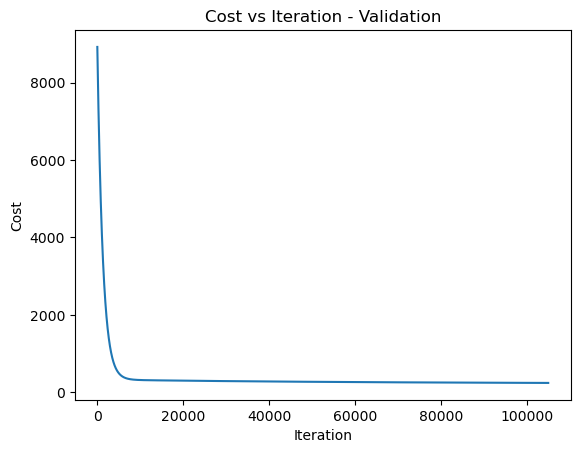

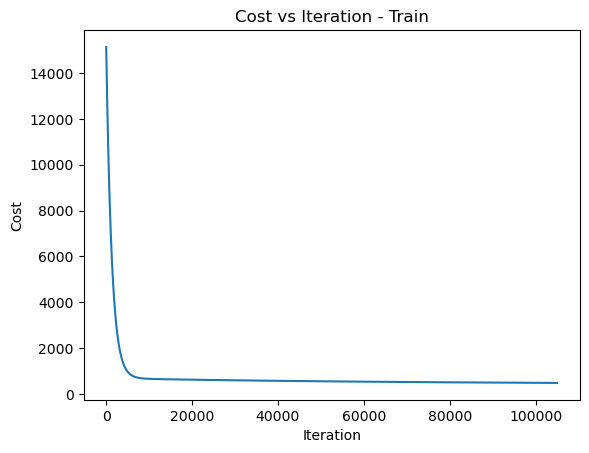

In [184]:
import matplotlib.pyplot as plt

# assuming change is a numpy array
iteration = np.arange(len(error_val)) # create an array of iteration numbers
plt.plot(iteration, error_val) # plot the change vs iteration
plt.xlabel("Iteration") # label the x-axis
plt.ylabel("Cost") # label the y-axis
plt.title("Cost vs Iteration - Validation") # give a title to the graph
plt.show() # show the graph


import matplotlib.pyplot as plt

# assuming change is a numpy array
iteration = np.arange(len(error_train)) # create an array of iteration numbers
plt.plot(iteration, error_train) # plot the change vs iteration
plt.xlabel("Iteration") # label the x-axis
plt.ylabel("Cost") # label the y-axis
plt.title("Cost vs Iteration - Train") # give a title to the graph
plt.show() # show the graph

# CONCLUSION : 

As we decrease the learning rate, the Minima is achieved Slow .
One the Cost reaches or tends to reach its minima, the rate of change is very slow and not much change is observed over time.
In the three plots above for different learning rates, it can be observed that, the instant at which cost reaches close to minima vary with the learning rates.It is very fast in earlier cases (More Learning Rate) than in the later ones(Less Learning Rates).